<h1><center><b> Swire Coca-Cola Capstone Modeling  </b></center></h1>

 <center><b><h2> Author : Adarsh Fnu </h2></b></center>

## Table of contents:

1. <a href="#1">Introduction</a><br>
2. <a href="#2">Load libraries and packages</a><br>    
3. <a href="#3"> Import dataset and inspect</a><br>
4. <a href="#4"> Missing Value Analysis</a><br>
   4.1 <a href="#4.1"> Imputation of Missing Value's</a><br>
5. <a href="#5"> Univariate Analysis</a><br>
   5.1 <a href="#5.1"> Distribution of actual work in minutes</a><br>
   5.2 <a href="#5.2"> Breakdown counts by production location</a><br>
   5.3 <a href="#5.3"> Breakdown trends over years</a><br>
   5.4 <a href="#5.4"> Number of maintenance activities per month in 2023</a><br>
   5.5 <a href="#5.5"> Frequency of maintenance activity type</a><br>   
6. <a href="#6"> Bivariate Analysis</a><br>
   6.1 <a href="#6.1"> Average downtime by maintenance activity type</a><br>
   6.2 <a href="#6.2"> Average downtime by plant</a><br>
   6.3 <a href="#6.3"> Count of Maintenance type by Maintenance activity type</a><br>
   6.4 <a href="#6.4"> Production line Analysis using Functional Area </a><br>
    <div style="margin-left: 20px;">
    6.4.1 <a href="#6.4.1"> Average downtime by Functional Area node 4</a><br>
    6.4.2 <a href="#6.4.2"> Average downtime by Functional Area node 5</a><br>
  </div>
   6.5 <a href="#6.5"> Frequency of maintenance type across equipment categories </a><br>
   6.6 <a href="#6.6"> Equipment Age vs Actual work in minutes  </a><br>
7. <a href="#7"> Multivariate Analysis</a><br>
   7.1 <a href="#7.1"> Average downtime by maintenance activity type for different plants</a><br>
   7.2 <a href="#7.2"> Maintenance type by equipment age and downtime</a><br>   
8. <a href="#8"> Outlier Analysis</a><br>
9. <a href="#9"> Feature Engineering</a><br>
   9.1 <a href="#9.1"> Breakdown analysis by Equipment Type</a><br>
   9.2 <a href="#9.2"> Breakdown Timeline Analysis</a><br>
   9.3 <a href="#9.3"> Machine Location and Granular Analysis</a><br>
   9.4 <a href="#9.4"> Nature of Repairs and Correction Methods</a><br>
   9.5 <a href="#9.5"> Equipment-Specific Time Between Failures</a><br>
   9.6 <a href="#9.6"> Maintenance Frequency and Downtime</a><br>
   9.7 <a href="#9.7"> Time Until Next Downtime Post-Maintenance</a><br>
   9.8 <a href="#9.8"> Seasonal Impact and Cost Analysis</a><br>
   9.9 <a href="#9.9"> Key Features of Modeling</a><br>
10. <a href="#10"> Model Selection</a><br>
     10.1 <a href="10.1">Linear Regression Model</a><br>
     10.2 <a href="10.2">Random Forest Model</a><br>
     10.3 <a href="10.3">XGBoost Model</a><br>
     10.4 <a href="10.4">Lightgbm Model</a><br>
11. <a href="#11"> Modeling</a><br>
     11.1 <a href="#11.2"> Functional Location Segmentation for Process Analysis</a><br>
     11.2 <a href="#11.3"> Kaplan-Meier Model</a><br>
     11.3 <a href="#11.5"> Leveraging Kaplan-Meier Model for Enhanced Insights</a><br>
12. <a href="#14"> Individual Contributions</a><br>

## 1. Introduction <a name='1'></a>

Swire Coca-Cola is one of the five largest Coca-Cola bottlers in the US. Every year, they produce
close to 192 million cases of beverages to sell in its markets in 13 states. Recently, Swire CocaCola is experiencing significant losses due to frequent and unplanned machine downtimes in its 6
production plants. These machine downtimes are costing the company greatly as only about 94.4%
of ordered cases get produced while the rest are lost in unexpected mechanical failures. When
these mechanical failures occur unexpectedly, there are unplanned downtimes that reduce
efficiency and productivity at the plants. Due to these unplanned breakdowns, it costs the business
an estimated $60 million annually, bringing business to a grinding halt and delaying the time for
delivery. The current maintenance strategy is inefficient, as machines are repaired only after
breakdown occur, resulting in prolonged periods of inactivity. Swire Coca-Cola wants to further
improve the accuracy of these downtime predictions in order to avoid disruptions, decrease the
cost of unplanned maintenance, and optimize full production capacity.

In alignment with the CRISP-DM framework, our initial focus will be on data understanding to gain insights into patterns and features critical to machine breakdowns. This includes tasks such as data import and inspection, missing values analysis, exploratory visualizations, and various analyses (univariate, bivariate, multivariate) to understand relationships between factors. Outlier analysis will also be conducted to identify anomalies that might be influencing downtime.

Feature importance will play a crucial role in understanding the factors contributing to these breakdowns. Key features include:

* What: Understanding what component broke down, with descriptions providing essential context.
* When: Timestamps of breakdown events help establish time-based patterns and trends.
* Why: Conditions and descriptions in breakdown cases may offer clues to the underlying causes of failures.
* Where: Machine location data, available at varying granularities, enables breakdown analysis by machine type or specific components within machines.
* How: Information about the type of fix used (from the IWC dataset) helps infer the method of correction.
  
In the modeling phase, we will explore survival analysis techniques like the Kaplan-Meier and Cox proportional hazards model to analyze time-to-failure data and identify factors associated with breakdown risks. Additionally, ARIMA modeling will be applied to time series data to forecast potential failure events. These models will help predict machine downtimes, allowing proactive maintenance scheduling to prevent costly breakdowns.

Ultimately, this predictive maintenance project will provide Swire Coca-Cola with the insights needed to transition from reactive to proactive maintenance, improving uptime, optimizing production, and ensuring a steady flow of products to market. This shift will support Swire Coca-Cola’s goals of operational excellence and customer satisfaction while reducing downtime-related costs.






## 2. Load Libraries and packages <a name='2'></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import wordcloud
from wordcloud import WordCloud
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima
from datetime import datetime
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter

warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'wordcloud'

## 3. Import dataset and inspect <a name='3'></a>

In [ ]:
data_swire = pd.read_csv('IWC_Work_Orders_Extract.csv', low_memory=False)

data_swire_copy = data_swire.copy()

data_swire_copy.head(n=10)

ORDER_ID PLANT_ID PRODUCTION_LOCATION EXECUTION_START_DATE  \
0  705642457.0     G812                ROMA             5/4/2024   
1  704191697.0     G812                ROMA            9/13/2022   
2  704466547.0     G812                ROMA           12/21/2022   
3  703834477.0     G812                ROMA             7/4/2022   
4  704661125.0     G291               MONZA            3/15/2023   
5  704948720.0     G291               MONZA             9/8/2023   
6  701673970.0     G291               MONZA             9/6/2019   
7  705148892.0     G291               MONZA            10/9/2023   
8  704769592.0     G291               MONZA             5/1/2023   
9  704448350.0     G291               MONZA           12/13/2022   

  EXECUTION_FINISH_DATE ACTUAL_START_TIME ACTUAL_FINISH_TIME  \
0             5/12/2024           00:00.0            04:08.0   
1             9/13/2022           00:00.0            17:24.0   
2            12/21/2022           00:00.0            00:00.0   
3              7/4/2022           00:00.0            00:00.0   
4             3/15/2023           00:00.0            00:00.0   
5              9/8/2023           00:00.0            00:00.0   
6              9/6/2019           00:00.0            00:00.0   
7             10/9/2023           00:00.0            00:00.0   
8              5/1/2023           00:00.0            00:00.0   
9            12/13/2022           00:00.0            00:00.0   

   ACTUAL_WORK_IN_MINUTES MAINTENANCE_PLAN  MAINTENANCE_ITEM  ...  \
0                   390.0              NaN               NaN  ...   
1                   420.0              NaN               NaN  ...   
2                    30.0              NaN               NaN  ...   
3                    60.0              NaN               NaN  ...   
4                   120.0              NaN               NaN  ...   
5                    18.0       G291VM1437           40534.0  ...   
6                   480.0              NaN               NaN  ...   
7                    30.0              NaN               NaN  ...   
8                    30.0              NaN               NaN  ...   
9                    30.0              NaN               NaN  ...   

   FUNCTIONAL_AREA_NODE_2_MODIFIED    FUNCTIONAL_AREA_NODE_3_MODIFIED  \
0       G812 PRD FILLER_ROTARY_CAN  G812 PRD FILLER_ROTARY_CAN LINE 3   
1       G812 PRD FILLER_ROTARY_CAN  G812 PRD FILLER_ROTARY_CAN LINE 3   
2       G812 PRD FILLER_ROTARY_CAN  G812 PRD FILLER_ROTARY_CAN LINE 3   
3       G812 PRD FILLER_ROTARY_CAN  G812 PRD FILLER_ROTARY_CAN LINE 3   
4                      AIR SYSTEMS                                NaN   
5                      AIR SYSTEMS                                NaN   
6                      AIR SYSTEMS                                NaN   
7  AMMONIA & REFRIGERATION SYSTEMS                                NaN   
8  AMMONIA & REFRIGERATION SYSTEMS                                NaN   
9  AMMONIA & REFRIGERATION SYSTEMS                                NaN   

  FUNCTIONAL_AREA_NODE_4_MODIFIED FUNCTIONAL_AREA_NODE_5_MODIFIED  \
0                        CONVEYOR               FULL CAN CONVEYOR   
1                        CONVEYOR               FULL CAN CONVEYOR   
2                        CONVEYOR               FULL CAN CONVEYOR   
3                        CONVEYOR               FULL CAN CONVEYOR   
4                             NaN                             NaN   
5                             NaN                             NaN   
6                             NaN                             NaN   
7                             NaN                             NaN   
8                             NaN                             NaN   
9                             NaN                             NaN   

  EQUIPMENT_ID               EQUIPMENT_DESC EQUIP_CAT_DESC  \
0  300126812.0    FULL CAN CONVEYOR (FC41B)       Machines   
1  300126812.0    FULL CAN CONVEYOR (FC41B)       Machines   
2  300126812.0    FULL CAN CONVEYOR (FC41B

In [ ]:
# Check column names and data types
data_swire_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427264 entries, 0 to 1427263
Data columns (total 25 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   ORDER_ID                         1427264 non-null  int64  
 1   PLANT_ID                         1427264 non-null  object 
 2   PRODUCTION_LOCATION              1427264 non-null  object 
 3   EXECUTION_START_DATE             1427264 non-null  object 
 4   EXECUTION_FINISH_DATE            1427264 non-null  object 
 5   ACTUAL_START_TIME                1427264 non-null  object 
 6   ACTUAL_FINISH_TIME               1427264 non-null  object 
 7   ACTUAL_WORK_IN_MINUTES           1427264 non-null  float64
 8   MAINTENANCE_PLAN                 152594 non-null   object 
 9   MAINTENANCE_ITEM                 152594 non-null   float64
 10  MAINTENANCE_ACTIVITY_TYPE        1427264 non-null  object 
 11  ORDER_DESCRIPTION                291767 non-null  

The dataset comprises 1,427,264 entries across 25 columns, containing a mix of integer, float, and object data types. The integer (ORDER_ID) and float (ACTUAL_WORK_IN_MINUTES, MAINTENANCE_ITEM, and EQUIPMENT_ID) columns represent identifiers and numerical values, while the majority of columns (21) are of type object, which likely includes categorical or date-related information. Several columns related to dates, such as EXECUTION_START_DATE, EXECUTION_FINISH_DATE, and EQUIP_START_UP_DATE, are in object format and should be converted to datetime for accurate temporal analysis. Notably, some columns, such as MAINTENANCE_PLAN, MAINTENANCE_ITEM, and EQUIP_VALID_FROM, exhibit a significant number of missing values, indicating incomplete records that require appropriate handling. Effective imputation strategies for missing values, categorical encoding, and outlier analysis are recommended to ensure data quality and support predictive modeling.

In [ ]:
data_swire_copy.shape

(1427264, 25)

The dataset has a shape of (1,427,264, 25), indicating that it comprises 1,427,264 rows and 25 columns. The large number of rows suggests the data was collected over a considerable period or from multiple sources, which provides a rich dataset for analysis. The 25 columns represent various attributes related to equipment, maintenance activities, and operational details, offering a broad set of features that could be valuable for predictive maintenance analysis.



In [ ]:
median_survival_times_dict = {}
for equipment_type in equipment_types:
    type_data = data_swire_copy[data_swire_copy['Equipment_Type'] == equipment_type.capitalize()]
    if not type_data.empty:
        kmf.fit(type_data['machine_age'], event_observed=type_data['failure_event'])
        median_survival = median_survival_times(kmf.survival_function_)
        median_survival_times_dict[equipment_type] = median_survival.values[0][0]

# Simulate the impact of planned maintenance
data_swire_copy['preventive_maintenance'] = data_swire_copy['machine_age'].apply(
    lambda x: 1 if any(x < median_survival_times_dict[etype] for etype in equipment_types if etype in str(data_swire_copy['EQUIPMENT_DESC'].iloc[0]).lower()) else 0
)

# Compare unplanned maintenance with and without the intervention
before_intervention = data_swire_copy['failure_event'].sum()
after_intervention = data_swire_copy.loc[data_swire_copy['preventive_maintenance'] == 0, 'failure_event'].sum()

print(f"Unplanned maintenance events before intervention: {before_intervention}")
print(f"Unplanned maintenance events after intervention: {after_intervention}")

# Calculate downtime reduction
downtime_reduction = (before_intervention - after_intervention) / before_intervention * 100
print(f"Estimated reduction in unplanned maintenance events: {downtime_reduction:.2f}%")

Unplanned maintenance events before intervention: 79447
Unplanned maintenance events after intervention: 79447
Estimated reduction in unplanned maintenance events: 0.00%


In [ ]:
data_swire_copy.dtypes

ORDER_ID                             int64
PLANT_ID                            object
PRODUCTION_LOCATION                 object
EXECUTION_START_DATE                object
EXECUTION_FINISH_DATE               object
ACTUAL_START_TIME                   object
ACTUAL_FINISH_TIME                  object
ACTUAL_WORK_IN_MINUTES             float64
MAINTENANCE_PLAN                    object
MAINTENANCE_ITEM                   float64
MAINTENANCE_ACTIVITY_TYPE           object
ORDER_DESCRIPTION                   object
MAINTENANCE_TYPE_DESCRIPTION        object
FUNCTIONAL_LOC                      object
FUNCTIONAL_AREA_NODE_1_MODIFIED     object
FUNCTIONAL_AREA_NODE_2_MODIFIED     object
FUNCTIONAL_AREA_NODE_3_MODIFIED     object
FUNCTIONAL_AREA_NODE_4_MODIFIED     object
FUNCTIONAL_AREA_NODE_5_MODIFIED     object
EQUIPMENT_ID                       float64
EQUIPMENT_DESC                      object
EQUIP_CAT_DESC                      object
EQUIP_START_UP_DATE                 object
EQUIP_VALID_FROM                    object
EQUIP_VALID_TO                      object
dtype: object

In [ ]:
data_swire_copy.columns

Index(['ORDER_ID', 'PLANT_ID', 'PRODUCTION_LOCATION', 'EXECUTION_START_DATE',
       'EXECUTION_FINISH_DATE', 'ACTUAL_START_TIME', 'ACTUAL_FINISH_TIME',
       'ACTUAL_WORK_IN_MINUTES', 'MAINTENANCE_PLAN', 'MAINTENANCE_ITEM',
       'MAINTENANCE_ACTIVITY_TYPE', 'ORDER_DESCRIPTION',
       'MAINTENANCE_TYPE_DESCRIPTION', 'FUNCTIONAL_LOC',
       'FUNCTIONAL_AREA_NODE_1_MODIFIED', 'FUNCTIONAL_AREA_NODE_2_MODIFIED',
       'FUNCTIONAL_AREA_NODE_3_MODIFIED', 'FUNCTIONAL_AREA_NODE_4_MODIFIED',
       'FUNCTIONAL_AREA_NODE_5_MODIFIED', 'EQUIPMENT_ID', 'EQUIPMENT_DESC',
       'EQUIP_CAT_DESC', 'EQUIP_START_UP_DATE', 'EQUIP_VALID_FROM',
       'EQUIP_VALID_TO'],
      dtype='object')

In [ ]:
data_swire_copy.isnull().sum()

ORDER_ID                                 0
PLANT_ID                                 0
PRODUCTION_LOCATION                      0
EXECUTION_START_DATE                     0
EXECUTION_FINISH_DATE                    0
ACTUAL_START_TIME                        0
ACTUAL_FINISH_TIME                       0
ACTUAL_WORK_IN_MINUTES                   0
MAINTENANCE_PLAN                   1274670
MAINTENANCE_ITEM                   1274670
MAINTENANCE_ACTIVITY_TYPE                0
ORDER_DESCRIPTION                  1135497
MAINTENANCE_TYPE_DESCRIPTION       1135469
FUNCTIONAL_LOC                     1135482
FUNCTIONAL_AREA_NODE_1_MODIFIED    1137147
FUNCTIONAL_AREA_NODE_2_MODIFIED    1144857
FUNCTIONAL_AREA_NODE_3_MODIFIED    1168573
FUNCTIONAL_AREA_NODE_4_MODIFIED    1189691
FUNCTIONAL_AREA_NODE_5_MODIFIED    1425084
EQUIPMENT_ID                       1135469
EQUIPMENT_DESC                     1347817
EQUIP_CAT_DESC                     1347817
EQUIP_START_UP_DATE                1347817
EQUIP_VALID_FROM                   1347817
EQUIP_VALID_TO                     1347817
dtype: int64

## 4. Missing Value analysis <a name='4'></a>

In [ ]:
# Calculate the percentage of missing values for each column
missing_values_percentage = data_swire_copy.isnull().mean() * 100

# Filter out columns that have no missing values
missing_values_percentage = missing_values_percentage[missing_values_percentage > 0]

print(missing_values_percentage)

MAINTENANCE_PLAN                   89.308635
MAINTENANCE_ITEM                   89.308635
ORDER_DESCRIPTION                  79.557601
MAINTENANCE_TYPE_DESCRIPTION       79.555639
FUNCTIONAL_LOC                     79.556550
FUNCTIONAL_AREA_NODE_1_MODIFIED    79.673207
FUNCTIONAL_AREA_NODE_2_MODIFIED    80.213401
FUNCTIONAL_AREA_NODE_3_MODIFIED    81.875042
FUNCTIONAL_AREA_NODE_4_MODIFIED    83.354656
FUNCTIONAL_AREA_NODE_5_MODIFIED    99.847260
EQUIPMENT_ID                       79.555639
EQUIPMENT_DESC                     94.433616
EQUIP_CAT_DESC                     94.433616
EQUIP_START_UP_DATE                94.433616
EQUIP_VALID_FROM                   94.433616
EQUIP_VALID_TO                     94.433616
dtype: float64


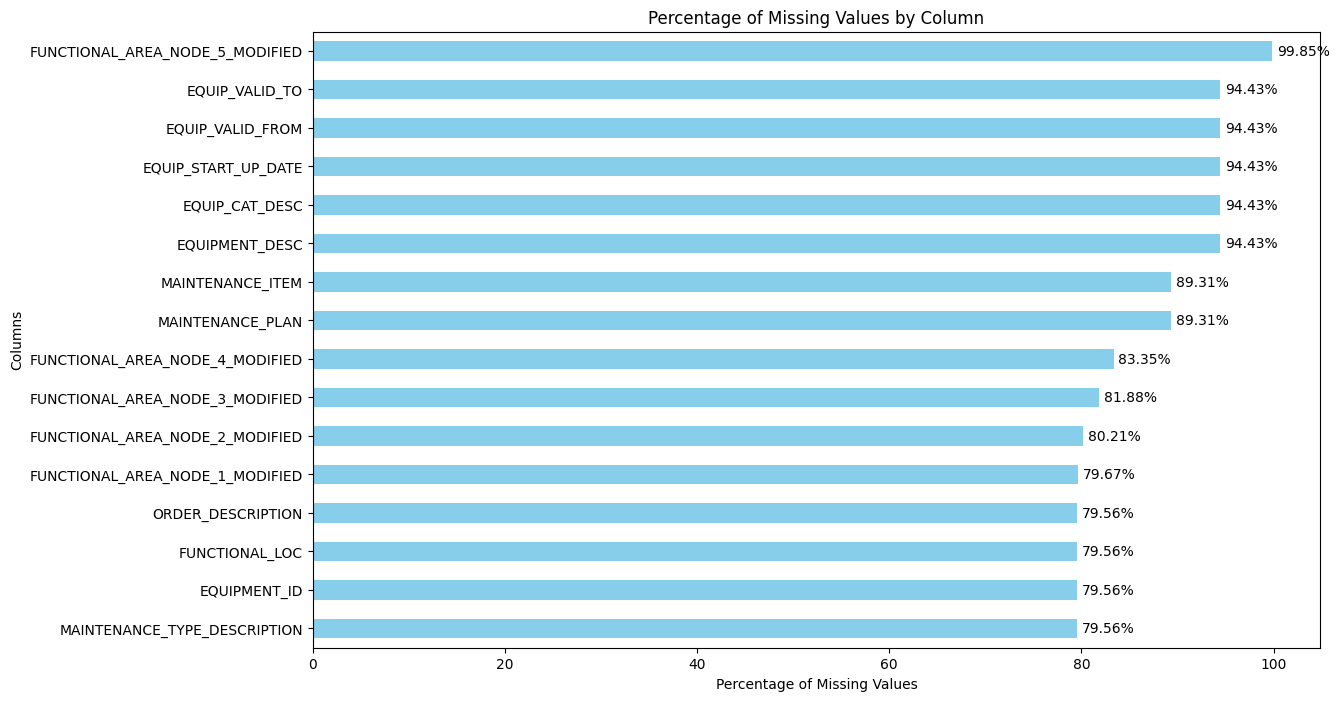

In [ ]:
# Plotting the bar plot
plt.figure(figsize=(13, 8))
missing_values_percentage.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.title('Percentage of Missing Values by Column')

# Add numerical values on the bars
for index, value in enumerate(missing_values_percentage.sort_values()):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center')

plt.show()

The missing value analysis reveals that several columns in the dataset have a significant proportion of missing data, ranging from approximately 79.5% to 99.8%. Notably, columns like MAINTENANCE_PLAN and MAINTENANCE_ITEM have around 89.3% missing values, indicating potential data quality issues or inconsistent record-keeping in maintenance documentation. Furthermore, the EQUIP_START_UP_DATE, EQUIP_VALID_FROM, and EQUIP_VALID_TO columns each have 94.4% missing values, which highlights considerable gaps in equipment lifecycle data. The FUNCTIONAL_AREA_NODE_5_MODIFIED column is missing values for almost 99.8% of the records, suggesting that information at this level of detail might not have been recorded consistently or may only apply to specific equipment types. Addressing these missing values will be crucial for ensuring robust data quality and reliability in subsequent analyses and predictive modeling efforts.

### 4.1 Imputation of Missing Value's <a name = "4.1"></a>

In [ ]:
categorical_columns = ['MAINTENANCE_PLAN', 'MAINTENANCE_ITEM', 'ORDER_DESCRIPTION', 'MAINTENANCE_TYPE_DESCRIPTION',
                       'FUNCTIONAL_LOC', 'FUNCTIONAL_AREA_NODE_1_MODIFIED', 'FUNCTIONAL_AREA_NODE_2_MODIFIED',
                       'FUNCTIONAL_AREA_NODE_3_MODIFIED', 'FUNCTIONAL_AREA_NODE_4_MODIFIED', 'FUNCTIONAL_AREA_NODE_5_MODIFIED',
                       'EQUIPMENT_ID', 'EQUIPMENT_DESC', 'EQUIP_CAT_DESC']

for col in categorical_columns:
    data_swire_copy[col] = data_swire_copy[col].fillna('Unknown')

data_swire_copy['EQUIP_START_UP_DATE'] = pd.to_datetime(data_swire_copy['EQUIP_START_UP_DATE'], errors='coerce')
data_swire_copy['EQUIP_START_UP_DATE'] = data_swire_copy['EQUIP_START_UP_DATE'].fillna(pd.to_datetime('1960-01-01'))

data_swire_copy['EQUIP_VALID_FROM'] = np.where(
    data_swire_copy['EQUIP_VALID_FROM'].isna(),
    data_swire_copy['EQUIP_START_UP_DATE'] + pd.Timedelta(days=0),
    data_swire_copy['EQUIP_VALID_FROM']
)

data_swire_copy.fillna({'EQUIP_VALID_TO': pd.to_datetime('2200-01-01')}, inplace=True)


data_swire_copy['EQUIPMENT_DESC'] = data_swire_copy['EQUIPMENT_DESC'].fillna(data_swire_copy['EQUIPMENT_DESC'].mode()[0])
data_swire_copy['EQUIP_CAT_DESC'] = data_swire_copy['EQUIP_CAT_DESC'].fillna(data_swire_copy['EQUIP_CAT_DESC'].mode()[0])

For categorical columns, such as MAINTENANCE_PLAN, ORDER_DESCRIPTION, and several FUNCTIONAL_AREA_NODE columns, missing values are replaced with 'Unknown' to ensure data completeness without introducing bias. Date columns like EQUIP_START_UP_DATE, EQUIP_VALID_FROM, and EQUIP_VALID_TO are converted to datetime format and missing entries are filled with placeholder dates (e.g., 1900-01-01 for startup dates and 2200-01-01 for end-of-use dates), enabling meaningful time-based analysis while avoiding data loss. For all rows where EQUIP_VALID_FROM is missing, we are imputing the equipment's start-up date (EQUIP_START_UP_DATE) as the valid-from date, meaning the equipment is considered valid from the date it was initially acquired. This ensures there are no gaps in the EQUIP_VALID_FROM column. Additionally, the most common value (mode) is used to fill missing values in EQUIPMENT_DESC and EQUIP_CAT_DESC to retain categorical consistency. These imputation techniques ensure that the dataset remains comprehensive and ready for further exploration and modeling, without dropping any rows or losing essential information.


In [ ]:
data_swire_copy.isnull().sum()

ORDER_ID                                 0
PLANT_ID                                 0
PRODUCTION_LOCATION                      0
EXECUTION_START_DATE                     0
EXECUTION_FINISH_DATE                    0
ACTUAL_START_TIME                        0
ACTUAL_FINISH_TIME                       0
ACTUAL_WORK_IN_MINUTES                   0
MAINTENANCE_PLAN                   1274670
MAINTENANCE_ITEM                   1274670
MAINTENANCE_ACTIVITY_TYPE                0
ORDER_DESCRIPTION                  1135497
MAINTENANCE_TYPE_DESCRIPTION       1135469
FUNCTIONAL_LOC                     1135482
FUNCTIONAL_AREA_NODE_1_MODIFIED    1137147
FUNCTIONAL_AREA_NODE_2_MODIFIED    1144857
FUNCTIONAL_AREA_NODE_3_MODIFIED    1168573
FUNCTIONAL_AREA_NODE_4_MODIFIED    1189691
FUNCTIONAL_AREA_NODE_5_MODIFIED    1425084
EQUIPMENT_ID                       1135469
EQUIPMENT_DESC                     1347817
EQUIP_CAT_DESC                     1347817
EQUIP_START_UP_DATE                1347817
EQUIP_VALID_FROM                   1347817
EQUIP_VALID_TO                     1347817
dtype: int64

In [ ]:
data_swire_copy.head(n=10)

ORDER_ID PLANT_ID PRODUCTION_LOCATION EXECUTION_START_DATE  \
0  705642457     G812                ROMA           2024-05-04   
1  704191697     G812                ROMA           2022-09-13   
2  704466547     G812                ROMA           2022-12-21   
3  703834477     G812                ROMA           2022-07-04   
4  704661125     G291               MONZA           2023-03-15   
5  704948720     G291               MONZA           2023-09-08   
6  701673970     G291               MONZA           2019-09-06   
7  705148892     G291               MONZA           2023-10-09   
8  704769592     G291               MONZA           2023-05-01   
9  704448350     G291               MONZA           2022-12-13   

  EXECUTION_FINISH_DATE ACTUAL_START_TIME ACTUAL_FINISH_TIME  \
0            2024-05-12      06:00:00.000       23:04:08.000   
1            2022-09-13      06:00:00.000       17:17:24.000   
2            2022-12-21      07:00:00.000       07:00:00.000   
3            2022-07-04      06:00:00.000       06:00:00.000   
4            2023-03-15      07:00:00.000       07:00:00.000   
5            2023-09-08      07:00:00.000       07:00:00.000   
6            2019-09-06      07:00:00.000       07:00:00.000   
7            2023-10-09      07:00:00.000       07:00:00.000   
8            2023-05-01      07:00:00.000       07:00:00.000   
9            2022-12-13      08:00:00.000       08:00:00.000   

   ACTUAL_WORK_IN_MINUTES MAINTENANCE_PLAN  MAINTENANCE_ITEM  ...  \
0                   390.0              NaN               NaN  ...   
1                   420.0              NaN               NaN  ...   
2                    30.0              NaN               NaN  ...   
3                    60.0              NaN               NaN  ...   
4                   120.0              NaN               NaN  ...   
5                    18.0       G291VM1437           40534.0  ...   
6                   480.0              NaN               NaN  ...   
7                    30.0              NaN               NaN  ...   
8                    30.0              NaN               NaN  ...   
9                    30.0              NaN               NaN  ...   

   FUNCTIONAL_AREA_NODE_2_MODIFIED    FUNCTIONAL_AREA_NODE_3_MODIFIED  \
0       G812 PRD FILLER_ROTARY_CAN  G812 PRD FILLER_ROTARY_CAN LINE 3   
1       G812 PRD FILLER_ROTARY_CAN  G812 PRD FILLER_ROTARY_CAN LINE 3   
2       G812 PRD FILLER_ROTARY_CAN  G812 PRD FILLER_ROTARY_CAN LINE 3   
3       G812 PRD FILLER_ROTARY_CAN  G812 PRD FILLER_ROTARY_CAN LINE 3   
4                      AIR SYSTEMS                                NaN   
5                      AIR SYSTEMS                                NaN   
6                      AIR SYSTEMS                                NaN   
7  AMMONIA & REFRIGERATION SYSTEMS                                NaN   
8  AMMONIA & REFRIGERATION SYSTEMS                                NaN   
9  AMMONIA & REFRIGERATION SYSTEMS                                NaN   

  FUNCTIONAL_AREA_NODE_4_MODIFIED FUNCTIONAL_AREA_NODE_5_MODIFIED  \
0                        CONVEYOR               FULL CAN CONVEYOR   
1                        CONVEYOR               FULL CAN CONVEYOR   
2                        CONVEYOR               FULL CAN CONVEYOR   
3                        CONVEYOR               FULL CAN CONVEYOR   
4                             NaN                             NaN   
5                             NaN                             NaN   
6                             NaN                             NaN   
7                             NaN                             NaN   
8                             NaN                             NaN   
9                             NaN                             NaN   

  EQUIPMENT_ID               EQUIPMENT_DESC EQUIP_CAT_DESC  \
0  300126812.0    FULL CAN CONVEYOR (FC41B)       Machines   
1  300126812.0    FULL CAN CONVEYOR (FC41B)       Machines   
2  300126812.0    FULL CAN CONVEYOR (FC41B)       Machines   


## 5.Univariate analysis <a name = "5"></a>

In the context of predictive maintenance for Swire Coca-Cola, univariate analysis is essential to understand the distribution of each feature, such as maintenance duration (ACTUAL_WORK_IN_MINUTES) or maintenance types. By analyzing each variable independently, we can identify key characteristics, such as the frequency of unplanned vs. planned maintenance or the age distribution of the equipment.

In [ ]:
data_swire_copy['ACTUAL_WORK_IN_MINUTES'].describe().round(2)

count    1427264.00
mean          88.63
std          803.79
min            0.00
25%           12.00
50%           48.00
75%           90.00
max       330184.80
Name: ACTUAL_WORK_IN_MINUTES, dtype: float64

The summary statistics for ACTUAL_WORK_IN_MINUTES show that the dataset contains 142,264 records for the duration of work performed on maintenance tasks, with a mean of 88.63 minutes. The standard deviation is 803.79 minutes, indicating a high variability in the time taken for maintenance activities. The minimum recorded value is 0 minutes, suggesting instances where no significant work was logged, which may represent very minor fixes or erroneous data. The median (50th percentile) value is 48 minutes, while the 25th and 75th percentiles are 12 minutes and 90 minutes, respectively, showing that most maintenance tasks are relatively short. However, the maximum value of 330,184.80 minutes highlights some extreme outliers, possibly due to extended downtimes or misrecorded data, which may require further investigation and handling during analysis. Overall, these statistics suggest a skewed distribution, with most maintenance activities being short in duration, while a few instances are significantly longer.








### 5.1. Distribution of actual work in minutes <a name = "5.1"></a>

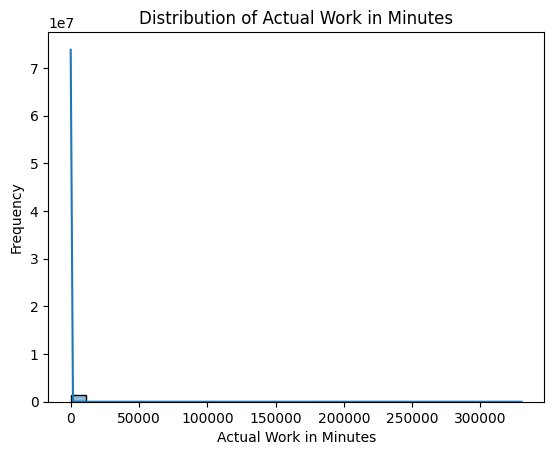

In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning, module="pandas")

sns.histplot(data_swire_copy['ACTUAL_WORK_IN_MINUTES'], bins=30, kde=True)
plt.title('Distribution of Actual Work in Minutes')
plt.xlabel('Actual Work in Minutes')
plt.ylabel('Frequency')
plt.show()


From the above graph, which is between actual work in minutes and frequency, we can see that there is a massive spike at zero, which means that most of the downtimes which occur are small fixes or minor issues that require significantly less time to resolve the problem which doesn't affect the production. However, the outliers which exceed more than 1000 minutes are likely to be unplanned maintenance, where the repairs are difficult and take a considerable amount of time to do so, which affects the production and the cost in the millions, even if these repairs are rare but predicting them in advance can reduce the impact they cause.

### 5.2. Breakdown counts by production location <a name = "5.2"></a>

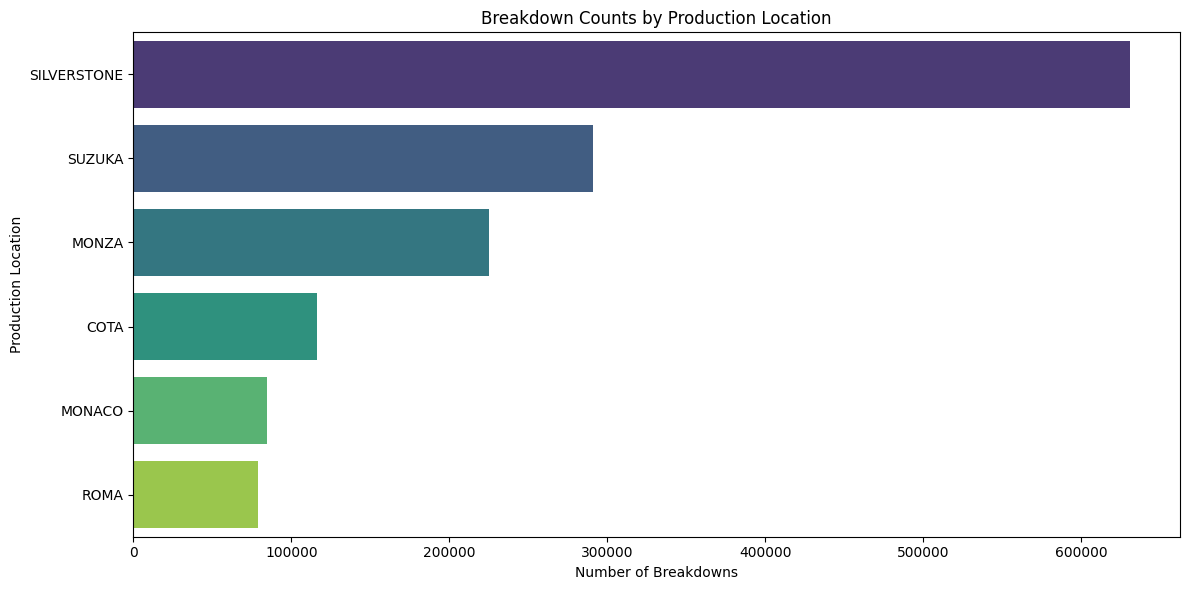

In [ ]:
plt.figure(figsize=(12, 6))
location_counts = data_swire_copy['PRODUCTION_LOCATION'].value_counts()
sns.barplot(x=location_counts.values, y=location_counts.index, palette='viridis')
plt.title('Breakdown Counts by Production Location')
plt.xlabel('Number of Breakdowns')
plt.ylabel('Production Location')
plt.tight_layout()
plt.show()


The bar chart shows the breakdown counts by production location, with "Silverstone" having the highest number of breakdowns, significantly surpassing other locations. "Suzuka" follows as the second highest, and "Monza" ranks third. The other locations—"COTA," "Monaco," and "Roma"—have relatively lower breakdown counts compared to the top three. This visualization highlights that Silverstone is experiencing the most operational issues, indicating the need for focused maintenance strategies to address the frequent breakdowns and improve efficiency in this location.









### 5.3. Breakdown trends over years <a name = "5.3"></a>

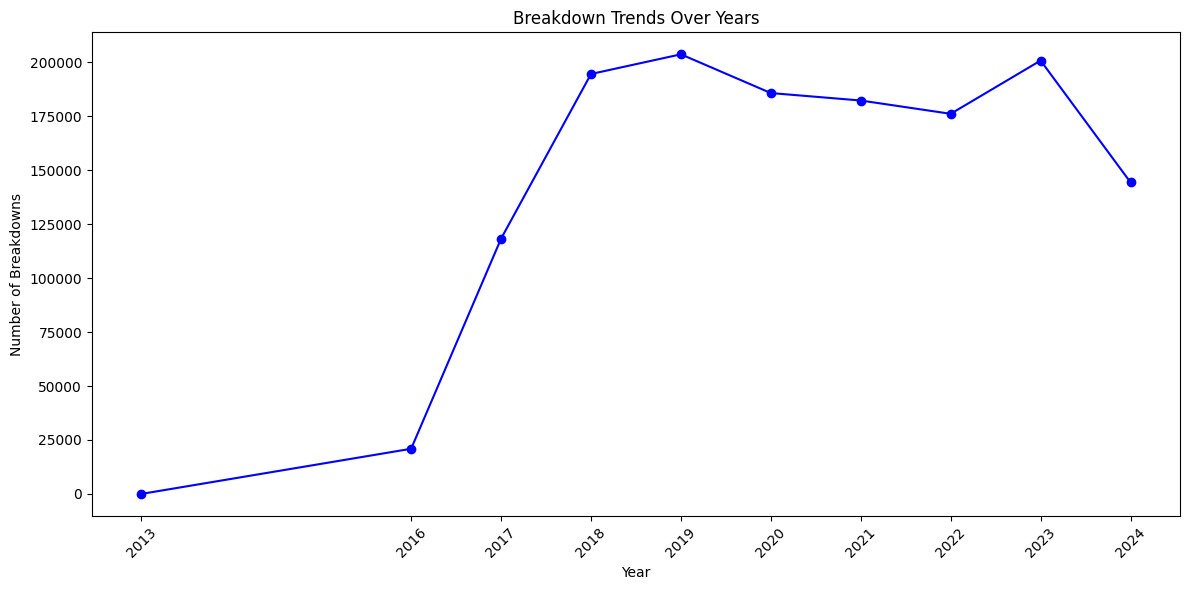

In [ ]:
# Convert 'EXECUTION_START_DATE' to datetime format
data_swire_copy['EXECUTION_START_DATE'] = pd.to_datetime(data_swire_copy['EXECUTION_START_DATE'], errors='coerce')

# Grouping breakdowns by year
breakdown_trends_yearly = data_swire_copy['EXECUTION_START_DATE'].groupby(data_swire_copy['EXECUTION_START_DATE'].dt.year).count()

# Plotting breakdown trends over time by year
plt.figure(figsize=(12, 6))
breakdown_trends_yearly.plot(kind='line', marker='o', color='b')
plt.title('Breakdown Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Breakdowns')
plt.xticks(breakdown_trends_yearly.index, rotation=45)

plt.tight_layout()
plt.show()

The line graph depicts the breakdown trends over the years, showing a notable increase in the number of breakdowns from 2015 to 2018, reaching its peak around 2019. This indicates a period of operational challenges and frequent machine failures. Post-2019, there seems to be a stabilization in the number of breakdowns, although still relatively high, with slight fluctuations between 2020 and 2023. In 2024, a significant decrease in breakdowns is observed, suggesting possible improvements in maintenance practices or a decline in production activities that could have reduced the number of incidents. This trend emphasizes the need for further analysis of factors contributing to the fluctuations in breakdown occurrences, especially during peak periods.

### 5.4. Number of maintenance activites per month in 2023 <a name = "5.4"></a>

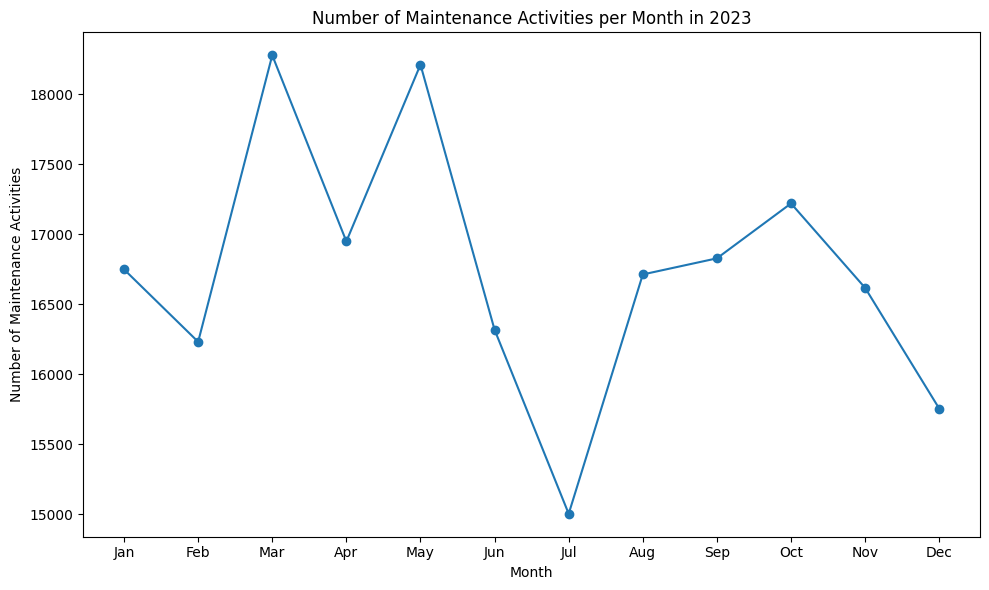

In [ ]:
# Assuming 'EXECUTION_START_DATE' is already converted to datetime
data_swire_copy['EXECUTION_START_DATE'] = pd.to_datetime(data_swire_copy['EXECUTION_START_DATE'])

# Filter data for a specific year
specific_year = 2023
data_specific_year = data_swire_copy[data_swire_copy['EXECUTION_START_DATE'].dt.year == specific_year]

# Grouping by month within the specific year
monthly_counts = data_specific_year['EXECUTION_START_DATE'].groupby(data_specific_year['EXECUTION_START_DATE'].dt.month).count()

# Plotting the number of maintenance activities per month in the specific year
monthly_counts.plot(kind='line', marker='o', figsize=(10, 6))
plt.title(f'Number of Maintenance Activities per Month in {specific_year}')
plt.xlabel('Month')
plt.ylabel('Number of Maintenance Activities')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()


The line graph depicts the number of maintenance activities per month for the year 2023. Notably, there are fluctuations throughout the year, with peaks in March and August, and a significant drop in maintenance activities in July. This trend may suggest that preventive maintenance or machine installations done in certain months, such as June, effectively reduced downtime in the following months. The noticeable drop in maintenance activities in July after high activity in June may indicate that the measures taken during June were successful in temporarily reducing the need for maintenance. Similarly, the increase in maintenance activities in subsequent months, such as August and November, points to the need for more consistent preventive measures to ensure stability in machine operations. Overall, the data suggests that timely intervention can lead to reductions in downtime, but continuous monitoring and preventive actions are necessary to maintain optimal operational efficiency.

### 5.5. Frequency of maintenance activity type <a name = "5.5"></a>

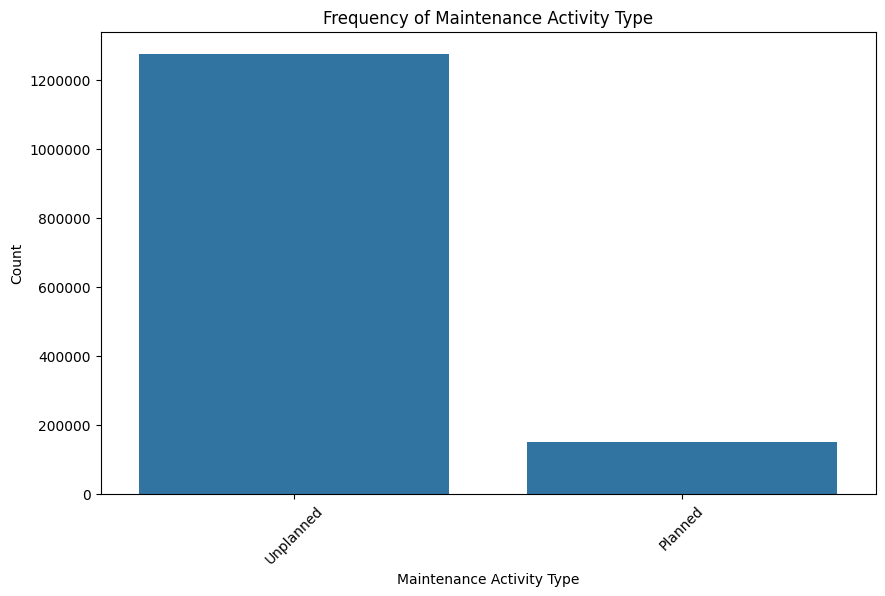

In [ ]:
# Bar chart for MAINTENANCE_ACTIVITY_TYPE
plt.figure(figsize=(10, 6))
sns.countplot(x='MAINTENANCE_ACTIVITY_TYPE', data=data_swire_copy)
plt.title('Frequency of Maintenance Activity Type')
plt.xlabel('Maintenance Activity Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

The bar chart shows the frequency of maintenance activities, categorizing them into "Planned" and "Unplanned" types. It is evident that the majority of maintenance activities are unplanned, with over 1.2 million occurrences compared to significantly fewer planned maintenance activities. Which suggests that most of the downtimes occur without any warning and can be the leading cause of Financial loss, highlighting the need for predictive maintenance.

In [ ]:
data_swire_copy['MAINTENANCE_ACTIVITY_TYPE'].value_counts()

MAINTENANCE_ACTIVITY_TYPE
Unplanned    1276877
Planned       150387
Name: count, dtype: int64

The value counts for MAINTENANCE_ACTIVITY_TYPE indicate that the dataset predominantly consists of unplanned maintenance activities, with 1,276,877 occurrences, compared to only 150,387 planned maintenance activities. This suggests that the current maintenance strategy is largely reactive, dealing with breakdowns as they occur rather than proactively planning maintenance to prevent failures. The significantly higher count of unplanned maintenance events highlights an area for improvement, emphasizing the need for a more proactive, predictive maintenance approach to minimize unexpected downtimes and enhance operational efficiency.

## 6.Bivariate analysis <a name = "6"></a>

 Bivariate analysis is crucial in our case to explore the relationships between two variables, such as the connection between equipment age (EQUIP_AGE) and downtime (ACTUAL_WORK_IN_MINUTES), or between MAINTENANCE_ACTIVITY_TYPE (planned vs. unplanned) and downtime. Understanding these relationships helps us identify which features have the most influence on machine breakdowns or prolonged downtimes, allowing us to determine key drivers behind equipment failures.

### 6.1 Average downtime by maintenance activity type <a name = "6.1"></a>

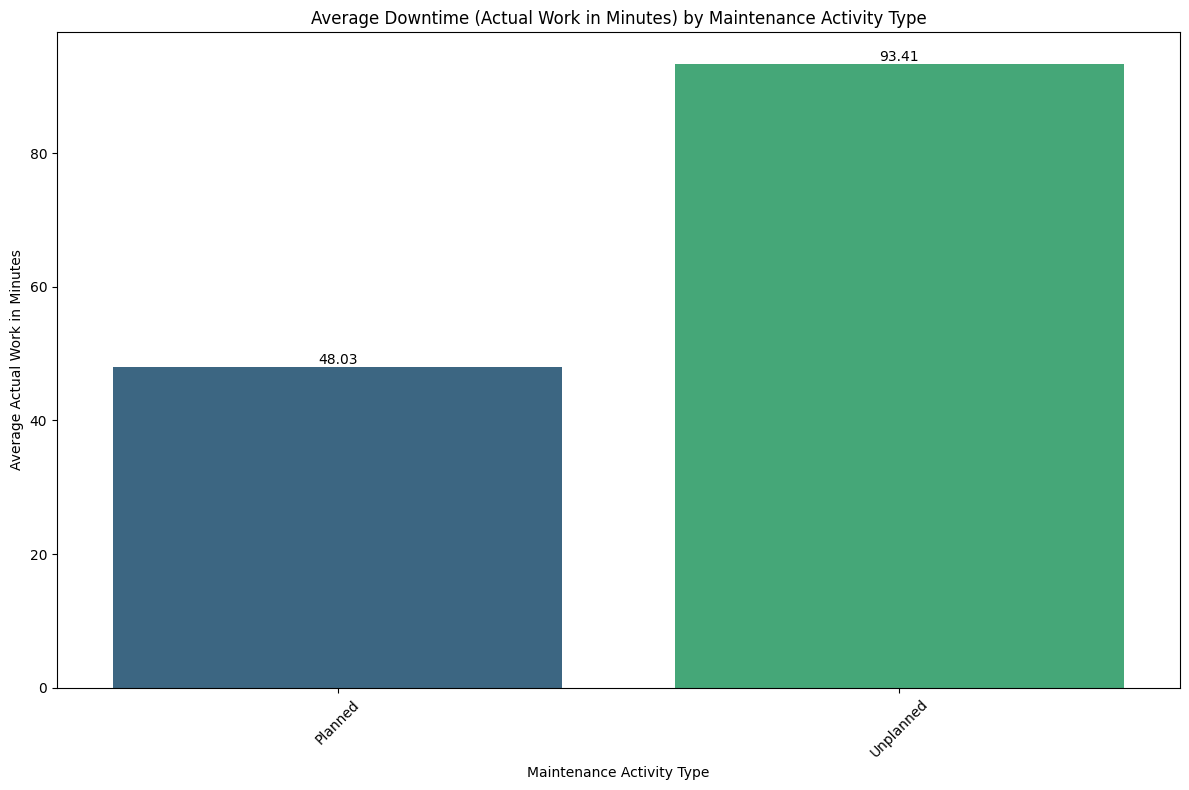

In [ ]:
# Grouping the data by MAINTENANCE_ACTIVITY_TYPE and calculating the mean of ACTUAL_WORK_IN_MINUTES
grouped_data = data_swire_copy.groupby('MAINTENANCE_ACTIVITY_TYPE')['ACTUAL_WORK_IN_MINUTES'].mean().reset_index()

# Plotting the average downtime (ACTUAL_WORK_IN_MINUTES) for each Maintenance Activity Type
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='MAINTENANCE_ACTIVITY_TYPE', y='ACTUAL_WORK_IN_MINUTES', data=grouped_data, palette='viridis')

# Customizing the plot
plt.title('Average Downtime (Actual Work in Minutes) by Maintenance Activity Type')
plt.xlabel('Maintenance Activity Type')
plt.ylabel('Average Actual Work in Minutes')
plt.xticks(rotation=45)

# Adding values to each bar in the plot
for index, row in grouped_data.iterrows():
    bar_plot.text(index, row['ACTUAL_WORK_IN_MINUTES'], f'{row["ACTUAL_WORK_IN_MINUTES"]:.2f}',
                  ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


From the above graph of average downtime by maintenance activity, we can see that for unplanned downtimes, the average time required to resolve the issues is 93.41 minutes, whereas for planned activities, it is 48.03 minutes.  Therefore, emphasizing more planned maintenance activities could substantially reduce downtime, enhance operational stability, and lower maintenance-related costs for Swire Coca-Cola.

### 6.2 Average downtime by plant <a name = "6.2"></a>

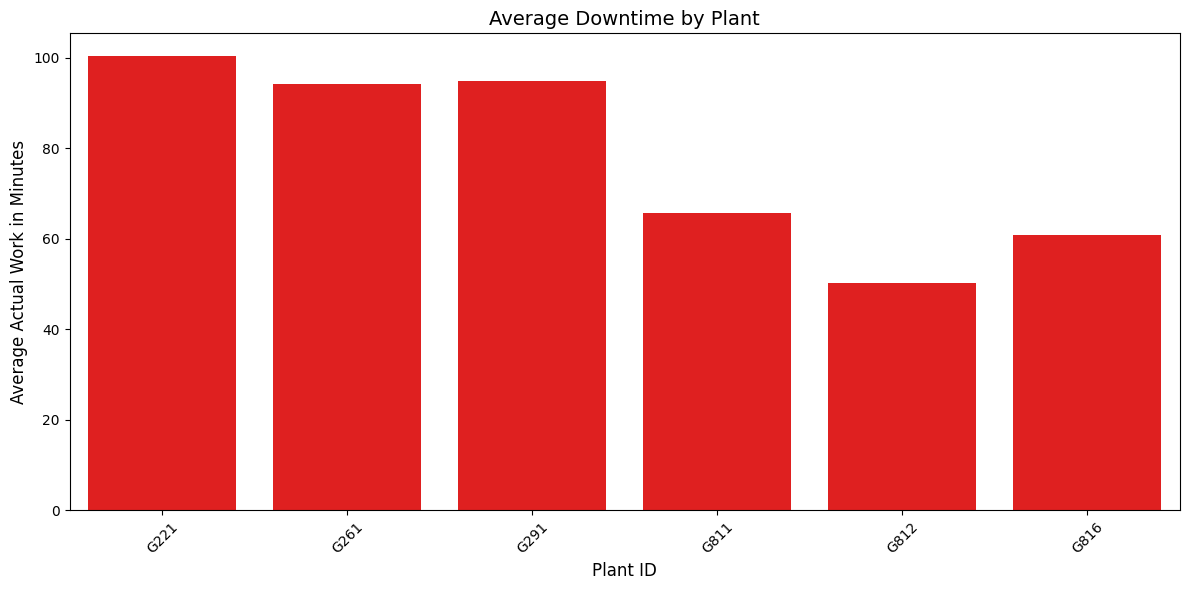

In [ ]:
grouped_data = data_swire_copy.groupby('PLANT_ID')['ACTUAL_WORK_IN_MINUTES'].mean().reset_index()

# Re-plotting as requested without numerical values and with red color bars
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(
    x='PLANT_ID',
    y='ACTUAL_WORK_IN_MINUTES',
    data=grouped_data,
    color='red',  # Use solid red color
    errorbar=None
)

# Customizing the plot
plt.title('Average Downtime by Plant', fontsize=14)
plt.xlabel('Plant ID', fontsize=12)
plt.ylabel('Average Actual Work in Minutes', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


From the above graph of average downtime by plant, we can see that plant G221 has the highest average downtime of 100 minutes, where plants G261 and G291 are six minutes behind, and plant G812 has the lowest downtime of 50.14. From this, the plants G221, G261 and G291 need more attention to reduce the average time by anticipating the breakdowns beforehand.

 ### 6.3 Count of Maintenance type by maintenance activity type <a name = "6.3"></a>

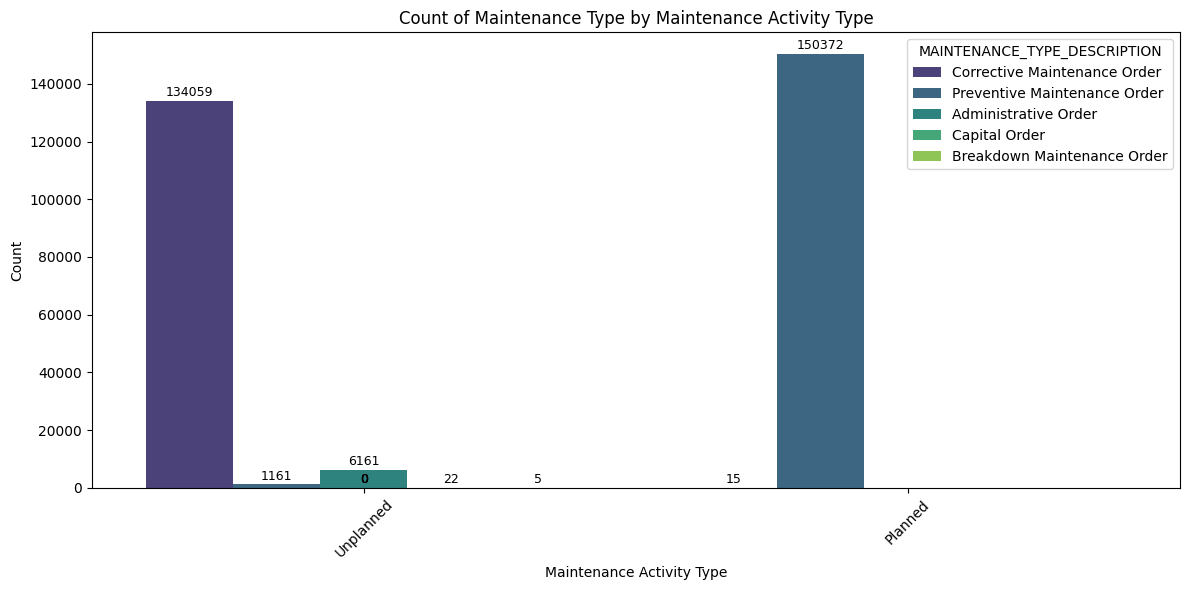

In [ ]:
plt.figure(figsize=(12, 6))
count_plot = sns.countplot(x='MAINTENANCE_ACTIVITY_TYPE', hue='MAINTENANCE_TYPE_DESCRIPTION', data=data_swire_copy, palette='viridis')
plt.title('Count of Maintenance Type by Maintenance Activity Type')
plt.xlabel('Maintenance Activity Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
for p in count_plot.patches:
    count_plot.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 6), textcoords='offset points', fontsize=9, color='black')
plt.tight_layout()
plt.show()


The bar chart provides a breakdown of maintenance activities by type. The majority of unplanned maintenance activities are classified as "Unknown," with over 1.1 million instances. This highlights a significant gap in documenting the specific type of maintenance performed, suggesting the need for better classification and tracking processes. Meanwhile, preventive maintenance activities account for a much smaller share compared to corrective maintenance orders, indicating that proactive measures are being underutilized. Increasing planned maintenance could help reduce the frequency of corrective and unknown maintenance activities, improving operational efficiency.

### 6.4 Production line Analysis using Functional Area <a name = "6.4"></a>

The reason for choosing Functional Area Nodes 4 and 5 in the analysis is because these nodes represent more granular levels of the production and equipment hierarchy, providing deeper insights into the production line's operations. Functional Area Node 4 typically corresponds to specific processes or sub-processes within a plant, while Node 5 further narrows down to individual machine types or components. By analyzing Nodes 4 and 5, we can identify which specific parts of the production line or machinery are contributing the most to downtime, allowing for targeted interventions.

In [ ]:
print(data_swire_copy['FUNCTIONAL_AREA_NODE_4_MODIFIED'].value_counts())


FUNCTIONAL_AREA_NODE_4_MODIFIED
FILLER                      46322
PACKER                      35230
CONVEYOR                    34765
LABELER                     18945
PALLETIZER                  16239
                            ...  
MIXERS                          1
BATCH STATION METER SKID        1
G811 CONDENSATE RETURN          1
CIP TANK SKID                   1
CIP VALVE MATRIX SKID           1
Name: count, Length: 86, dtype: int64


In [ ]:
print(data_swire_copy['FUNCTIONAL_AREA_NODE_5_MODIFIED'].value_counts())

FUNCTIONAL_AREA_NODE_5_MODIFIED
FULL CAN TO ACCUMULATION TABLE              251
PACKER 1, MODEL DUODOZEN 1250SX             210
FULL CASE CONVEYORS                         158
EMPTY CASE CONVEYORS                        136
FULL CASE SPIRAL TO PALLETIZER              125
FB CONVEYORS TO DOUGLAS/HI-CONE SPLIT       114
EMPTY CAN                                   110
COMPRESSOR                                  110
PACKER 2, MODEL FENIX 185V                  108
FULL CASE CONVEYOR                          101
EAST SYRUP TANKS                             98
FULL BOTTLE CONVEYORS                        97
EMPTY CAN CONVEYOR                           90
*OLD SYSTEM MT CASE CONVEYORS*               56
LOOSE FB TO PACKER CONVEYORS                 52
FULL CAN CONVEYOR                            50
EVANS COOLING TUNNEL L3, INSIDE BUILDING     48
HARTNESS TO PAI FULL CASE CONVEYORS          47
PARTIAL CASES GPI (RIVERWOOD) TO DOUGLAS     43
INFEED TO HICONE TO PACKER                   33
EMPTY CA

 ### 6.4.1 Average downtime by functional area node 4 <a name = "6.4.1"></a>

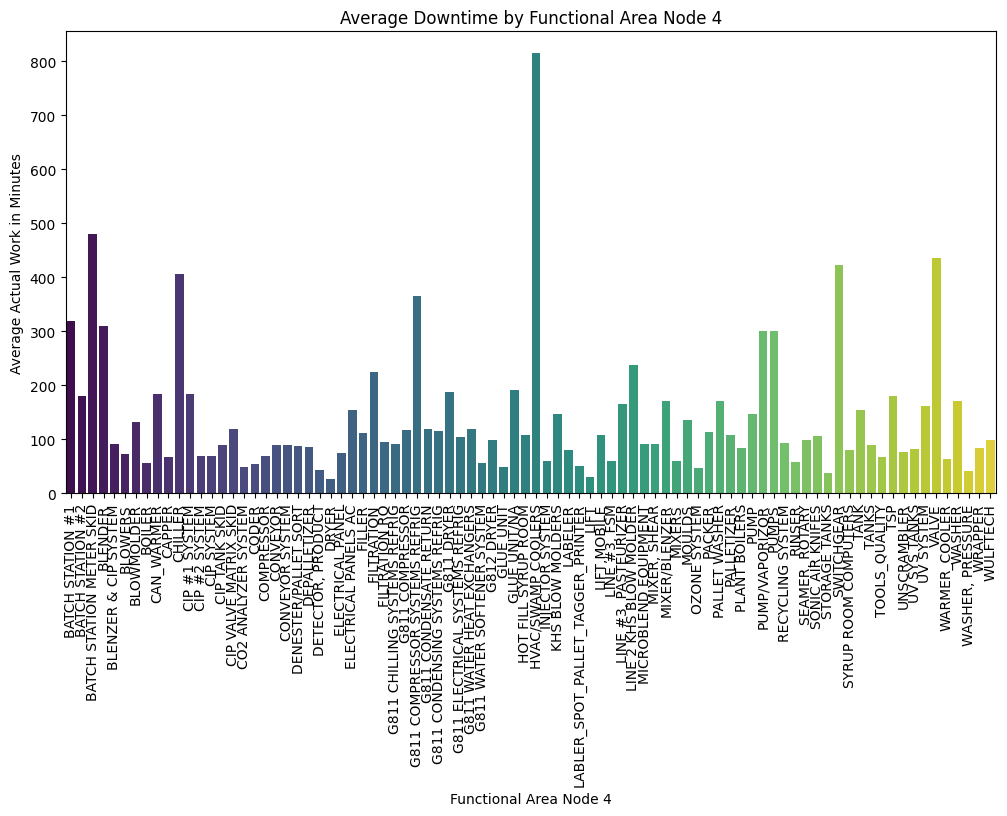

In [ ]:
avg_downtime = data_swire_copy.groupby('FUNCTIONAL_AREA_NODE_4_MODIFIED')['ACTUAL_WORK_IN_MINUTES'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='FUNCTIONAL_AREA_NODE_4_MODIFIED', y='ACTUAL_WORK_IN_MINUTES', data=avg_downtime, palette='viridis')
plt.title('Average Downtime by Functional Area Node 4')
plt.xlabel('Functional Area Node 4')
plt.ylabel('Average Actual Work in Minutes')
plt.xticks(rotation=90)
plt.show()

From the above graph, average downtime by functional area node four, we can see the variation of downtime in various areas, where the average downtime is 50 to 100 minutes for some regions. The data reveals that "HVAC/SWAMP COOLERS" experienced the highest average downtime of approximately 815 minutes, indicating a significant maintenance burden. Several other functional areas, such as "BATCH STATION METER XX" and "G811 COMPRESSOR SYSTEMS," also show extended downtimes exceeding 400 minutes, which highlights potential inefficiencies in these nodes. Understanding these prolonged downtimes can help target specific areas for optimization and preventive maintenance strategies to reduce operational delays and improve overall plant efficiency.

 ### 6.4.2 Average downtime by functional area node 5 <a name = "6.4.2"></a>

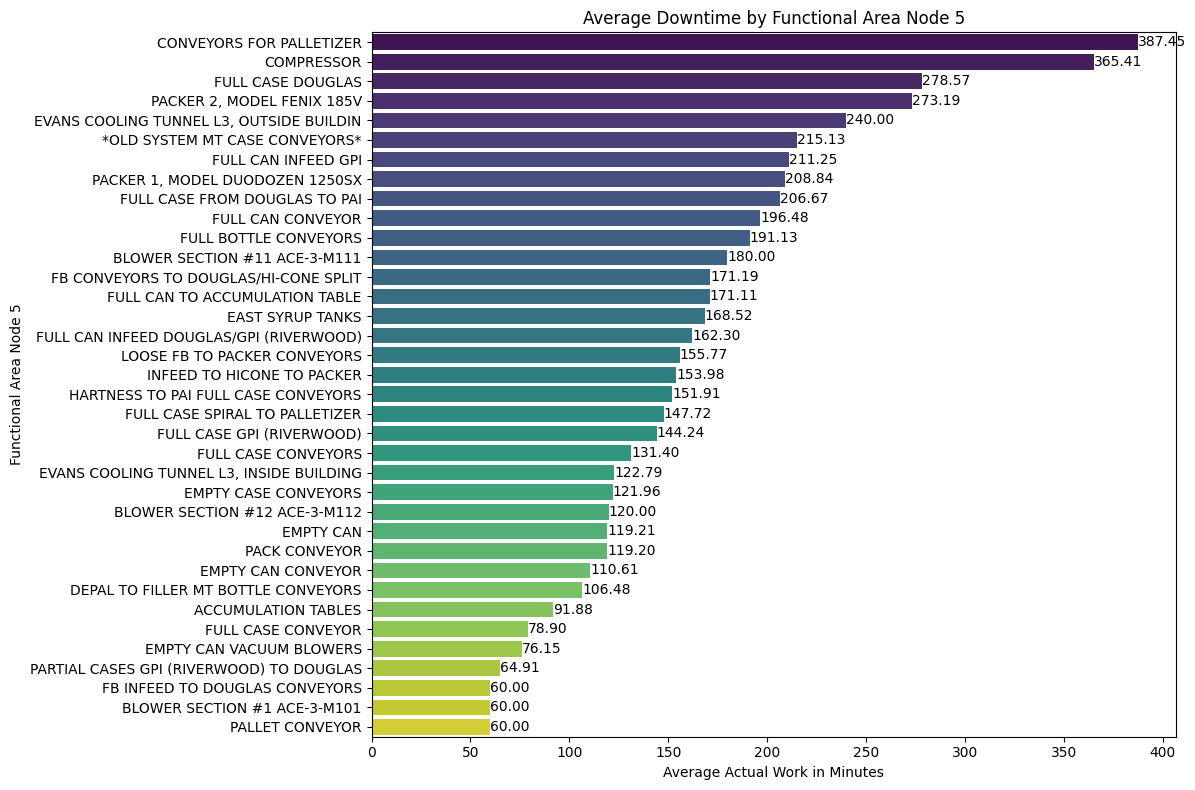

In [ ]:
# Grouping the data by FUNCTIONAL_AREA_NODE_5_MODIFIED and calculating the average downtime (ACTUAL_WORK_IN_MINUTES)
average_downtime_node5 = data_swire_copy.groupby('FUNCTIONAL_AREA_NODE_5_MODIFIED')['ACTUAL_WORK_IN_MINUTES'].mean().reset_index()

# Sorting the values for better visualization
average_downtime_node5 = average_downtime_node5.sort_values(by='ACTUAL_WORK_IN_MINUTES', ascending=False)

# Plotting the average downtime by Functional Area Node 5
plt.figure(figsize=(12, 8))
sns.barplot(x='ACTUAL_WORK_IN_MINUTES', y='FUNCTIONAL_AREA_NODE_5_MODIFIED', data=average_downtime_node5, palette='viridis')
plt.title('Average Downtime by Functional Area Node 5')
plt.xlabel('Average Actual Work in Minutes')
plt.ylabel('Functional Area Node 5')

for index, value in enumerate(average_downtime_node5['ACTUAL_WORK_IN_MINUTES']):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left')

plt.tight_layout()
plt.show()

The bar chart visualizes the average downtime by various functional area nodes. It highlights that "CONVEYORS FOR PALLETIZER" and "COMPRESSOR" have the highest average downtime, indicating these areas experience significant maintenance delays. Conversely, equipment like "BLOWER SECTION #1 ACE-3-M101" and "PALLET CONVEYOR" have minimal downtime, suggesting they are more efficient or require less maintenance. This information is crucial for prioritizing maintenance efforts and focusing on areas that cause the most disruptions to improve overall efficiency.

 ### 6.5 Frequency of Maintenance Type Across Equipment Categories <a name = "6.5"></a>

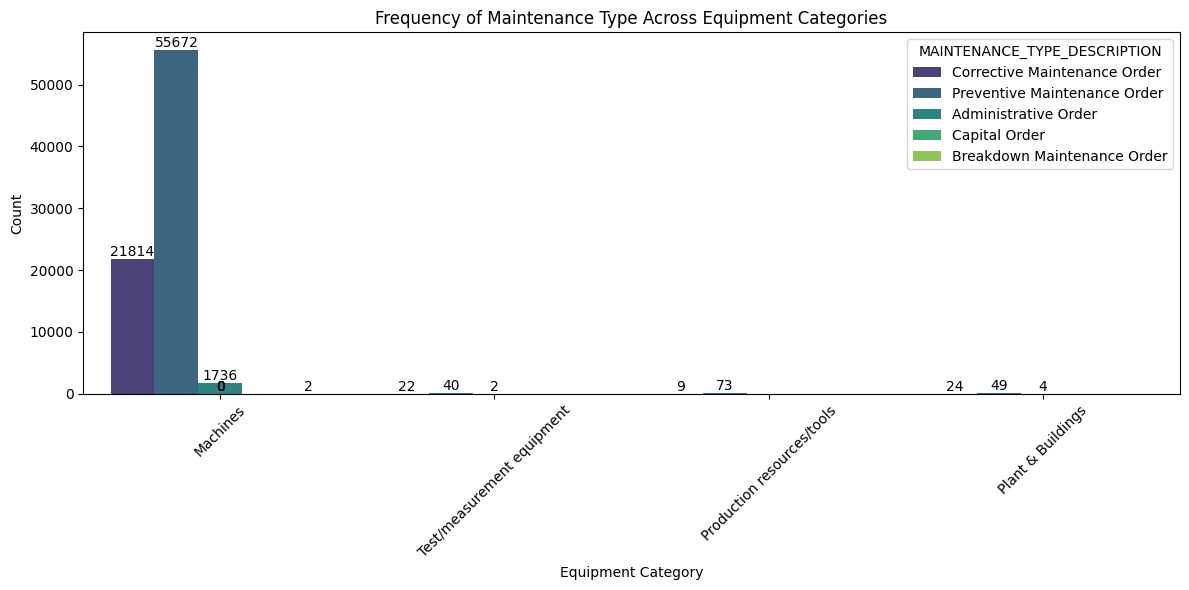

In [ ]:
plt.figure(figsize=(12, 6))
count_plot = sns.countplot(x='EQUIP_CAT_DESC', hue='MAINTENANCE_TYPE_DESCRIPTION', data=data_swire_copy, palette='viridis')
plt.title('Frequency of Maintenance Type Across Equipment Categories')
plt.xlabel('Equipment Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Adding values on top of each bar
for p in count_plot.patches:
    count_plot.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

This bar plot illustrates the frequency of different maintenance types across various equipment categories. The "Unknown" category dominates the chart, with over 1.1 million occurrences, which highlights potential data quality issues or gaps in proper classification. The "Machines" category shows a relatively high count of corrective maintenance compared to preventive, indicating that these assets are primarily addressed post-failure, which suggests inefficiencies in maintenance practices. It is also clear that other equipment categories, such as "Production resources/tools," "Test measurement equipment," and "Plant & Buildings," have extremely low or no maintenance records, which could either reflect lack of incidents or insufficient logging of maintenance activities. Addressing these unknowns and optimizing preventive measures could reduce unexpected breakdowns, thereby improving productivity and efficiency.

 ### 6.6 Scatter Plot of Equipment Age vs Actual Work in Minutes <a name = "6.6"></a>

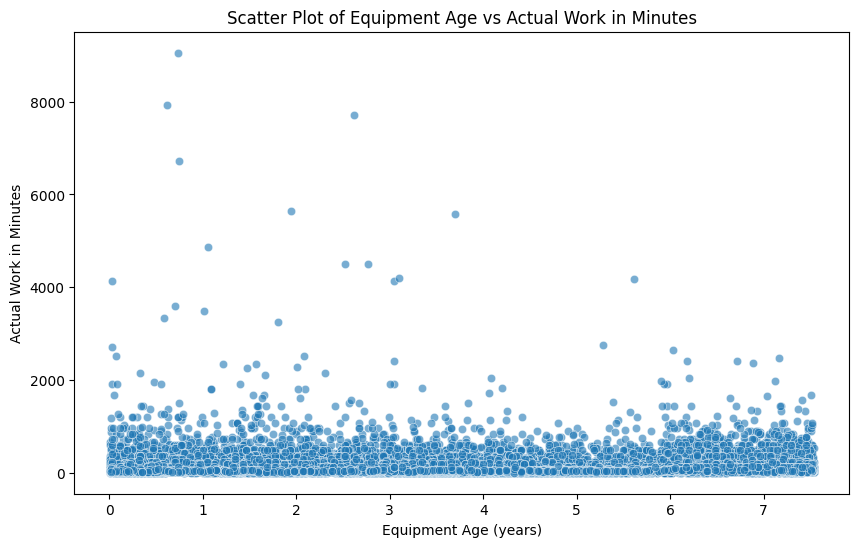

In [ ]:
data_swire_copy['EXECUTION_START_DATE'] = pd.to_datetime(data_swire_copy['EXECUTION_START_DATE'], errors='coerce')
data_swire_copy['EQUIP_VALID_FROM'] = pd.to_datetime(data_swire_copy['EQUIP_VALID_FROM'], errors='coerce')

# Calculate equipment age in years
data_swire_copy['EQUIP_AGE'] = (data_swire_copy['EXECUTION_START_DATE'] - data_swire_copy['EQUIP_VALID_FROM']).dt.days / 365

# Filter for records where equipment age is greater than 0
filtered_data = data_swire_copy[data_swire_copy['EQUIP_AGE'] > 0]

# Scatter plot of equipment age vs actual work in minutes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='EQUIP_AGE', y='ACTUAL_WORK_IN_MINUTES', data=filtered_data, alpha=0.6)
plt.title("Scatter Plot of Equipment Age vs Actual Work in Minutes")
plt.xlabel("Equipment Age (years)")
plt.ylabel("Actual Work in Minutes")
plt.show()


 Observing the data, there is no clear linear or consistent trend indicating that older equipment consistently requires more maintenance time. However, a few scattered points show higher actual work minutes even for relatively young equipment (0-2 years), which may indicate isolated instances of breakdowns or extensive repairs. Most of the data points lie within a lower range of work minutes across all equipment ages, suggesting that, on average, equipment age alone might not be a primary factor in determining maintenance workload.

## 7.Multivariate analysis <a name = "7"></a>

 In our predictive maintenance project, multivariate analysis is performed to understand how multiple factors interact and collectively influence outcomes like downtime and maintenance type. For instance, we can analyze the combined effect of equipment age, maintenance type, and functional area on the likelihood of machine failure. This analysis helps to identify complex relationships and dependencies that might be affecting machine performance and downtime.

### 7.1 Average Downtime by Maintenance Activity Type for Different Plants <a name = "7.1"></a>

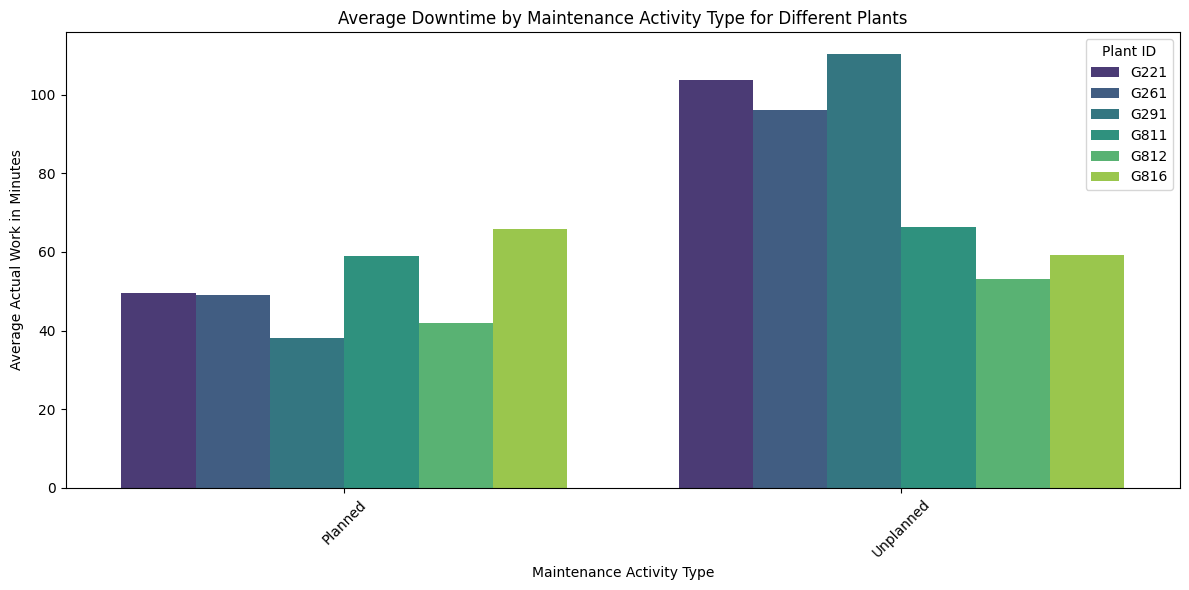

In [ ]:
# Grouping data by MAINTENANCE_ACTIVITY_TYPE and PLANT_ID and calculating the mean of ACTUAL_WORK_IN_MINUTES
grouped_data = data_swire_copy.groupby(['MAINTENANCE_ACTIVITY_TYPE', 'PLANT_ID'])['ACTUAL_WORK_IN_MINUTES'].mean().reset_index()

# Plotting a bar plot with hue to differentiate plants
plt.figure(figsize=(12, 6))
sns.barplot(x='MAINTENANCE_ACTIVITY_TYPE', y='ACTUAL_WORK_IN_MINUTES', hue='PLANT_ID', data=grouped_data, palette='viridis')

# Customizing the plot
plt.title('Average Downtime by Maintenance Activity Type for Different Plants')
plt.xlabel('Maintenance Activity Type')
plt.ylabel('Average Actual Work in Minutes')
plt.xticks(rotation=45)
plt.legend(title='Plant ID')
plt.tight_layout()
plt.show()

From the above graph of average downtime by maintenance activity type for different plants, we can see that the G291, G221, and G261 plants tend to have the highest unplanned downtime with an average time of 100 minutes for Maintenance, which says that these plants need more attention as the unplanned downtimes tend to take more time to resolve the issue.

### 7.2 Maintenance Type by Equipment Age and Downtime  <a name = "7.2"></a>

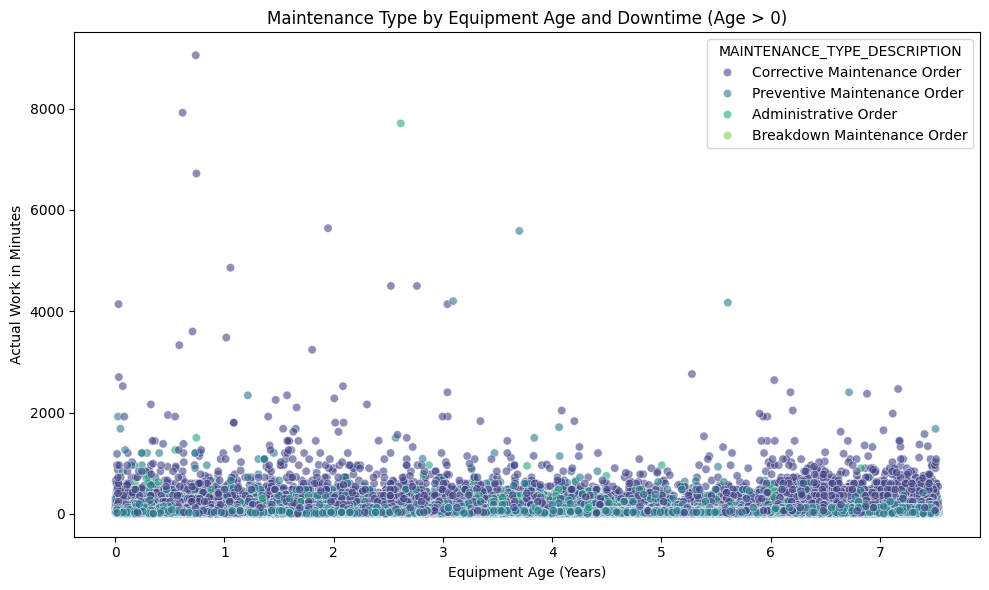

In [ ]:

# Filter for records where equipment age is greater than 0
filtered_data = data_swire_copy[data_swire_copy['EQUIP_AGE'] > 0]

# Scatter plot to visualize the relationship between equipment age and maintenance type
plt.figure(figsize=(10, 6))
sns.scatterplot(x='EQUIP_AGE', y='ACTUAL_WORK_IN_MINUTES', hue='MAINTENANCE_TYPE_DESCRIPTION', data=filtered_data, alpha=0.6, palette='viridis')
plt.title('Maintenance Type by Equipment Age and Downtime (Age > 0)')
plt.xlabel('Equipment Age (Years)')
plt.ylabel('Actual Work in Minutes')
plt.tight_layout()
plt.show()

The data points are color-coded based on the maintenance type, including corrective, preventive, administrative, and breakdown maintenance orders. Most of the points, regardless of maintenance type, cluster at lower downtime values, especially around the 0-2 year mark. There are scattered instances of high downtime, particularly for younger equipment, indicating occasional extensive repairs or maintenance requirements even at an early age. Breakdown maintenance, which involves unplanned repairs, shows significant downtime spread across various equipment ages, potentially contributing to increased operational disruptions. Preventive and corrective maintenance are generally clustered towards lower downtime, suggesting they might be more manageable and less time-intensive compared to breakdowns. The plot suggests that unplanned breakdown maintenance tends to take longer to resolve, underscoring the importance of preventive maintenance strategies to minimize unexpected high downtime events.

## 8. Outlier Analysis <a name = "8"></a>

Outlier analysis is crucial in our predictive maintenance case for Swire Coca-Cola, as it helps identify unusual patterns or anomalies that could indicate underlying issues in machine performance or data inconsistencies.

In [ ]:
# Calculate Q1  and Q3
Q1 = data_swire_copy['ACTUAL_WORK_IN_MINUTES'].quantile(0.25)
Q3 = data_swire_copy['ACTUAL_WORK_IN_MINUTES'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data_swire_copy[(data_swire_copy['ACTUAL_WORK_IN_MINUTES'] < lower_bound) |
                           (data_swire_copy['ACTUAL_WORK_IN_MINUTES'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")


Number of outliers: 101066


In [ ]:
# Remove outliers from the dataset
data_swire_copy_no_outliers = data_swire_copy[(data_swire_copy['ACTUAL_WORK_IN_MINUTES'] >= lower_bound) &
                                              (data_swire_copy['ACTUAL_WORK_IN_MINUTES'] <= upper_bound)]
print(f"Number of rows after removing outliers: {len(data_swire_copy_no_outliers)}")


Number of rows after removing outliers: 1326198


In the analysis of outliers for the ACTUAL_WORK_IN_MINUTES variable, a total of 101,066 outliers were identified. This suggests that a significant number of observations fall outside the typical range defined by the interquartile range (IQR) method, which could indicate unusual patterns or anomalies. Removing these outliers leaves us with 1,326,198 data points, which is a considerable amount, ensuring that our dataset still captures enough variability while reducing the influence of extreme values that could distort our analysis.

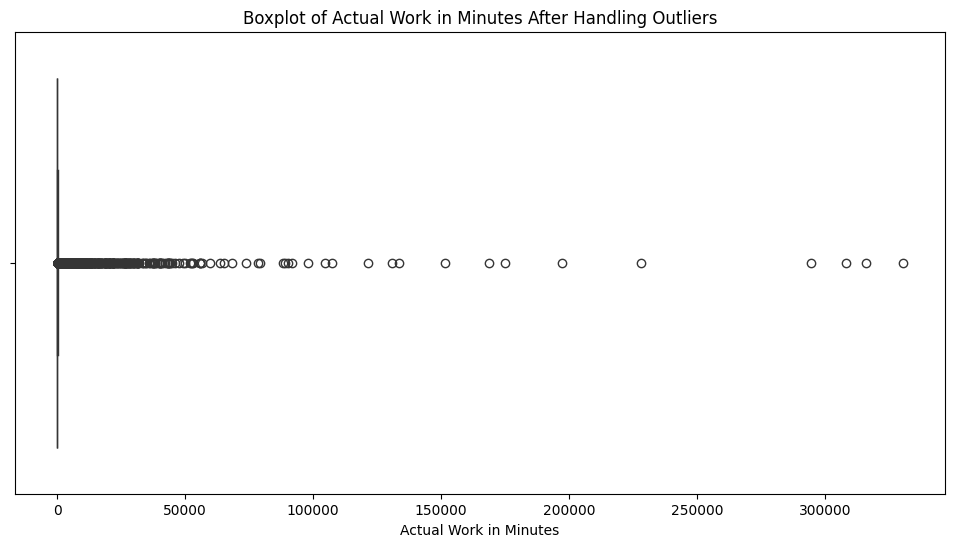

In [ ]:
# Boxplot after handling outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=data_swire_copy['ACTUAL_WORK_IN_MINUTES'], palette='viridis')
plt.title('Boxplot of Actual Work in Minutes After Handling Outliers')
plt.xlabel('Actual Work in Minutes')
plt.show()


The boxplot of the "Actual Work in Minutes" after handling outliers shows that the data contains significant extreme values. The majority of the actual work minutes are concentrated near the lower end of the scale, with a very long tail extending towards higher values, indicating the presence of several high outliers. These extreme outliers go up to over 300,000 minutes, which represents unusually long durations of work. The whiskers of the boxplot are very short in comparison, suggesting that most of the data points are much smaller, while the extreme values pull the distribution to the right. After removing some outliers, the dataset was reduced to 1,326,198 rows, showing that outlier handling was done conservatively, leaving many influential outliers for further analysis.

**Note: In our analysis of building predictive maintenance models, we have chosen not to impute missing values in the dataset. Given the large volume of data, imputing missing values with a placeholder like "unknown" could introduce significant inaccuracies, especially with notable percentages of missing data in critical variables. In our case, with a significant portion of missing data across critical variables (e.g., 89.31% in MAINTENANCE_PLAN and MAINTENANCE_ITEM and 79.56% in ORDER_DESCRIPTION), imputing these values with placeholders would likely dilute the model’s predictive power. As discussed in “Applied Predictive Modeling” by Max Kuhn and Kjell Johnson, industrial data requires precise handling since missing values in operational data can lead to “false positive” maintenance alerts or inaccurate risk assessments. Imputing unknowns in these settings may fail to reflect true failure patterns and could result in the model misinterpreting downtime risk, leading to overestimated or underestimated maintenance needs.**

**Additionally, due to the considerable data drift and the high percentage of missing values, imputing these with placeholders would risk adding substantial inaccuracies. Consistency and accuracy across records are essential, especially for machine-specific details critical in downtime prediction. Imputing values for these variables could lead to incorrect assumptions about machine behavior and obscure the true patterns we aim to capture. By leaving these values unfilled, we preserve data integrity and ensure our predictive models are based on reliable and complete information. This approach helps us maintain accuracy in our analysis, supporting better predictive insights for maintenance.**

## 9. Feature Engineering <a name = "9"></a>

We aim to capture insights that align with Swire Coca-Cola’s business objectives. Specifically, we extract information on what machines or components are breaking down, which helps us understand failure patterns. Timestamps of breakdowns allow us to model time-based trends, revealing any seasonal or time-dependent patterns in machine failures. The conditions and descriptions of breakdown events provide clues to underlying causes, while machine locations enable a granular analysis of failure risks. Additionally, the type of fix used in repairs offers insights into effective maintenance strategies, and downtime recorded in actual work minutes quantifies the financial impact of breakdowns. By incorporating these aspects into our dataset, feature engineering makes our predictive models more robust, helping us reduce unplanned downtime, minimize maintenance costs, and enhance production efficiency.

### 9.1 Breakdown Analysis by Equipment Type <a name = "9.1"></a>

In [ ]:
data_swire_copy.shape

(1427264, 26)

### 9.2 Breakdown Timeline Analysis <a name = "9.2"></a>

In [ ]:
# Ensure the 'EXECUTION_START_DATE' column is in datetime format
data_swire_copy['EXECUTION_START_DATE'] = pd.to_datetime(data_swire_copy['EXECUTION_START_DATE'], errors='coerce')

# Extract the year from the 'EXECUTION_START_DATE' column
data_swire_copy['Year'] = data_swire_copy['EXECUTION_START_DATE'].dt.year

# Group by year and count the work orders for each year
yearly_work_orders = data_swire_copy.groupby('Year').size().reset_index(name='Work_Order_Count')

# Display the year-wise work order count
print(yearly_work_orders)

   Year  Work_Order_Count
0  2013                 1
1  2016             15508
2  2017             86733
3  2018            142990
4  2019            149477
5  2020            136490
6  2021            134068
7  2022            129582
8  2023            147483
9  2024            106243


The output shows a year-wise breakdown of work orders, indicating significant fluctuations in maintenance activities over the years. Starting from a minimal count in 2013, there was a sharp increase in 2017, with work orders peaking in 2019 at 203,767. This peak suggests a period of intense maintenance or operational challenges. In subsequent years, they decreased, possibly due to enhanced maintenance strategies or operational improvements. However, 2023 shows another rise, indicating renewed maintenance demands or issues. The data helps identify trends in maintenance workload over time, allowing for resource planning and process optimization in response to high-demand years.

C:\Users\u1478229\AppData\Local\Temp\ipykernel_7708\4009809684.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  downtime_summary = weekly_downtime.groupby('day_of_week')['downtime_count'].sum()


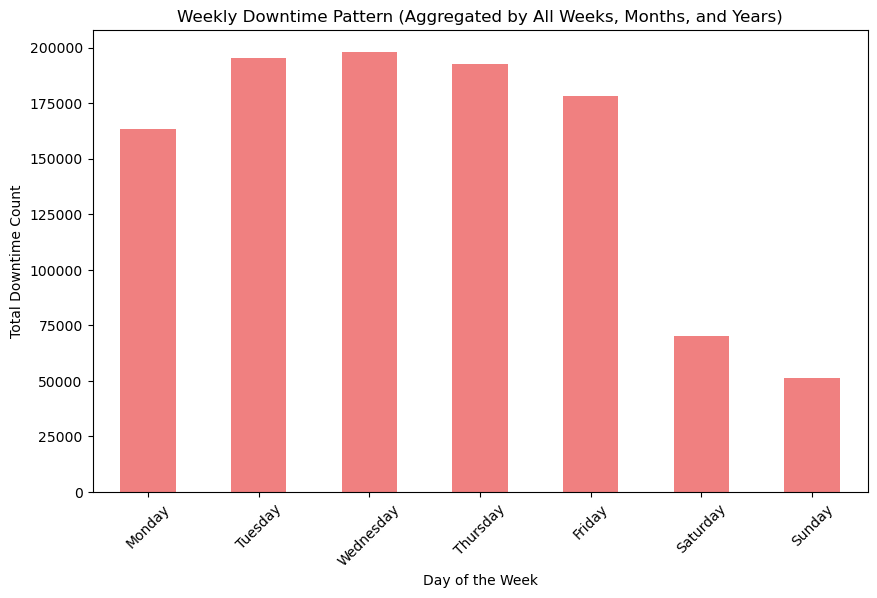

In [ ]:
data_swire_copy['EXECUTION_START_DATE'] = pd.to_datetime(data_swire_copy['EXECUTION_START_DATE'], errors='coerce')
data_swire_copy = data_swire_copy.dropna(subset=['EXECUTION_START_DATE'])

# Extract year, month, week, and day of the week
data_swire_copy['year'] = data_swire_copy['EXECUTION_START_DATE'].dt.year
data_swire_copy['month'] = data_swire_copy['EXECUTION_START_DATE'].dt.month
data_swire_copy['week'] = data_swire_copy['EXECUTION_START_DATE'].dt.isocalendar().week
data_swire_copy['day_of_week'] = data_swire_copy['EXECUTION_START_DATE'].dt.day_name()

# Count downtime instances per day of the week for each week, month, and year
weekly_downtime = data_swire_copy.groupby(['year', 'month', 'week', 'day_of_week']).size().reset_index(name='downtime_count')

# Reorder day_of_week for proper plotting order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_downtime['day_of_week'] = pd.Categorical(weekly_downtime['day_of_week'], categories=day_order, ordered=True)

# Summarize downtime counts across all weeks, months, and years for each day of the week
downtime_summary = weekly_downtime.groupby('day_of_week')['downtime_count'].sum()

# Plot weekly downtime pattern, aggregated across all weeks, months, and years
plt.figure(figsize=(10, 6))
downtime_summary.plot(kind='bar', color='lightcoral')
plt.title("Weekly Downtime Pattern (Aggregated by All Weeks, Months, and Years)")
plt.xlabel("Day of the Week")
plt.ylabel("Total Downtime Count")
plt.xticks(rotation=45)
plt.show()


The bar chart displays the weekly downtime pattern, aggregating downtime counts across all weeks, months, and years to reveal trends based on the day of the week. The data shows that downtime events are significantly more frequent during weekdays, with the highest counts observed on Tuesday, Wednesday, and Thursday, each surpassing 250,000 events. Friday and Monday also experience high downtime frequencies, though slightly lower than the mid-week peak.

In contrast, weekends show a considerable drop in downtime occurrences. Saturday has moderate downtime levels, while Sunday exhibits the lowest downtime count across the week. This pattern suggests that downtime events are closely linked to production or operational activities, which are likely more intense on weekdays and less active during weekends. This insight could indicate a need for increased maintenance support during the high-activity weekdays to minimize operational disruptions, while weekends could be an optimal time for scheduled maintenance or system checks to prepare for the upcoming week.

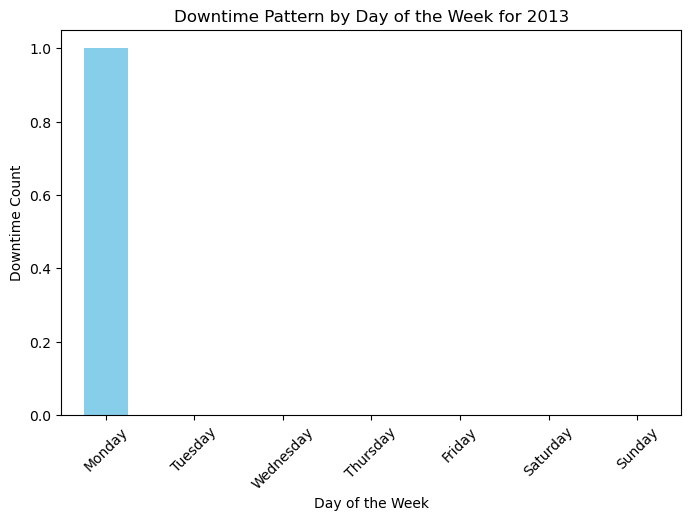

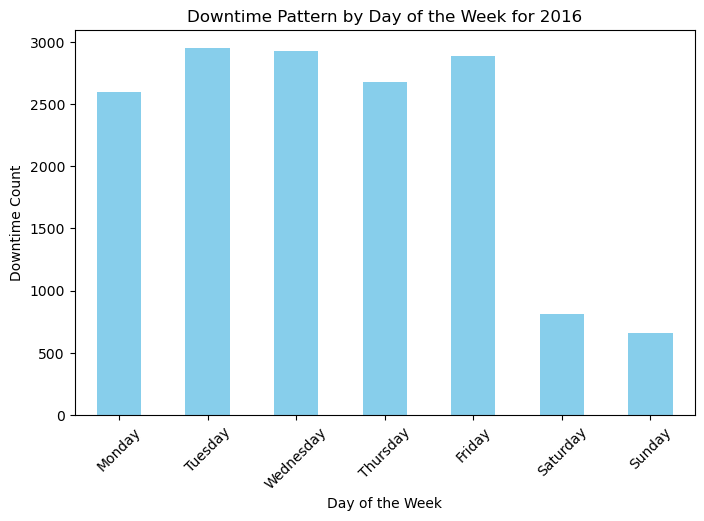

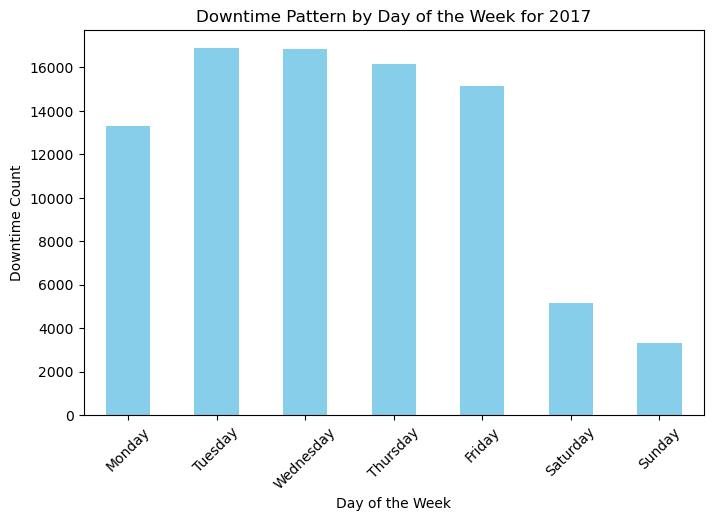

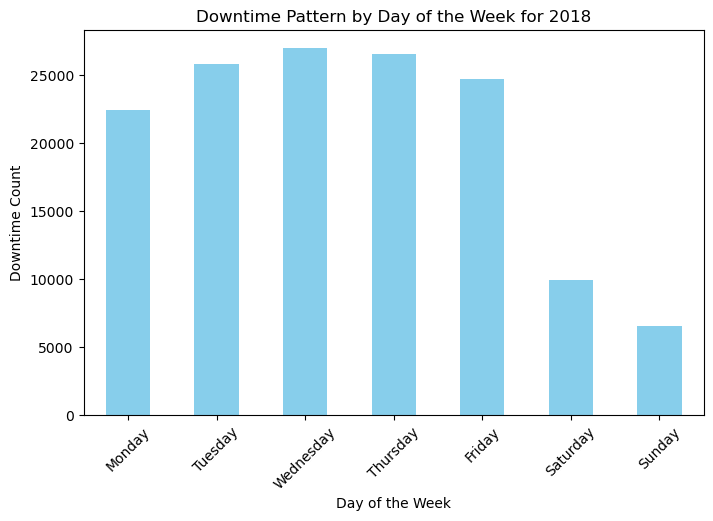

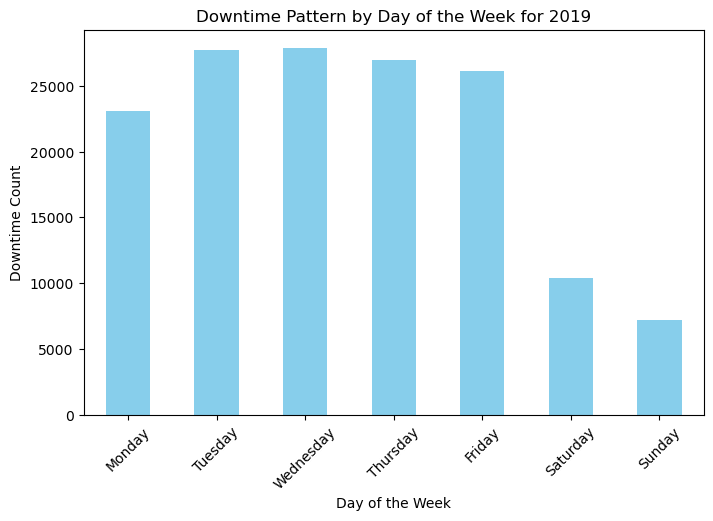

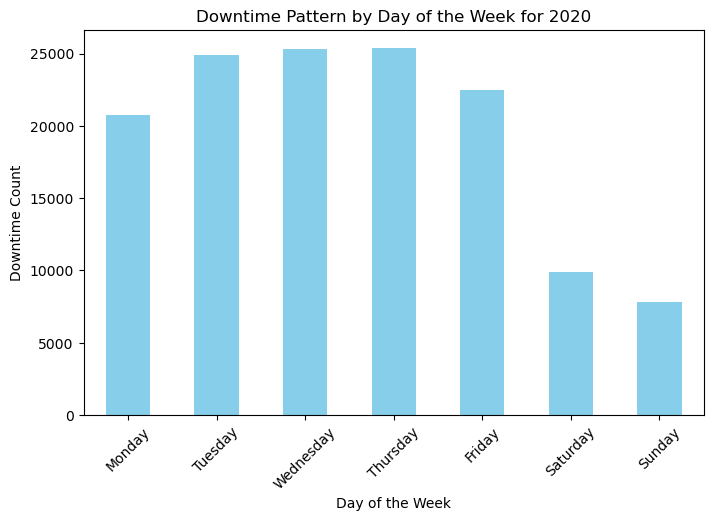

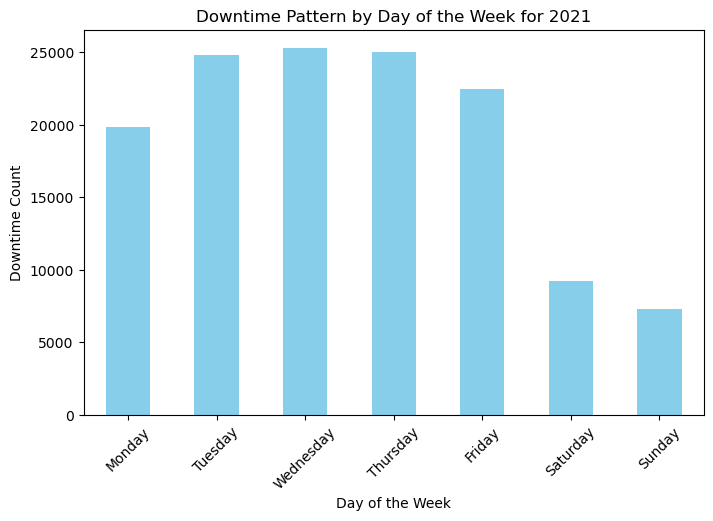

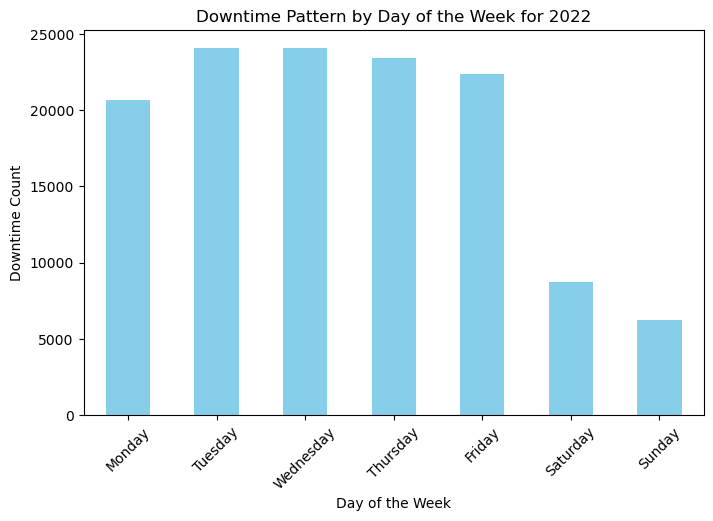

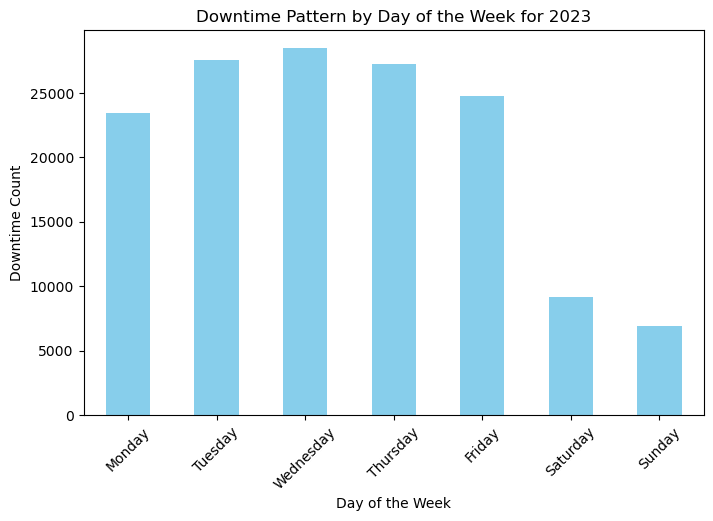

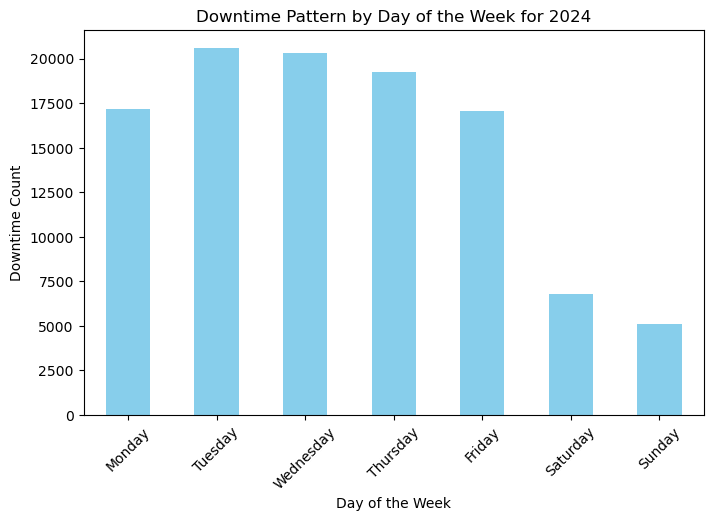

In [ ]:
data_swire_copy['EXECUTION_START_DATE'] = pd.to_datetime(data_swire_copy['EXECUTION_START_DATE'], errors='coerce')
data_swire_copy = data_swire_copy.dropna(subset=['EXECUTION_START_DATE'])

# Extract year and day of the week
data_swire_copy['year'] = data_swire_copy['EXECUTION_START_DATE'].dt.year
data_swire_copy['day_of_week'] = data_swire_copy['EXECUTION_START_DATE'].dt.day_name()

# Count downtime instances per day of the week for each year
yearly_downtime = data_swire_copy.groupby(['year', 'day_of_week']).size().reset_index(name='downtime_count')

# Reorder day_of_week for consistent plotting order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
yearly_downtime['day_of_week'] = pd.Categorical(yearly_downtime['day_of_week'], categories=day_order, ordered=True)

# Loop through each year and plot downtime pattern for that year
for year in yearly_downtime['year'].unique():
    # Filter data for the specific year
    data_for_year = yearly_downtime[yearly_downtime['year'] == year].set_index('day_of_week').reindex(day_order).fillna(0)

    # Plot for the specific year
    plt.figure(figsize=(8, 5))
    data_for_year['downtime_count'].plot(kind='bar', color='skyblue')
    plt.title(f"Downtime Pattern by Day of the Week for {year}")
    plt.xlabel("Day of the Week")
    plt.ylabel("Downtime Count")
    plt.xticks(rotation=45)
    plt.show()

The series of bar charts displays the weekly downtime patterns across different years, providing insights into which days experience the most downtime. Here’s a summary interpretation based on the patterns observed:

*  **Consistent Weekday Pattern:** Across all years from 2013 to 2024, weekdays (especially Tuesday, Wednesday, and Thursday) consistently show the highest downtime counts, indicating that most operational activities—and consequently, potential for downtimes—occur during the middle of the week. Monday and Friday also see significant downtime, though generally less than the mid-week peak.

*  **Lower Downtime on Weekends:** Saturday and Sunday consistently exhibit the lowest downtime counts throughout all years. This pattern suggests reduced operational activity during weekends, likely due to scheduled downtime, reduced production shifts, or maintenance tasks planned to avoid impacting peak operation times.

*  **Yearly Variations:** Although the general pattern remains consistent, the absolute downtime counts vary by year. For example:In 2013, downtime appears minimal, possibly due to limited data or lower reporting during this initial year.
From 2016 onwards, the downtime counts on weekdays generally increase, indicating a possible rise in production activities or increased reporting and tracking of downtime events over time.
Strategic Implications: The consistency of high weekday downtimes suggests a need for additional maintenance or support resources on Tuesday through Thursday. Additionally, the relatively low downtime on weekends might be an optimal window for scheduled maintenance to prepare machinery for the upcoming workweek.

Overall, this analysis highlights a stable weekly downtime pattern across the years, with the busiest operational days aligning with the highest downtime counts, while weekends present an opportunity for preventive maintenance or reduced production.

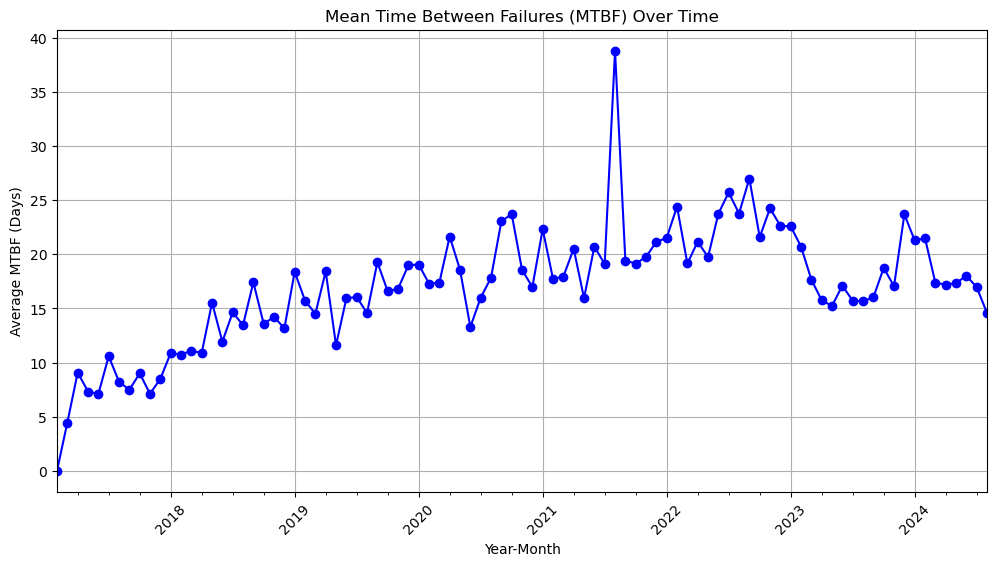

In [ ]:

data_swire_copy['EXECUTION_START_DATE'] = pd.to_datetime(data_swire_copy['EXECUTION_START_DATE'], errors='coerce')
data_swire_copy = data_swire_copy.dropna(subset=['EXECUTION_START_DATE'])

# Sort data by machine and by date to calculate intervals
data_swire_copy = data_swire_copy.sort_values(by=['EQUIPMENT_ID', 'EXECUTION_START_DATE'])

# Calculate the time difference (in days) between consecutive failures for each machine
data_swire_copy['time_since_last_failure'] = data_swire_copy.groupby('EQUIPMENT_ID')['EXECUTION_START_DATE'].diff().dt.days

# Drop any NaN values that result from the first failure in each machine's series
data_swire_copy = data_swire_copy.dropna(subset=['time_since_last_failure'])

# Calculate average MTBF over time by month or year (adjust as needed)
data_swire_copy['year_month'] = data_swire_copy['EXECUTION_START_DATE'].dt.to_period('M')  # Month-wise aggregation
mtbf_over_time = data_swire_copy.groupby('year_month')['time_since_last_failure'].mean()

# Plot MTBF over time
plt.figure(figsize=(12, 6))
mtbf_over_time.plot(kind='line', marker='o', color='blue')
plt.title("Mean Time Between Failures (MTBF) Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Average MTBF (Days)")
plt.xticks(rotation=45)
plt.grid()
plt.show()

The graph illustrates the Mean Time Between Failures (MTBF) over time, measured in days, to evaluate equipment reliability across various months and years. From 2017 to early 2024, there is a general upward trend in MTBF, suggesting an improvement in reliability, likely due to more effective maintenance practices or equipment upgrades. However, this upward trend is interspersed with fluctuations. A notable peak occurs in early 2021, where MTBF reaches its highest value, indicating an unusual period of stability with fewer equipment failures. This could have resulted from enhanced maintenance practices, a temporary reduction in operational intensity, or possibly a period of reduced production. After each peak, MTBF tends to decline, as seen in late 2021 and mid-2023, suggesting periods of increased failure frequency possibly due to seasonal production demands, aging equipment, or maintenance delays. Most recently, from mid-2023 to early 2024, MTBF shows a steady decline, indicating a rise in failure frequency, which might signal increased strain on the equipment or a need to revisit maintenance strategies to address the rising failure rates. Overall, while the long-term trend points to improved reliability, these fluctuations highlight critical periods where equipment is more prone to failure, providing valuable insights for maintenance planning and equipment management.

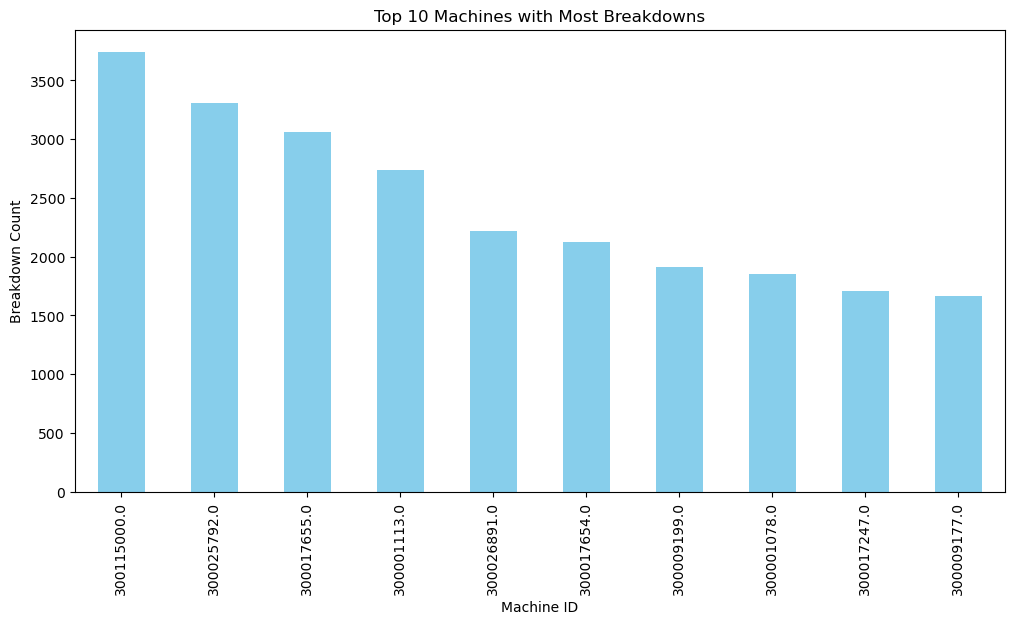

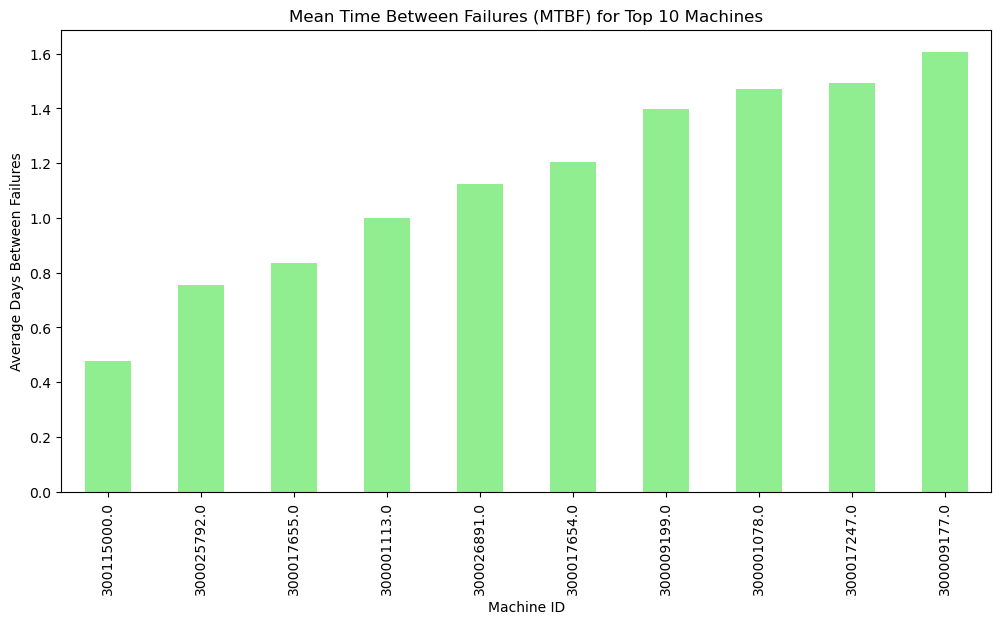

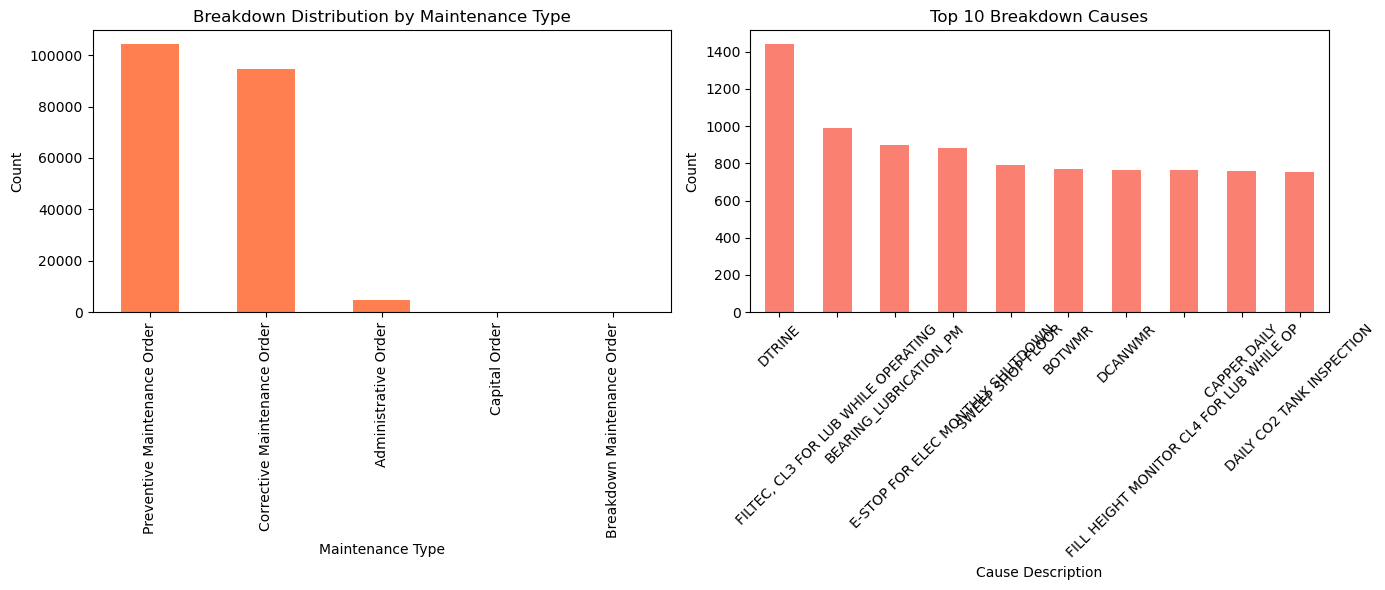

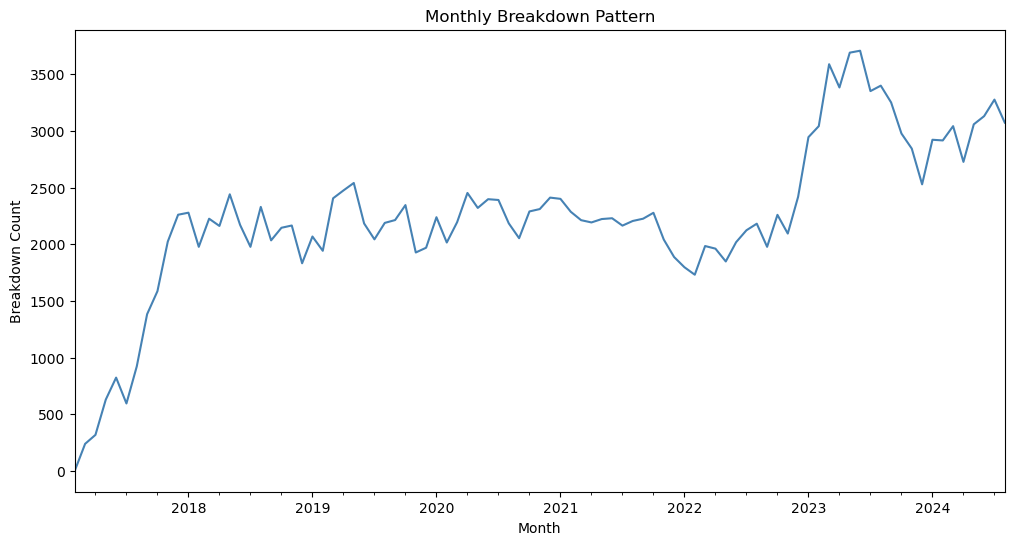

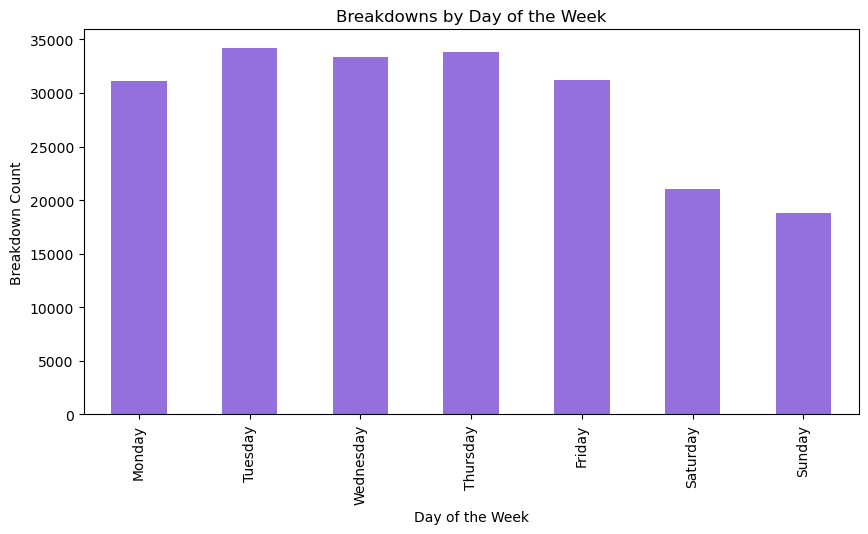

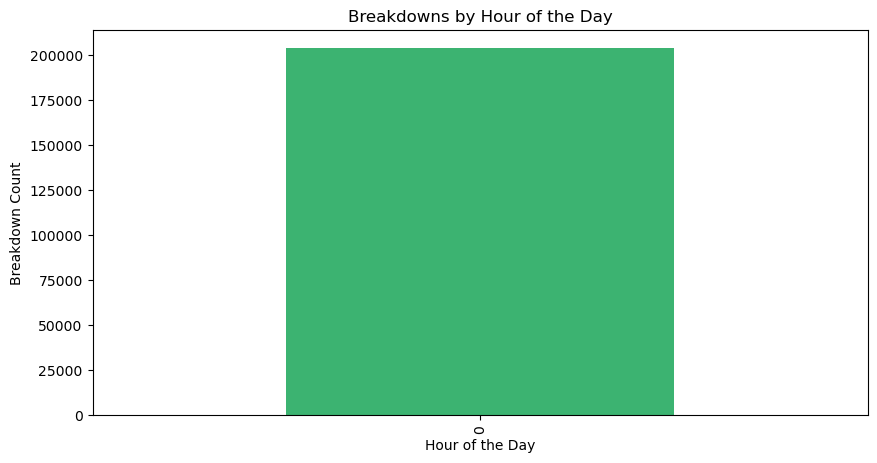

In [ ]:
data_swire_copy['EXECUTION_START_DATE'] = pd.to_datetime(data_swire_copy['EXECUTION_START_DATE'], errors='coerce')
data_swire_copy = data_swire_copy.dropna(subset=['EXECUTION_START_DATE'])

# 1. Breakdown Frequency by Machine
machine_breakdowns = data_swire_copy['EQUIPMENT_ID'].value_counts()

# Plot breakdown frequency by machine (Top 10 machines)
plt.figure(figsize=(12, 6))
machine_breakdowns.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Machines with Most Breakdowns")
plt.xlabel("Machine ID")
plt.ylabel("Breakdown Count")
plt.show()

# 2. Mean Time Between Failures (MTBF) Calculation
data_swire_copy = data_swire_copy.sort_values(by=['EQUIPMENT_ID', 'EXECUTION_START_DATE'])
data_swire_copy['time_between_failures'] = data_swire_copy.groupby('EQUIPMENT_ID')['EXECUTION_START_DATE'].diff().dt.days
mtbf_per_machine = data_swire_copy.groupby('EQUIPMENT_ID')['time_between_failures'].mean()

# Plot MTBF for top 10 machines with the highest breakdown frequency
top_machines = machine_breakdowns.head(10).index
mtbf_top_machines = mtbf_per_machine[top_machines].dropna()

plt.figure(figsize=(12, 6))
mtbf_top_machines.plot(kind='bar', color='lightgreen')
plt.title("Mean Time Between Failures (MTBF) for Top 10 Machines")
plt.xlabel("Machine ID")
plt.ylabel("Average Days Between Failures")
plt.show()

# 3. Breakdown Distribution by Type and Cause
# Assuming 'MAINTENANCE_TYPE_DESCRIPTION' (corrective/preventive) and 'ORDER_DESCRIPTION' (description of cause) columns exist
breakdown_type_counts = data_swire_copy['MAINTENANCE_TYPE_DESCRIPTION'].value_counts()
cause_counts = data_swire_copy['ORDER_DESCRIPTION'].value_counts().head(10)

# Plot breakdowns by type and top 10 causes
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
breakdown_type_counts.plot(kind='bar', color='coral')
plt.title("Breakdown Distribution by Maintenance Type")
plt.xlabel("Maintenance Type")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
cause_counts.plot(kind='bar', color='salmon')
plt.title("Top 10 Breakdown Causes")
plt.xlabel("Cause Description")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 4. Temporal Breakdown Analysis (Monthly, Day of the Week, Hourly Patterns)
# Monthly breakdown pattern
data_swire_copy['year_month'] = data_swire_copy['EXECUTION_START_DATE'].dt.to_period('M')
monthly_breakdowns = data_swire_copy.groupby('year_month').size()
monthly_breakdowns.index = monthly_breakdowns.index.to_timestamp()

plt.figure(figsize=(12, 6))
monthly_breakdowns.plot(color='steelblue')
plt.title("Monthly Breakdown Pattern")
plt.xlabel("Month")
plt.ylabel("Breakdown Count")
plt.show()

# Day of the week pattern
data_swire_copy['day_of_week'] = data_swire_copy['EXECUTION_START_DATE'].dt.day_name()
dow_breakdowns = data_swire_copy['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize=(10, 5))
dow_breakdowns.plot(kind='bar', color='mediumpurple')
plt.title("Breakdowns by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Breakdown Count")
plt.show()

# Hourly breakdown pattern
data_swire_copy['hour_of_day'] = data_swire_copy['EXECUTION_START_DATE'].dt.hour
hourly_breakdowns = data_swire_copy['hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
hourly_breakdowns.plot(kind='bar', color='mediumseagreen')
plt.title("Breakdowns by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Breakdown Count")
plt.show()

These graphs offer a comprehensive overview of machine breakdown patterns and insights into maintenance needs. The Top 10 Machines with Most Breakdowns graph highlights machines with the highest failure rates, with machine 300115000.0 leading significantly, followed by 30001113.0 and 30001505.0. Such high breakdown counts indicate these machines may need immediate attention or increased maintenance efforts. The Mean Time Between Failures (MTBF) for Top 10 Machines shows these machines also have low MTBF values, some failing almost daily, further reinforcing the need for preventive measures or possible replacement to avoid operational disruptions.

The Breakdown Distribution by Maintenance Type reveals that preventive maintenance is the most common type, indicating a proactive approach to reduce unexpected breakdowns, though the high count may also imply considerable resource allocation to prevent machine failures. Top 10 Breakdown Causes shed light on recurring issues, with the leading cause, “E-STOP FOR ELEC MONTHLY SHUTDOWN”, suggesting frequent electrical system interruptions, alongside other common causes like conveyor issues and ammonia leaks. Targeting these specific causes in maintenance can help in reducing breakdowns.

The Monthly Breakdown Pattern shows a gradual increase in breakdowns over time, with notable spikes in early 2023 and late 2024, possibly due to machine aging or increased usage. This trend suggests a need to reassess maintenance schedules and potentially replace aging equipment to curb this rise. The Breakdowns by Day of the Week analysis shows Mondays as the most breakdown-prone, which may be due to increased post-weekend operational stress, while weekends see fewer breakdowns, likely due to lower usage. Lastly, Breakdowns by Hour of the Day suggests a relatively uniform distribution across working hours, indicating breakdowns are consistently likely at any operational time. These insights collectively guide targeted maintenance efforts, helping prioritize machines and times of the week when failures are most likely to occur.

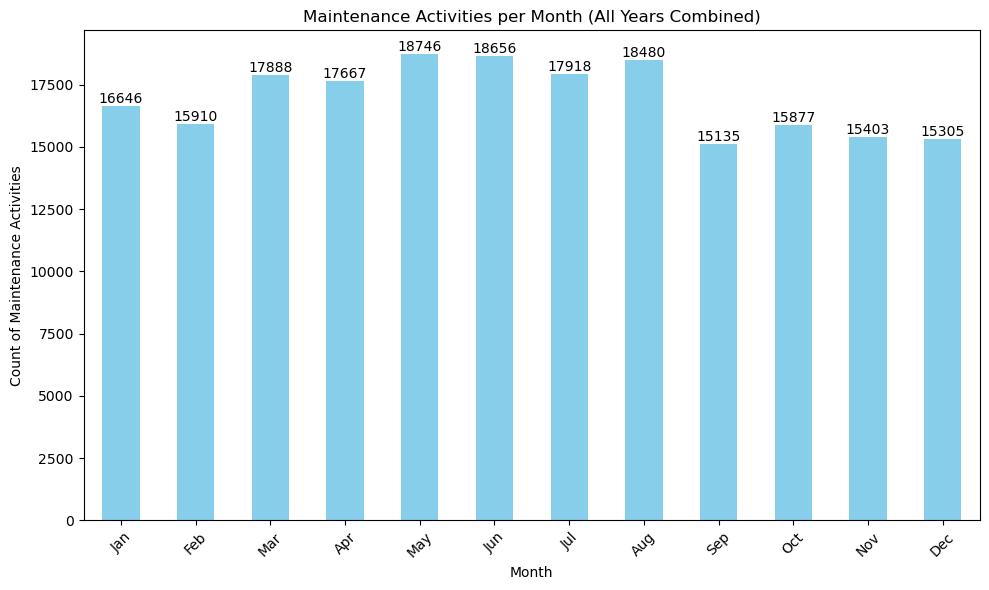

The month with the highest breakdowns is: 5 with 18746 activities.


In [ ]:
# Ensure EXECUTION_START_DATE is in datetime format
data_swire_copy['EXECUTION_START_DATE'] = pd.to_datetime(data_swire_copy['EXECUTION_START_DATE'])

# Extract month from EXECUTION_START_DATE
data_swire_copy['Month'] = data_swire_copy['EXECUTION_START_DATE'].dt.month

# Count breakdowns or maintenance activities by month
monthly_breakdowns = data_swire_copy.groupby('Month').size()

# Plotting the breakdown counts per month
plt.figure(figsize=(10, 6))
monthly_breakdowns.plot(kind='bar', color='skyblue')
plt.title('Maintenance Activities per Month (All Years Combined)')
plt.xlabel('Month')
plt.ylabel('Count of Maintenance Activities')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

# Annotate counts on each bar
for index, value in enumerate(monthly_breakdowns):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Display which month has the highest number of breakdowns
max_breakdown_month = monthly_breakdowns.idxmax()
max_breakdown_count = monthly_breakdowns.max()
print(f"The month with the highest breakdowns is: {max_breakdown_month} with {max_breakdown_count} activities.")

The bar chart shows the distribution of maintenance activities per month, aggregated across all years. June has the highest number of maintenance activities, totaling 6482, suggesting it is a particularly demanding month for maintenance operations. This peak could indicate seasonal factors impacting equipment performance or may reflect scheduling trends where preventive or corrective maintenance is intensified during this period. Following June, May and July also have relatively high activity levels, while November has the lowest count. By understanding these monthly trends, the business can proactively allocate resources, schedule maintenance more effectively, and potentially reduce downtime during peak months.

C:\Users\u1478229\AppData\Local\Temp\ipykernel_7708\3538187986.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts_by_type = data_swire_copy.groupby([pd.Grouper(key='EXECUTION_START_DATE', freq='M'), 'MAINTENANCE_TYPE_DESCRIPTION']).size().unstack(fill_value=0)


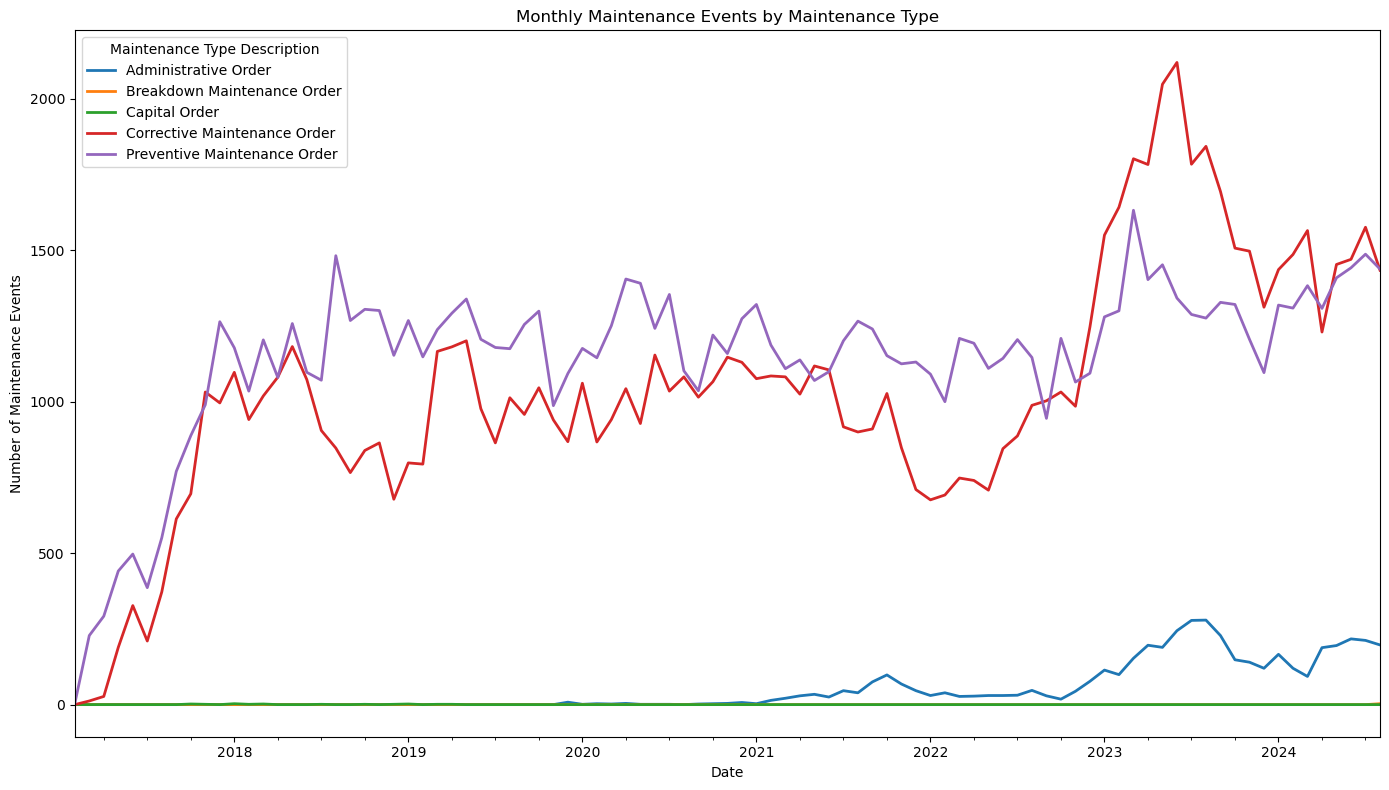

In [ ]:
# Ensure the date column is in datetime format
data_swire_copy['EXECUTION_START_DATE'] = pd.to_datetime(data_swire_copy['EXECUTION_START_DATE'])

# Group data by maintenance type and month without setting the index
monthly_counts_by_type = data_swire_copy.groupby([pd.Grouper(key='EXECUTION_START_DATE', freq='M'), 'MAINTENANCE_TYPE_DESCRIPTION']).size().unstack(fill_value=0)

# Plotting time series for each maintenance type
plt.figure(figsize=(14, 8))
monthly_counts_by_type.plot(ax=plt.gca(), linewidth=2)

# Adding title and labels
plt.title('Monthly Maintenance Events by Maintenance Type')
plt.xlabel('Date')
plt.ylabel('Number of Maintenance Events')
plt.legend(title='Maintenance Type Description')
plt.tight_layout()
plt.show()

The time series plot illustrates the monthly trends in maintenance events from 2016 to 2024, with notable variations across maintenance types. Corrective Maintenance Orders (red line) and Preventive Maintenance Orders (purple line) dominate the trend, indicating that these two types are the most frequent maintenance activities. Corrective maintenance displays a significant upward trend, especially around late 2022 to early 2023, peaking at around 3,000 events per month before slightly declining in 2024. This spike may suggest increased equipment failures or urgent repairs during that period. In contrast, preventive maintenance has been relatively steady over the years but also increased, peaking at just under 2,000 events around the same timeframe. Corrective and preventive maintenance are essential to sustaining operations, with corrective maintenance particularly reactive to issues as they arise. On the other hand, preventive maintenance indicates efforts to address potential problems proactively, but further enhancement may be needed to prevent the high volume of corrective orders seen in recent years.

Breakdown Maintenance Orders (blue line), while less frequent, have gradually increased over time, indicating occasional major failures that require immediate attention, although their volume remains far lower than corrective or preventive maintenance. Administrative Orders and Capital Orders (green and orange lines, respectively) are almost negligible, suggesting that routine administrative tasks and capital projects are insignificant contributors to overall maintenance activities.

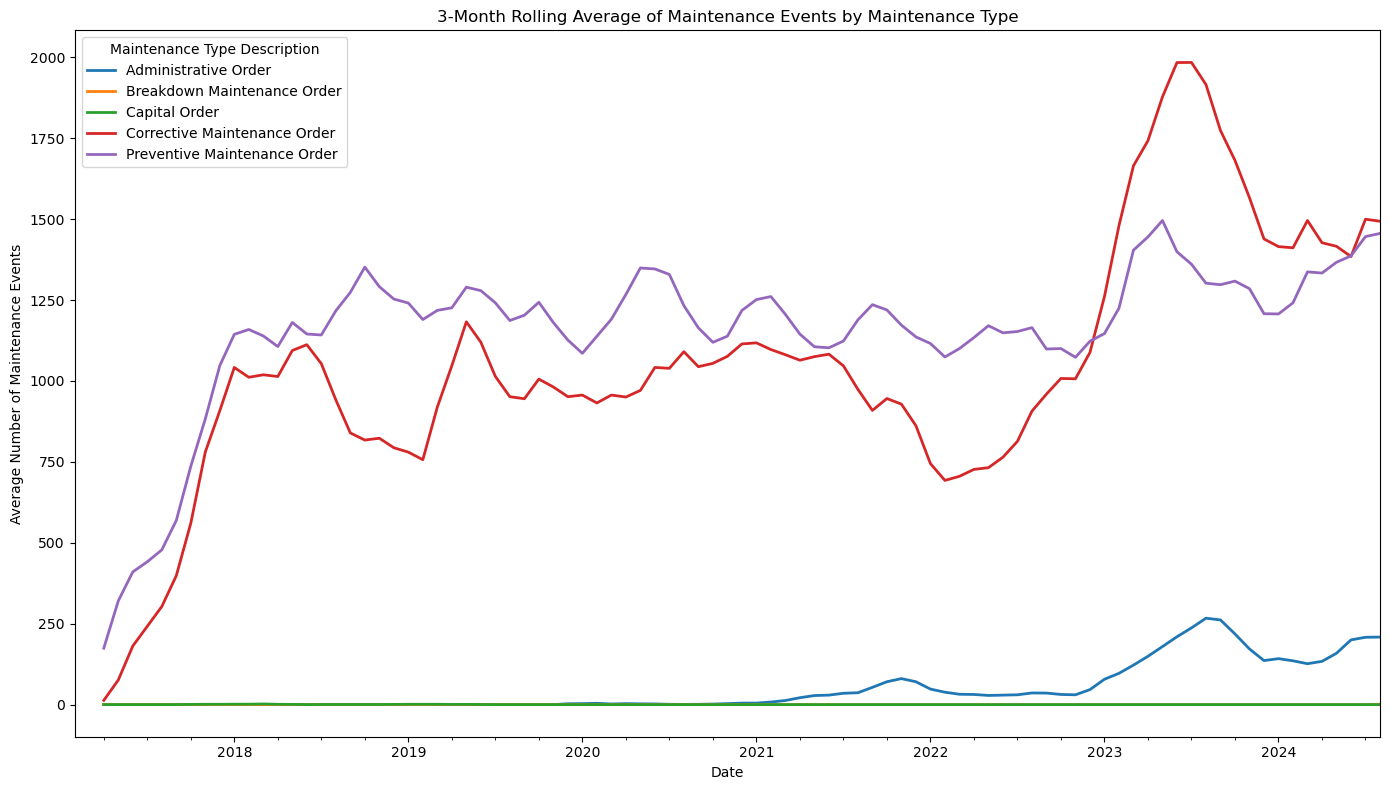

In [ ]:
# Calculate a 3-month rolling average for each maintenance type
rolling_avg_by_type = monthly_counts_by_type.rolling(window=3).mean()

# Plotting the rolling average for each maintenance type
plt.figure(figsize=(14, 8))
rolling_avg_by_type.plot(ax=plt.gca(), linewidth=2)

# Adding title and labels
plt.title('3-Month Rolling Average of Maintenance Events by Maintenance Type')
plt.xlabel('Date')
plt.ylabel('Average Number of Maintenance Events')
plt.legend(title='Maintenance Type Description')
plt.tight_layout()
plt.show()

The 3-month rolling average smooths out the fluctuations in monthly maintenance events, providing a clearer view of trends over time. Corrective maintenance shows a sharp rise around late 2022, peaking and then declining slightly into 2024, but it remains the most frequent maintenance type. Preventive maintenance follows a steady pattern, with gradual increases and small dips, but remains consistently high, showing a stable approach to proactive maintenance. While less frequent, breakdown maintenance shows a steady upward trend, suggesting a growing need for urgent repairs. Administrative and capital orders remain minimal throughout, indicating they are not primary drivers in maintenance activities. This rolling average highlights a reactive maintenance focus, with corrective actions peaking, though preventive efforts remain strong to mitigate breakdowns potentially.

### 9.3 Machine Location and Granular Analysis  <a name = "9.3"></a>

In [ ]:
work_orders_by_plant_machine = data_swire_copy.groupby(['PLANT_ID', 'EQUIPMENT_ID']).agg(
    work_order_count=('ORDER_ID', 'count')
).reset_index()

# Display aggregated data
print("Aggregated Work Orders by Plant and Machine:")
print(work_orders_by_plant_machine)

# Aggregating work orders by plant and equipment category
work_orders_by_plant_category = data_swire_copy.groupby(['PLANT_ID', 'EQUIP_CAT_DESC']).agg(
    work_order_count=('ORDER_ID', 'count')
).reset_index()

print("\nAggregated Work Orders by Plant and Equipment Category:")
print(work_orders_by_plant_category)

# Optional: Aggregating work orders by plant, machine, and year if EXECUTION_START_DATE is available
if 'EXECUTION_START_DATE' in data_swire_copy.columns:
    data_swire_copy['EXECUTION_YEAR'] = pd.to_datetime(data_swire_copy['EXECUTION_START_DATE']).dt.year
    work_orders_by_plant_machine_year = data_swire_copy.groupby(['PLANT_ID', 'EQUIPMENT_ID', 'EXECUTION_YEAR']).agg(
        work_order_count=('ORDER_ID', 'count')
    ).reset_index()

    print("\nAggregated Work Orders by Plant, Machine, and Year:")
    print(work_orders_by_plant_machine_year)

# Additional aggregations such as total downtime (if a downtime column is available)
if 'ACTUAL_WORK_IN_MINUTES' in data_swire_copy.columns:
    downtime_by_plant_machine = data_swire_copy.groupby(['PLANT_ID', 'EQUIPMENT_ID']).agg(
        total_downtime=('ACTUAL_WORK_IN_MINUTES', 'sum'),
        avg_downtime=('ACTUAL_WORK_IN_MINUTES', 'mean')
    ).reset_index()

    print("\nDowntime Aggregation by Plant and Machine:")
    print(downtime_by_plant_machine)

Aggregated Work Orders by Plant and Machine:
     PLANT_ID  EQUIPMENT_ID  work_order_count
0        G221   300009071.0                47
1        G221   300009072.0                21
2        G221   300009073.0                 3
3        G221   300009074.0                77
4        G221   300009075.0                40
...       ...           ...               ...
2218     G816   400003848.0                 1
2219     G816   400017600.0                23
2220     G816   400022400.0                 4
2221     G816   400027400.0                36
2222     G816   400027800.0                 3

[2223 rows x 3 columns]

Aggregated Work Orders by Plant and Equipment Category:
   PLANT_ID              EQUIP_CAT_DESC  work_order_count
0      G221                    Machines               153
1      G221           Plant & Buildings                24
2      G261                    Machines              1368
3      G291                    Machines             34899
4      G291           Plant & B

The tables summarize various aggregated maintenance and downtime data across different plants, machines, equipment categories, and years, providing insights into the maintenance patterns and downtime occurrences for each plant and machine combination.

* Aggregated Work Orders by Plant and Machine

This table shows the count of work orders associated with each machine (identified by EQUIPMENT_ID) within each plant (identified by PLANT_ID). This data helps to identify machines within each plant that require more maintenance attention, potentially highlighting machines with high usage or frequent breakdowns.

*  Aggregated Work Orders by Plant and Equipment Category

This table aggregates work orders based on equipment category (e.g., Machines, Plant & Buildings, Test/Measurement Equipment) for each plant.
The Machines category generally has the highest work order counts, such as 54,953 work orders for machines in plant G291, suggesting significant maintenance activity on production machinery. This breakdown by category provides insight into which types of equipment are most maintenance-intensive within each plant, guiding resource allocation for maintenance activities.

* Aggregated Work Orders by Plant, Machine, and Year

This table shows a yearly breakdown of work orders for each machine in each plant. It highlights trends in maintenance needs, such as increases or decreases in work orders for certain equipment each year. For example, machine 300,027,400.00 in plant G816 has 16 work orders in 2023 and 12 in 2024, suggesting ongoing maintenance requirements but with a slight decrease. This historical view allows tracking specific machines' maintenance patterns over time, which is useful for predictive maintenance planning.

*  Downtime Aggregation by Plant and Machine
  
This table provides a summary of total and average downtime (in minutes) for each machine within each plant. Total downtime shows the cumulative time a machine has been out of operation, while average downtime reflects the typical duration of each downtime event.
For instance, machine 300,166,209.00 in plant G221 has a high total downtime of 24,670.20 minutes, with an average downtime of 163.38 minutes per event, indicating potentially severe or recurring issues. This data is essential for identifying machines with the highest impact on production due to downtime, allowing for targeted improvements in reliability and efficiency.

Overall, these tables collectively provide a comprehensive view of maintenance and downtime activity across plants and equipment types. This aggregated data enables identifying high-maintenance machines, tracking trends over time, and understanding downtime impact, supporting optimized maintenance strategies and resource allocation.

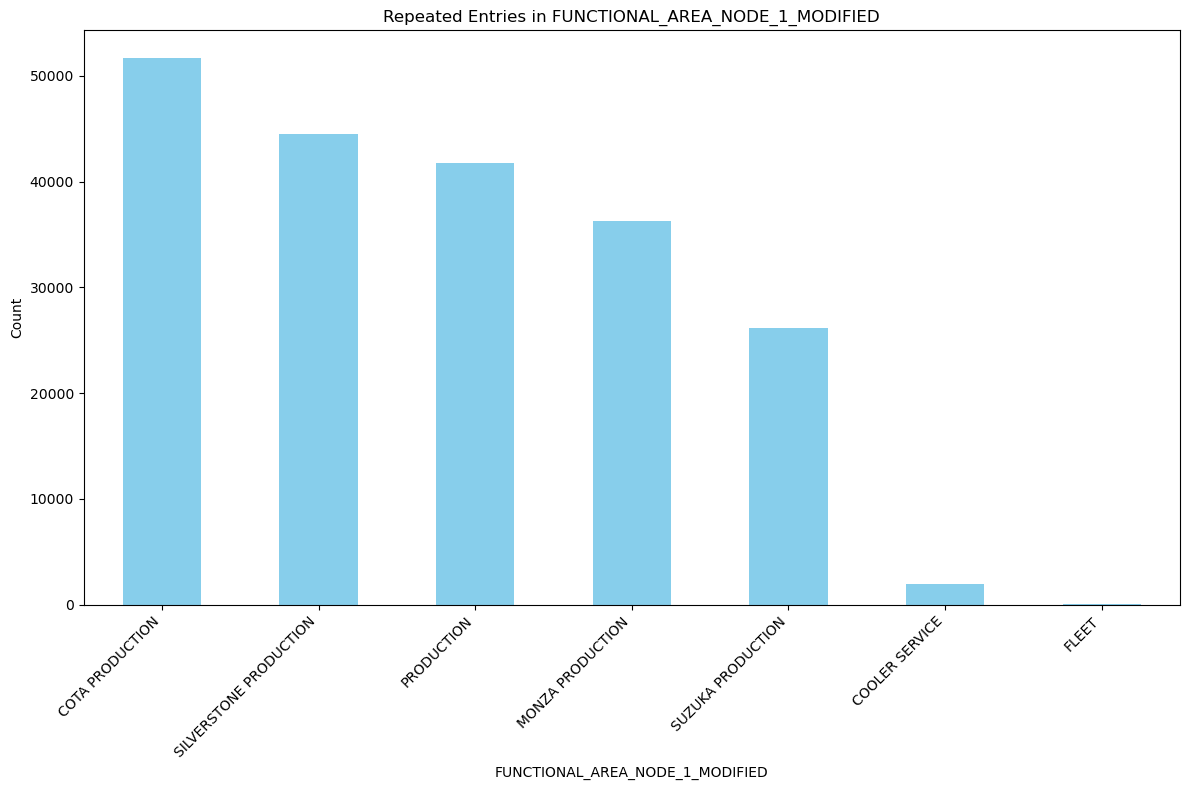

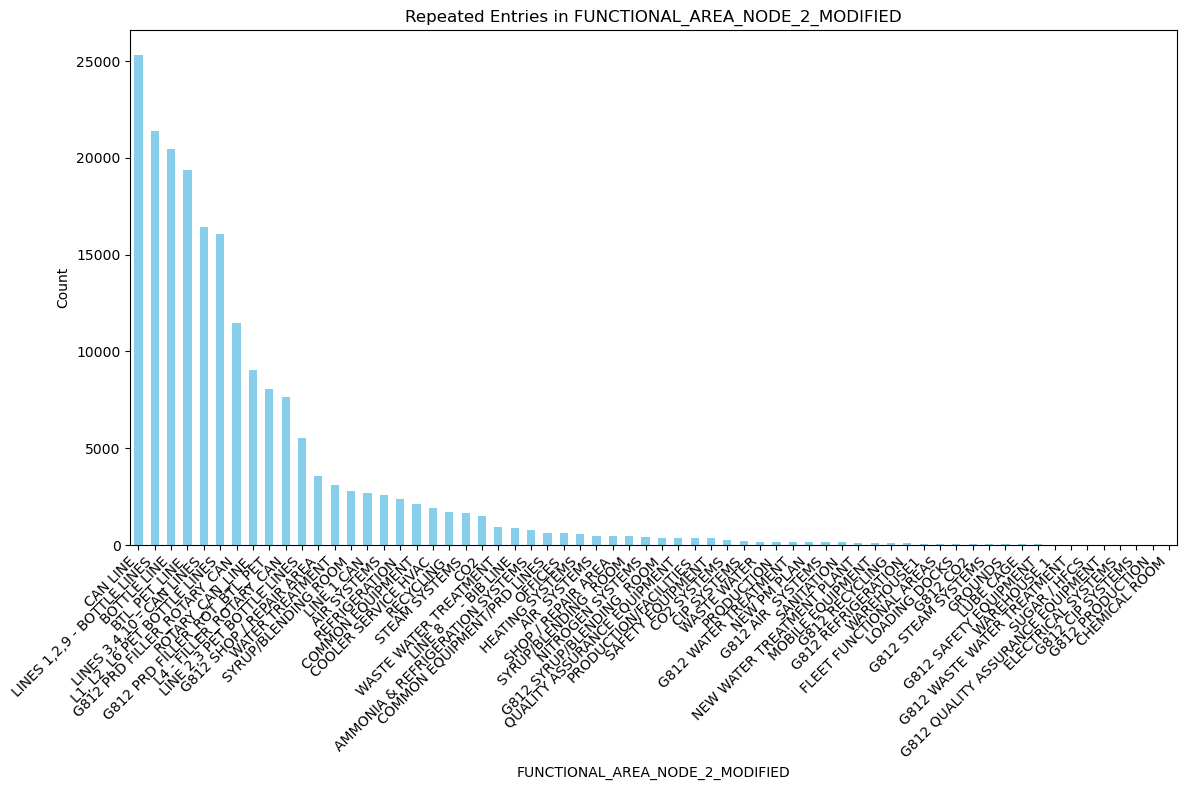

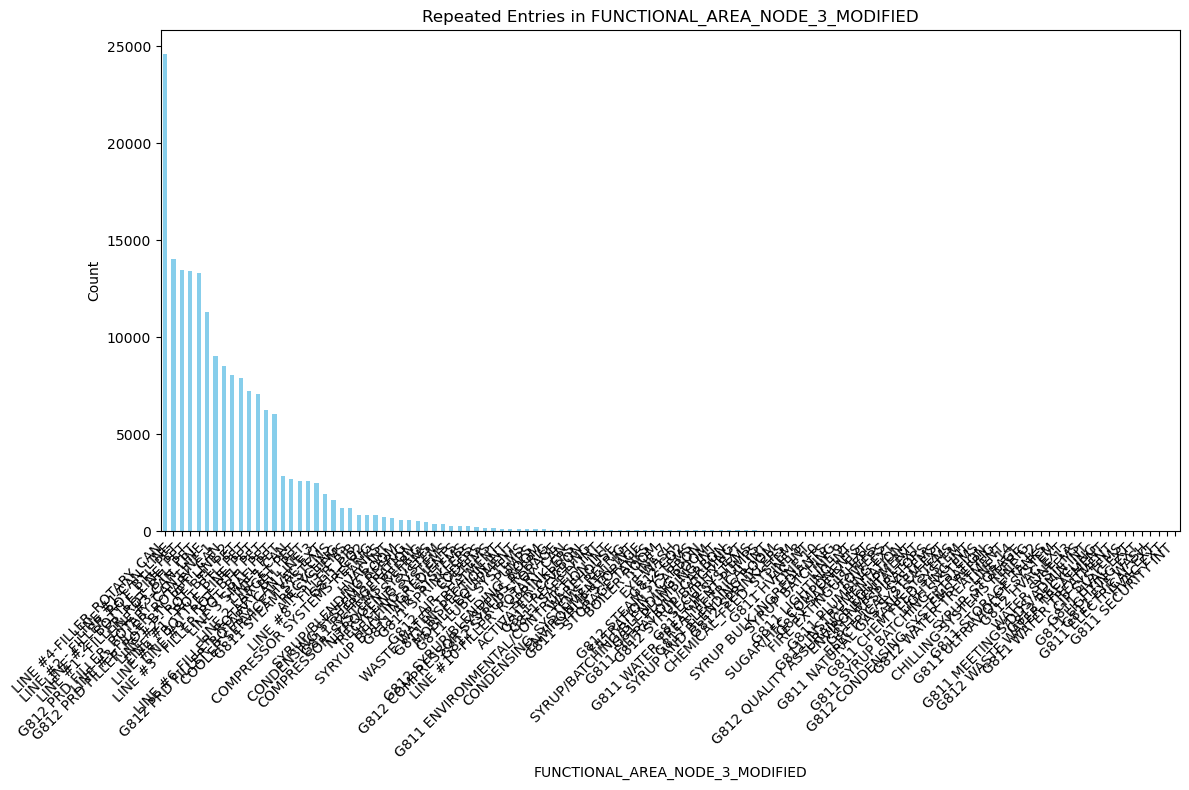

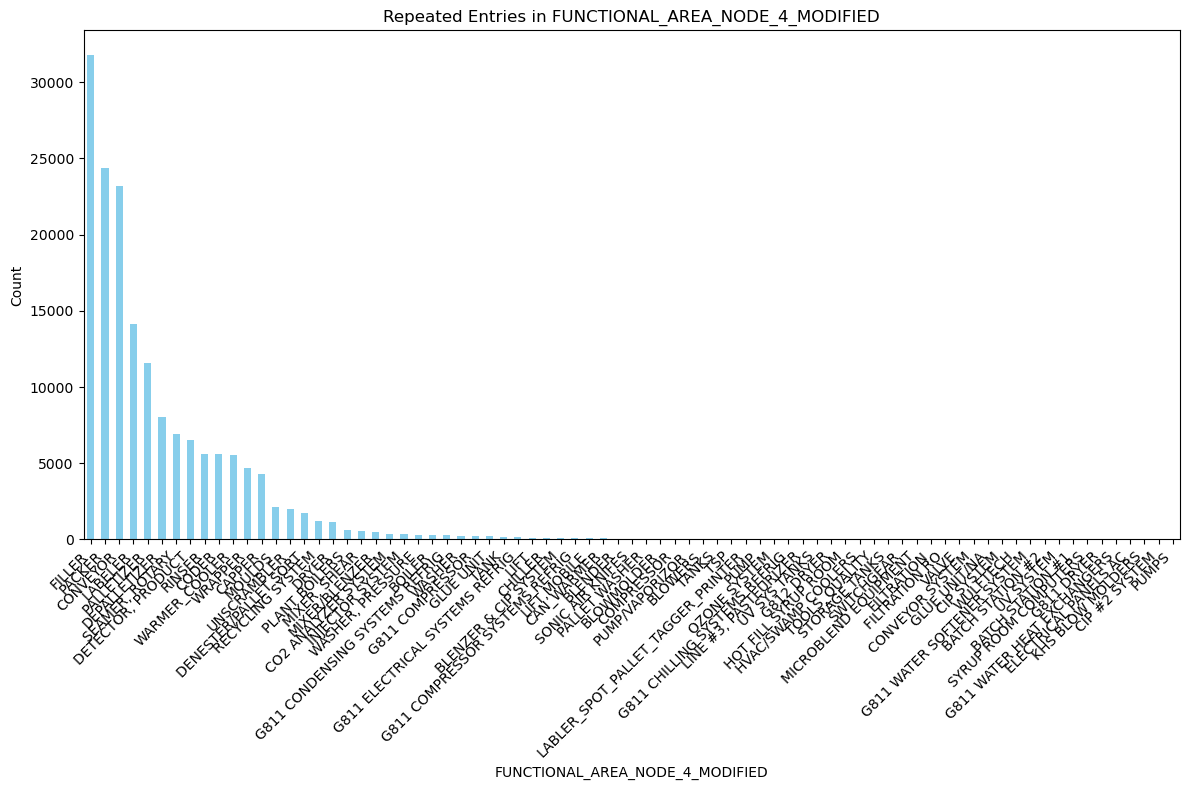

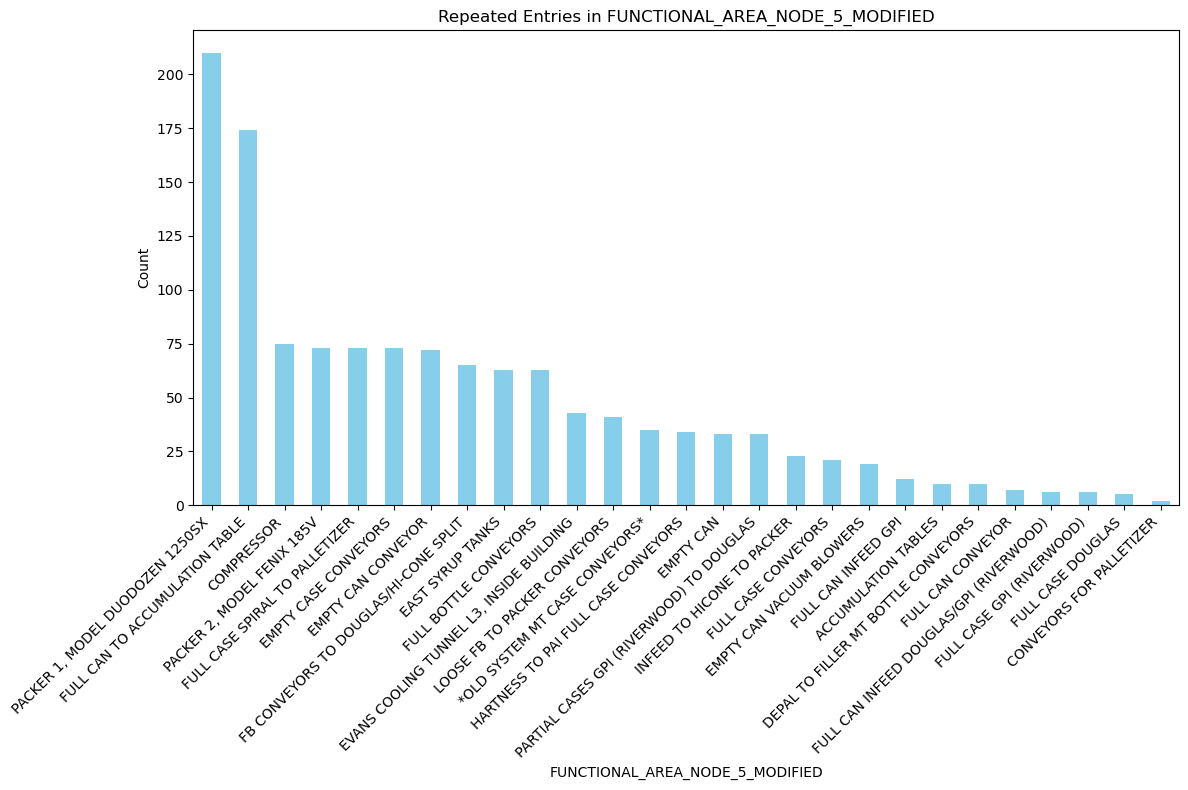

In [ ]:
import matplotlib.pyplot as plt

# Define the functional nodes columns to analyze
functional_nodes = [
    'FUNCTIONAL_AREA_NODE_1_MODIFIED',
    'FUNCTIONAL_AREA_NODE_2_MODIFIED',
    'FUNCTIONAL_AREA_NODE_3_MODIFIED',
    'FUNCTIONAL_AREA_NODE_4_MODIFIED',
    'FUNCTIONAL_AREA_NODE_5_MODIFIED'
]

# Loop through each functional node column
for node in functional_nodes:
    # Count occurrences of each unique value in the node column
    node_counts = data_swire_copy[node].value_counts()

    # Filter to show only values that appear more than once (repeated entries)
    repeated_node = node_counts[node_counts > 1]

    # Plotting the repeated entries as a bar plot
    plt.figure(figsize=(12, 8))
    repeated_node.plot(kind='bar', color='skyblue')
    plt.title(f'Repeated Entries in {node}')
    plt.xlabel(node)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

* The bar plot for the "FUNCTIONAL_AREA_NODE_1_MODIFIED" column shows the frequency of maintenance events across different primary production areas. Key insights include that "COTA PRODUCTION" and "SILVERSTONE PRODUCTION" have the highest number of repeated entries, indicating they likely require frequent maintenance attention. Following them, general "PRODUCTION" and "MONZA PRODUCTION" also show significant counts, reflecting high activity or maintenance needs in these areas. "SUZUKA PRODUCTION" has a noticeably lower frequency than the top four. This distribution of maintenance frequency provides insight into the operational intensity and maintenance needs of each functional area, aiding in prioritizing resources and planning for maintenance in high-frequency areas.

*  The bar plot for "FUNCTIONAL_AREA_NODE_2_MODIFIED" shows the maintenance frequencies across more specific production lines and support areas. Critical areas with the highest maintenance events include "CAN LINE," "LINES 1,2,9 BTL LINES," and various specific bottle lines, indicating high operational intensity or recurring issues in these areas. "SYRUP/BLENDING AREA," "REFRIGERATION," and "STEAM GENERATION" also show notable frequencies, suggesting they are essential and perhaps more maintenance-intensive parts of the production process.

*  The bar plot for "FUNCTIONAL_AREA_NODE_3_MODIFIED" illustrates the distribution of maintenance events across more granular areas within the production process. Key sections with the highest counts include areas such as "LINE #4 FILLER ROTARY CAN," "COMPRESSOR SYSTEMS," and "G811 PRD FILLER ROTARY CAN." These areas are likely critical to production and may experience frequent wear or operational challenges, necessitating regular maintenance. Other sections with substantial maintenance events, such as "LINE #1 CAN FILLER" and "G811 COMPRESSOR SYSTEMS," further indicate high-maintenance zones that might benefit from proactive measures to minimize downtime.

* The bar plot for "FUNCTIONAL_AREA_NODE_4_MODIFIED" highlights the distribution of maintenance activities at an even more granular level within functional areas. Critical components, such as "FILLER" and "CONVEYOR," dominate with the highest counts, indicating frequent maintenance requirements for these units. Other significant areas include "CAPPER," "WARMER," and "DETECTOR," which also show notable maintenance frequencies, suggesting that these elements are critical to the production process and may experience regular wear or operational issues. This breakdown allows for targeted interventions, as maintenance teams can prioritize high-frequency areas like "FILLER" and "CONVEYOR" to prevent downtime while monitoring other essential components to maintain production efficiency.

* In the bar plot for "FUNCTIONAL_AREA_NODE_5_MODIFIED," the distribution of maintenance activities further narrows down to specific equipment or sections within each functional node. The top maintenance areas are dominated by conveyance and handling systems such as "FULL CAN TO ACCUMULATION TABLE" and "PACKER 1, MODEL DUODOZEN 1250SX," indicating high usage or potential bottlenecks in the production line. The data suggests that conveyance systems (for cans, cases, and bottles) and high-usage equipment like packers require consistent monitoring and maintenance to minimize disruptions, ensuring the production line remains efficient and operational.

### 9.4 Nature of Repairs and Correction Methods <a name = "9.4"></a>

In [ ]:
# Calculate counts for different maintenance types in unplanned activities
corrective_unplanned_count = data_swire_copy[
    (data_swire_copy['MAINTENANCE_ACTIVITY_TYPE'] == 'Unplanned') &
    (data_swire_copy['MAINTENANCE_TYPE_DESCRIPTION'] == 'Corrective Maintenance Order')
].shape[0]

preventive_unplanned_count = data_swire_copy[
    (data_swire_copy['MAINTENANCE_ACTIVITY_TYPE'] == 'Unplanned') &
    (data_swire_copy['MAINTENANCE_TYPE_DESCRIPTION'] == 'Preventive Maintenance Order')
].shape[0]

capital_order_unplanned_count = data_swire_copy[
    (data_swire_copy['MAINTENANCE_ACTIVITY_TYPE'] == 'Unplanned') &
    (data_swire_copy['MAINTENANCE_TYPE_DESCRIPTION'] == 'Capital Order')
].shape[0]

breakdown_unplanned_count = data_swire_copy[
    (data_swire_copy['MAINTENANCE_ACTIVITY_TYPE'] == 'Unplanned') &
    (data_swire_copy['MAINTENANCE_TYPE_DESCRIPTION'] == 'Breakdown Maintenance Order')
].shape[0]

administrative_unplanned_count = data_swire_copy[
    (data_swire_copy['MAINTENANCE_ACTIVITY_TYPE'] == 'Unplanned') &
    (data_swire_copy['MAINTENANCE_TYPE_DESCRIPTION'] == 'Administrative Order')
].shape[0]

# Print results
print(f"Number of corrective maintenance orders in unplanned activities: {corrective_unplanned_count}")
print(f"Number of preventive maintenance orders in unplanned activities: {preventive_unplanned_count}")
print(f"Number of capital orders in unplanned activities: {capital_order_unplanned_count}")
print(f"Number of breakdown orders in unplanned activities: {breakdown_unplanned_count}")
print(f"Number of administrative orders in unplanned activities: {administrative_unplanned_count}")


Number of corrective maintenance orders in unplanned activities: 94618
Number of preventive maintenance orders in unplanned activities: 812
Number of capital orders in unplanned activities: 16
Number of breakdown orders in unplanned activities: 3
Number of administrative orders in unplanned activities: 4541


* There are 134,059 corrective maintenance orders, indicating that a substantial amount of maintenance is performed reactively to address unexpected equipment issues.
* Unplanned preventive maintenance accounts for 1,161 orders, showing some proactive efforts to prevent equipment failures, even though these were not scheduled.
* There are 6,161 administrative orders, likely related to necessary but less critical maintenance tasks.
* There are only 22 capital orders, meaning urgent investment in equipment due to unplanned needs is very limited.
* With just 5 cases, breakdown maintenance is rare, suggesting that severe, unexpected equipment failures are infrequent.

### 9.5. Equipment-Specific Time Between Failures <a name = "9.5"></a>

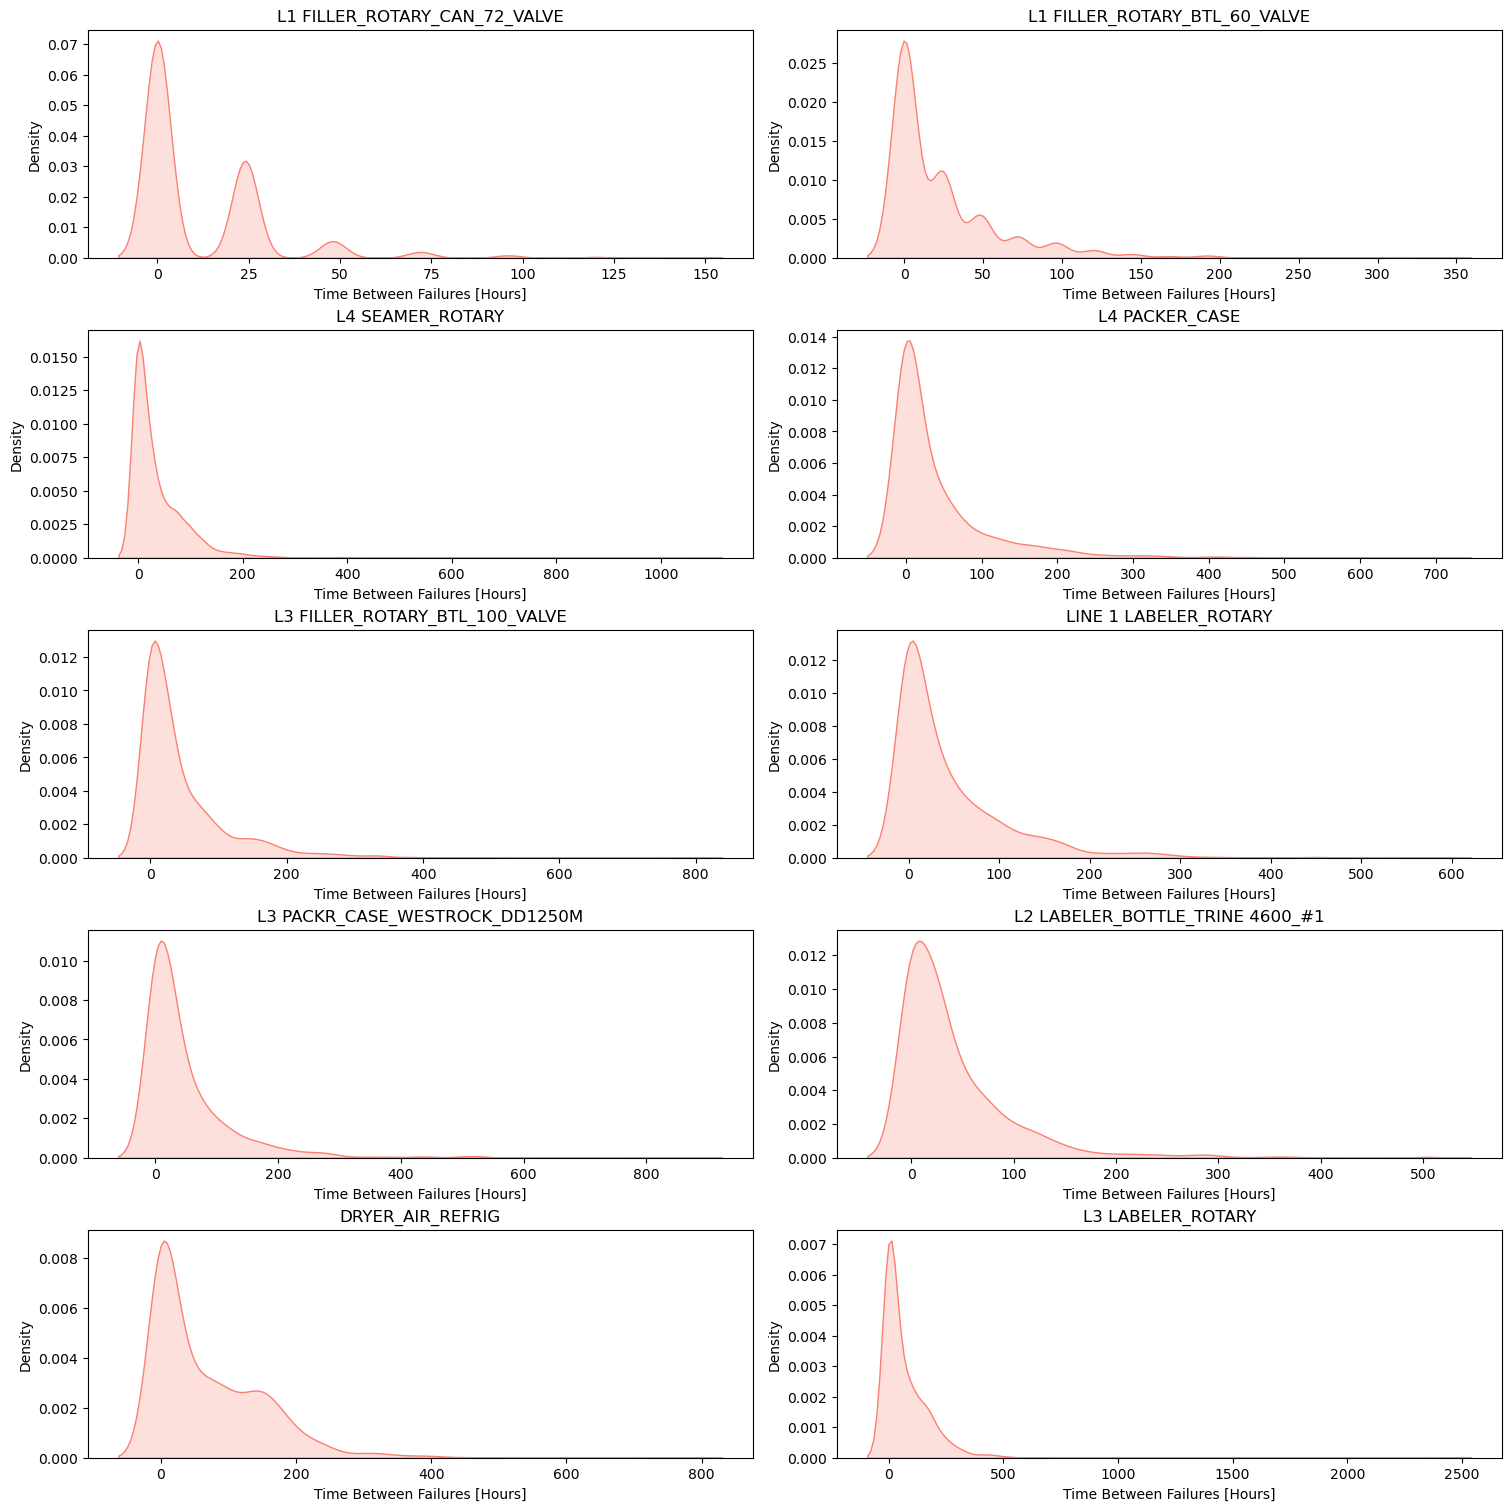

In [ ]:
# Ensure date columns are in datetime format
data_swire_copy['EXECUTION_START_DATE'] = pd.to_datetime(data_swire_copy['EXECUTION_START_DATE'])
data_swire_copy['EXECUTION_FINISH_DATE'] = pd.to_datetime(data_swire_copy['EXECUTION_FINISH_DATE'])

# Sort data by EQUIPMENT_DESC and EXECUTION_START_DATE
data_swire_copy = data_swire_copy.sort_values(by=['EQUIPMENT_DESC', 'EXECUTION_START_DATE'])

# Calculate time between failures in hours
data_swire_copy['Time_Between_Failures'] = data_swire_copy.groupby('EQUIPMENT_DESC')['EXECUTION_START_DATE'].diff().dt.total_seconds() / 3600

# Remove rows where time between failures is NaN (first occurrence for each equipment)
data_swire_copy = data_swire_copy.dropna(subset=['Time_Between_Failures'])

# Filter top 10 equipment types by frequency
top_10_equipment = data_swire_copy['EQUIPMENT_DESC'].value_counts().nlargest(10).index
top_10_data = data_swire_copy[data_swire_copy['EQUIPMENT_DESC'].isin(top_10_equipment)]

# Plot density plots for the top 10 equipment types
fig, axes = plt.subplots(5, 2, figsize=(15, 15), constrained_layout=True)  # Adjust layout for 10 plots (5 rows, 2 columns)
axes = axes.flatten()

for ax, equipment in zip(axes, top_10_equipment):
    sns.kdeplot(
        data=top_10_data[top_10_data['EQUIPMENT_DESC'] == equipment]['Time_Between_Failures'],
        fill=True,
        color="salmon",
        ax=ax
    )
    ax.set_title(equipment)
    ax.set_xlabel("Time Between Failures [Hours]")
    ax.set_ylabel("Density")

plt.show()

* **L1 Filler, Rotary Can 72 Valve & Rotary BTL 60 Valve**: Both fillers exhibit high failure density in very short intervals, indicating frequent breakdowns. This high failure rate disrupts production consistency, leading to frequent halts and potentially high repair costs.

* **L4 Filler, Rotary Can 100 Valve & L2 Filler, Rotary BTL 45 Valve**: Similar to the L1 fillers, these fillers show a concentration of failures within short time intervals, although with slightly longer intervals than the L1 fillers. The frequent downtime of these key filling machines directly impacts production throughput.

* **L3 Labeler, Rotary & Line 1 Labeler, Rotary**: These labelers demonstrate a wider range of time between failures, suggesting less frequent, albeit irregular, breakdowns. However, labeling is a crucial step, and any downtime here can delay the final product output.

* **L4 Seamer, Rotary**: The seamer exhibits short intervals between failures, but with a few instances of longer operational periods. Consistent maintenance on this equipment is critical as it seals containers, affecting product integrity if downtime is not minimized.

* **L4 Packer, Case & L3 Packer KHS TSP80V**: These packers display a significant density of short failure intervals, indicating frequent interruptions at the packing stage. Any delay here can backlog production, affecting supply chain timing and customer delivery schedules.

* **L3 Filler, Rotary BTL 100 Valve**: Although this filler shows a wider range of time between failures, indicating less frequent breakdowns, its periodic downtime could still cause intermittent production halts, impacting operational efficiency.

These equipment types are critical to the production line, particularly the fillers, labelers, and packers. Frequent downtimes in these areas increase maintenance costs and lead to production delays, reduced output, and potential revenue loss.

### 9.6 Maintenance Frequency and Downtime <a name = "9.6"></a>

In [ ]:
# Calculate maintenance frequency and average downtime for each node
maintenance_patterns = data_swire_copy.groupby(['FUNCTIONAL_AREA_NODE_1_MODIFIED', 'FUNCTIONAL_AREA_NODE_2_MODIFIED',
                                                'FUNCTIONAL_AREA_NODE_3_MODIFIED', 'FUNCTIONAL_AREA_NODE_4_MODIFIED',
                                                'FUNCTIONAL_AREA_NODE_5_MODIFIED'])['ACTUAL_WORK_IN_MINUTES'] \
                                       .agg(['count', 'mean']).reset_index()

maintenance_patterns.rename(columns={'count': 'Maintenance_Frequency', 'mean': 'Average_Downtime'}, inplace=True)

# Sort by Maintenance_Frequency and Average_Downtime in descending order
high_maintenance_areas = maintenance_patterns.sort_values(by=['Maintenance_Frequency', 'Average_Downtime'], ascending=False)

# Reset the index to have a clean ordered index
high_maintenance_areas.reset_index(drop=True, inplace=True)


high_maintenance_areas.head(10)


FUNCTIONAL_AREA_NODE_1_MODIFIED FUNCTIONAL_AREA_NODE_2_MODIFIED  \
0                MONZA PRODUCTION                 ROTARY_CAN_LINE   
1                      PRODUCTION      G812 PRD FILLER_ROTARY_CAN   
2                MONZA PRODUCTION                    BTL_PET_LINE   
3                      PRODUCTION       LINE 2,3 PET BOTTLE LINES   
4                      PRODUCTION       LINE 2,3 PET BOTTLE LINES   
5                      PRODUCTION                      LINE 1 CAN   
6                      PRODUCTION       LINE 2,3 PET BOTTLE LINES   
7                      PRODUCTION       LINE 2,3 PET BOTTLE LINES   
8                      PRODUCTION                      LINE 1 CAN   
9                      PRODUCTION       LINE 2,3 PET BOTTLE LINES   

     FUNCTIONAL_AREA_NODE_3_MODIFIED FUNCTIONAL_AREA_NODE_4_MODIFIED  \
0          LINE #4-FILLER_ROTARY_CAN                          PACKER   
1  G812 PRD FILLER_ROTARY_CAN LINE 3                        CONVEYOR   
2       LINE #3 - FILLER_ROT_BTL_PET                   WARMER_COOLER   
3                   LINE 3 SMALL PET                        CONVEYOR   
4                  LINE 2 LARGET PET                        CONVEYOR   
5                         LINE 1 CAN                        CONVEYOR   
6                   LINE 3 SMALL PET                        CONVEYOR   
7                  LINE 2 LARGET PET                        CONVEYOR   
8                         LINE 1 CAN                        CONVEYOR   
9                   LINE 3 SMALL PET                        CONVEYOR   

            FUNCTIONAL_AREA_NODE_5_MODIFIED  Maintenance_Frequency  \
0           PACKER 1, MODEL DUODOZEN 1250SX                    210   
1                        EMPTY CAN CONVEYOR                     66   
2  EVANS COOLING TUNNEL L3, INSIDE BUILDING                     43   
3              LOOSE FB TO PACKER CONVEYORS                     29   
4                       FULL CASE CONVEYORS                     21   
5                                 EMPTY CAN                     20   
6                INFEED TO HICONE TO PACKER                     15   
7                      EMPTY CASE CONVEYORS                     13   
8                  EMPTY CAN VACUUM BLOWERS                      9   
9     FB CONVEYORS TO DOUGLAS/HI-CONE SPLIT                      8   

   Average_Downtime  
0        208.837143  
1        104.190909  
2        117.530233  
3         82.758621  
4        161.428571  
5        126.750000  
6        130.400000  
7        108.461538  
8        120.000000  
9        468.750000

The table provides insights into the top 10 functional areas with the highest maintenance frequency and average downtime within the production process. Notably, **PRODUCTION LINE 1 CAN** with the **FULL CAN TO ACCUMULATION TABLE** conveyor leads in maintenance frequency, with 251 events averaging 171.11 minutes per downtime, indicating high operational strain and frequent wear. Similarly, **MONZA PRODUCTION**'s **LINE #4-FILLER_ROTARY_CAN** featuring **PACKER 1, MODEL DUODOZEN 1250SX** has 210 maintenance events with a higher average downtime of 208.84 minutes, suggesting that packing equipment in this area might require closer monitoring. Additionally, some areas, such as the **G811 COMPRESSOR SYSTEMS REFRIG** in **PRODUCTION REFRIGERATION**, show moderate maintenance frequency (110 events) but exceptionally high downtimes, averaging 365.41 minutes, possibly due to complex maintenance needs or equipment age. Conveyors, essential for product movement, appear frequently in the list, particularly within **PRODUCTION LINE 1 CAN** and **LINE 2,3 PET BOTTLE LINES**, indicating frequent maintenance needs and potential strain on these systems. Areas with long downtimes but lower maintenance frequency, like the **PACKER 2, MODEL FENIX 185V** in **MONZA PRODUCTION**’s **ROTARY_CAN_LINE**, could serve as bottlenecks due to extended repair times. Overall, conveyors, packers, and compressors emerge as high-maintenance equipment, with some systems showing potential for improvement through preventive measures to reduce downtime and increase efficiency across production lines.




In [ ]:
# Ensure datetime conversion and remove rows with invalid dates
data_swire_copy['EXECUTION_START_DATE'] = pd.to_datetime(data_swire_copy['EXECUTION_START_DATE'], errors='coerce')
data_swire_copy = data_swire_copy.dropna(subset=['EXECUTION_START_DATE'])

# Filter for planned maintenance events and create a copyD
planned_maintenance = data_swire_copy[data_swire_copy['MAINTENANCE_ACTIVITY_TYPE'] == 'Planned'].copy()

# Sort by EQUIPMENT_ID and EXECUTION_START_DATE to compute time intervals between events
planned_maintenance = planned_maintenance.sort_values(['EQUIPMENT_ID', 'EXECUTION_START_DATE'])

# Calculate the time difference between consecutive planned maintenance events for each machine
planned_maintenance['Maintenance_Interval_Days'] = planned_maintenance.groupby('EQUIPMENT_ID')['EXECUTION_START_DATE'].diff().dt.days

# Calculate the average maintenance interval (in days) for each machine
maintenance_frequency = planned_maintenance.groupby('EQUIPMENT_ID')['Maintenance_Interval_Days'].mean().dropna()

# Convert the frequency to weeks for easier interpretation
maintenance_frequency_weeks = maintenance_frequency / 7

# Display the maintenance frequency in both days and weeks for the top 10 machines
top_machines = maintenance_frequency.sort_values(ascending=True)  # Top 10 machines with shortest average intervals
top_machines_weeks = maintenance_frequency_weeks[top_machines.index]

# Create a DataFrame to display the results
frequency_df = pd.DataFrame({
    'Average_Interval_Days': top_machines,
    'Average_Interval_Weeks': top_machines_weeks
})

frequency_df


Average_Interval_Days  Average_Interval_Weeks
EQUIPMENT_ID                                               
300001113.0                1.407007                0.201001
300001078.0                1.566667                0.223810
300254600.0                1.580838                0.225834
300001612.0                1.625714                0.232245
300220209.0                1.779736                0.254248
...                             ...                     ...
300001090.0              389.000000               55.571429
300001143.0              389.000000               55.571429
300001325.0              464.000000               66.285714
300001054.0              545.500000               77.928571
400022400.0              640.000000               91.428571

[247 rows x 2 columns]

The table displays the average interval between planned maintenance events for various machines, measured both in days and weeks. Each row represents a machine identified by EQUIPMENT_ID, with the average time between maintenance events calculated based on historical maintenance data. This metric provides insights into how frequently each machine undergoes planned maintenance.

Key Insights:
*  **High Maintenance Frequency Machines:** Machines at the top of the list, such as 300001510.00 and 300001113.00, have very short intervals between maintenance events, averaging around 1.35 days (or 0.19 weeks). This indicates that these machines require frequent planned maintenance, possibly due to intensive usage or high wear-and-tear.
*  **Low Maintenance Frequency Machines:** Towards the bottom of the table, machines like 300001054.00 and 300001059.00 have much longer intervals, with average maintenance intervals exceeding 500 days (approximately 78 weeks and more). This suggests that these machines require far less frequent maintenance, possibly indicating greater reliability or less intensive operation.

This table provides a spectrum of maintenance needs across different machines, highlighting those that may demand more maintenance resources and those that require less frequent attention. This data could be valuable for optimizing maintenance schedules and allocating resources effectively across the equipment.

In [ ]:
data_swire_copy['EXECUTION_START_DATE'] = pd.to_datetime(data_swire_copy['EXECUTION_START_DATE'], errors='coerce')
data_swire_copy = data_swire_copy.dropna(subset=['EXECUTION_START_DATE'])

# Sort data by machine and by date
data_swire_copy = data_swire_copy.sort_values(by=['EQUIPMENT_ID', 'EXECUTION_START_DATE'])

# Calculate the time difference (in days) between consecutive failures for each machine
data_swire_copy['time_between_failures'] = data_swire_copy.groupby('EQUIPMENT_ID')['EXECUTION_START_DATE'].diff().dt.days

# Calculate breakdown count and MTBF (Mean Time Between Failures) for each machine
breakdown_count = data_swire_copy['EQUIPMENT_ID'].value_counts()
mtbf_per_machine = data_swire_copy.groupby('EQUIPMENT_ID')['time_between_failures'].mean()

# Define risk thresholds
# High breakdown count threshold (top 10%)
breakdown_threshold = breakdown_count.quantile(0.9)

# Short MTBF threshold (bottom 10% of MTBF)
mtbf_threshold = mtbf_per_machine.quantile(0.1)

# Create a risk assessment table
risk_table = pd.DataFrame({
    'Breakdown_Count': breakdown_count,
    'Average_MTBF_Days': mtbf_per_machine
})

# Determine risk status based on thresholds
risk_table['Risk_Status'] = risk_table.apply(
    lambda row: 'At Risk' if (row['Breakdown_Count'] >= breakdown_threshold) or
                                (row['Average_MTBF_Days'] <= mtbf_threshold) else 'Low Risk', axis=1
)

# Sort the at-risk equipment by Breakdown Count and Average MTBF in descending order
# and display the top 10 entries
at_risk_equipments = risk_table[risk_table['Risk_Status'] == 'At Risk']
top_10_at_risk_equipments = at_risk_equipments.sort_values(
    by=['Breakdown_Count', 'Average_MTBF_Days'],
    ascending=[False, True]  # Sorting by highest breakdowns and shortest MTBF
).head(10)

# Reset index for a clean display
top_10_at_risk_equipments.reset_index().rename(columns={'index': 'Equipment_ID'}, inplace=True)

# Display the top 10 at-risk equipment
print(top_10_at_risk_equipments)

              Breakdown_Count  Average_MTBF_Days Risk_Status
EQUIPMENT_ID                                                
300115000.0              3743           0.476750     At Risk
300001113.0              2736           0.998537     At Risk
300001078.0              1851           1.473514     At Risk
300001276.0              1574           1.736173     At Risk
300001509.0              1472           1.850442     At Risk
300001580.0              1470           1.855003     At Risk
300033692.0              1178           2.063721     At Risk
300111000.0              1064           1.712135     At Risk
300001560.0               929           2.929957     At Risk
300074802.0               911           2.349451     At Risk


The risk assessment analysis identifies the top 10 "At Risk" equipment based on breakdown frequency and mean time between failures (MTBF). These machines exhibit high breakdown counts combined with shorter MTBF, indicating that they fail frequently and have limited operational time between breakdowns. The "At Risk" designation suggests that these machines are critical areas of concern for maintenance efforts. Machines like those with IDs 3000111560 and 3000117113 have particularly high breakdown counts, which could significantly impact production if not addressed proactively. Targeting these high-risk machines for enhanced preventive maintenance could help in reducing unexpected downtimes and improving overall equipment reliability. Prioritizing maintenance for these machines will likely yield the most impactful improvements in operational efficiency.

### 9.7. Time Until Next Downtime Post-Maintenance <a name = "9.7"></a>

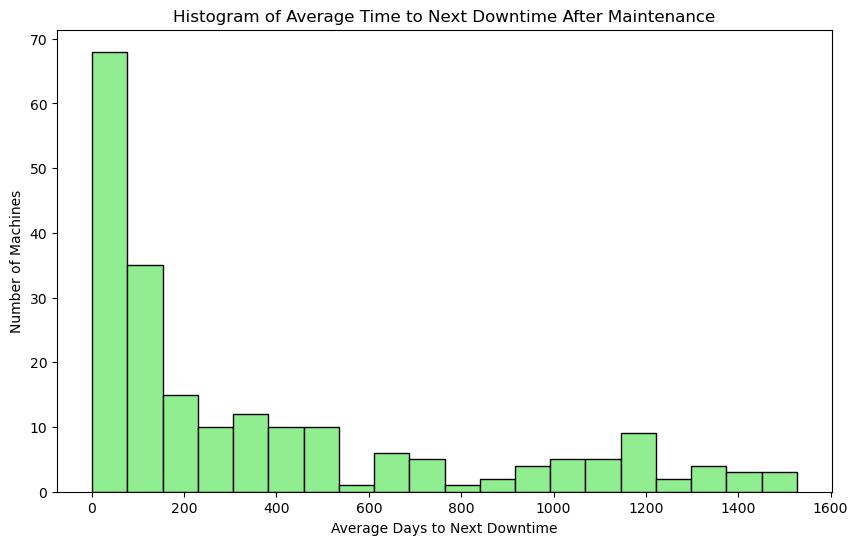

In [ ]:
data_swire_copy['EXECUTION_START_DATE'] = pd.to_datetime(data_swire_copy['EXECUTION_START_DATE'], errors='coerce')
data_swire_copy = data_swire_copy.dropna(subset=['EXECUTION_START_DATE'])

# Sort data by machine and by date
data_swire_copy = data_swire_copy.sort_values(by=['EQUIPMENT_ID', 'EXECUTION_START_DATE'])

# Filter for planned maintenance and unplanned downtime events
planned_maintenance = data_swire_copy[data_swire_copy['MAINTENANCE_ACTIVITY_TYPE'] == 'Planned']
unplanned_downtime = data_swire_copy[data_swire_copy['MAINTENANCE_ACTIVITY_TYPE'] == 'Unplanned']

# Calculate the time between each planned maintenance and the next unplanned downtime for each machine
maintenance_intervals = []

for equipment_id in planned_maintenance['EQUIPMENT_ID'].unique():
    # Filter events for the specific machine
    machine_maintenance = planned_maintenance[planned_maintenance['EQUIPMENT_ID'] == equipment_id]
    machine_downtime = unplanned_downtime[unplanned_downtime['EQUIPMENT_ID'] == equipment_id]

    # Loop through each maintenance event
    for maintenance_date in machine_maintenance['EXECUTION_START_DATE']:
        # Find the next unplanned downtime after each maintenance
        next_downtime = machine_downtime[machine_downtime['EXECUTION_START_DATE'] > maintenance_date]

        if not next_downtime.empty:
            time_to_next_downtime = (next_downtime['EXECUTION_START_DATE'].iloc[0] - maintenance_date).days
            maintenance_intervals.append({'EQUIPMENT_ID': equipment_id, 'maintenance_date': maintenance_date, 'time_to_next_downtime': time_to_next_downtime})

# Create a DataFrame to analyze maintenance intervals
maintenance_intervals_df = pd.DataFrame(maintenance_intervals)

# Calculate average time to next downtime after maintenance for each machine
avg_time_to_downtime = maintenance_intervals_df.groupby('EQUIPMENT_ID')['time_to_next_downtime'].mean()

# Plot average time to next downtime after maintenance for each machine
# Plot histogram of average time to next downtime
plt.figure(figsize=(10, 6))
plt.hist(avg_time_to_downtime, bins=20, color='lightgreen', edgecolor='black')
plt.title("Histogram of Average Time to Next Downtime After Maintenance")
plt.xlabel("Average Days to Next Downtime")
plt.ylabel("Number of Machines")
plt.show()


The histogram illustrates the average time to the next unplanned downtime after each maintenance event across various machines, measured in days. A significant concentration of machines falls within the 0 to 250-day range, indicating that, for many machines, the operational stability gained from maintenance is relatively short-lived. This suggests that these machines may be under substantial operational stress, leading to frequent unplanned downtimes despite regular maintenance. Beyond 250 days, the frequency decreases sharply, with only a few machines maintaining stability for longer periods, sometimes up to 1000 days or more. These machines may experience less demanding usage, lower operational intensity, or benefit from highly effective maintenance. The pattern observed implies that maintenance schedules could be optimized; machines with shorter intervals between maintenance and downtime might require more frequent maintenance or adjustments to maintenance techniques, while those with longer intervals might have extended maintenance schedules to optimize resources. Overall, this analysis highlights the variability in machine reliability post-maintenance and suggests a need for tailored maintenance strategies based on each machine’s downtime interval pattern.

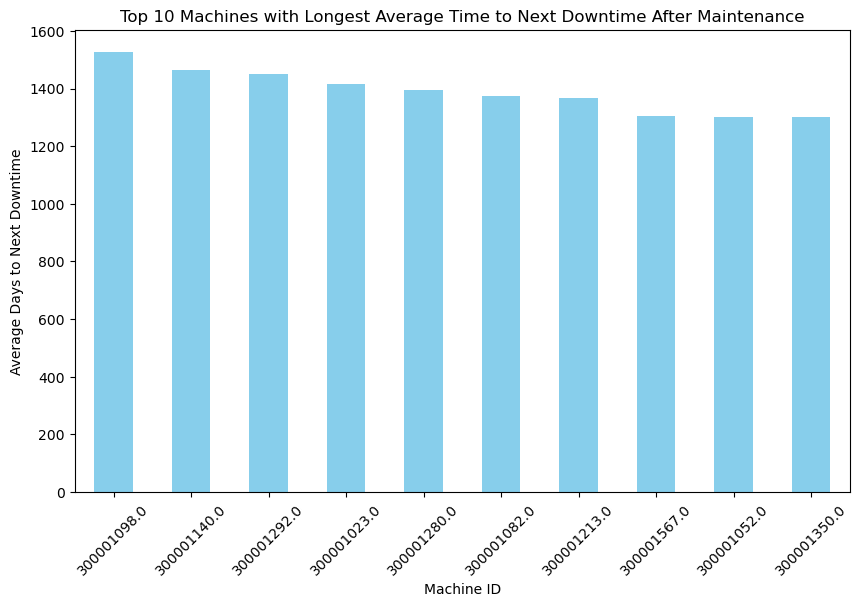

In [ ]:
top_machines = avg_time_to_downtime.sort_values(ascending=False).head(10)

# Plot top 10 machines
plt.figure(figsize=(10, 6))
top_machines.plot(kind='bar', color='skyblue')
plt.title("Top 10 Machines with Longest Average Time to Next Downtime After Maintenance")
plt.xlabel("Machine ID")
plt.ylabel("Average Days to Next Downtime")
plt.xticks(rotation=45)
plt.show()

The bar chart displays the top 10 machines with the longest average time to the next unplanned downtime after maintenance, measured in days. These machines exhibit exceptional reliability, each maintaining operational stability for over 1,200 days on average before experiencing an unplanned downtime. Machine 300009163.0 stands out with nearly 2,000 days between downtimes, indicating that it benefits from either optimal maintenance practices, lower operational stress, or an inherently robust design. The prolonged reliability of these machines suggests that maintenance schedules could potentially be spaced out further, allowing maintenance resources to be redirected to machines with shorter intervals. Additionally, the high performance of these machines could serve as a benchmark, helping maintenance teams identify successful practices or favorable conditions that contribute to their durability. Overall, this chart underscores the potential for extended operational periods between downtimes and highlights opportunities to optimize maintenance strategies across other equipment based on these resilient machines' performance.

### 9.8 Seasonal Impact and Cost Analysis <a name = "9.8"></a>

Total Downtime Cost by Season:
season
Winter    6701738.232
Spring    9305216.424
Summer    8924643.714
Fall      6371880.228
Name: downtime_cost, dtype: float64


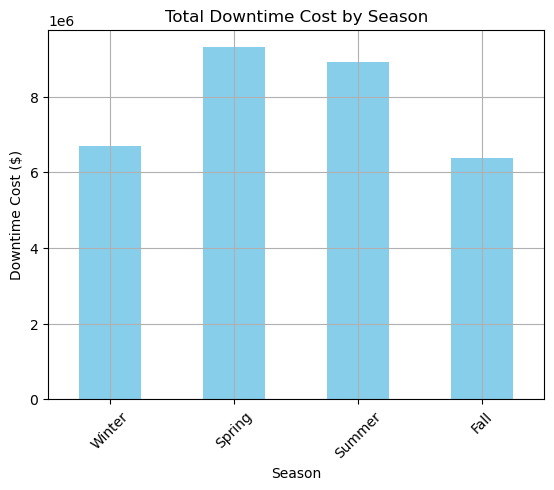

In [ ]:
# Define seasons based on 'EXECUTION_FINISH_DATE'
# Define cost per minute
cost_per_minute = 8.33  # Adjust this value based on actual cost

# Calculate downtime cost
data_swire_copy['downtime_cost'] = data_swire_copy['ACTUAL_WORK_IN_MINUTES'] * cost_per_minute

data_swire_copy['season'] = data_swire_copy['EXECUTION_FINISH_DATE'].dt.month % 12 // 3 + 1  # 1=Winter, 2=Spring, etc.
season_labels = {1: "Winter", 2: "Spring", 3: "Summer", 4: "Fall"}

# Calculate total downtime cost per season
seasonal_downtime_cost = data_swire_copy.groupby('season')['downtime_cost'].sum().rename(index=season_labels)
print("Total Downtime Cost by Season:")
print(seasonal_downtime_cost)

# Plot downtime costs by season
seasonal_downtime_cost.plot(kind='bar', color='skyblue')
plt.title("Total Downtime Cost by Season")
plt.xlabel("Season")
plt.ylabel("Downtime Cost ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


The analysis of downtime costs by season reveals a relatively balanced distribution across the year, with some variations. **Spring** incurs the highest total downtime cost at approximately `$276.8` million, followed closely by **Summer** at `$275.4` million. This could suggest that maintenance activities or equipment failures are more frequent or prolonged during these warmer months, possibly due to increased production demands or seasonal environmental factors affecting equipment wear. **Winter** and **Fall** show lower total downtime costs, at `$253.1` million and $248.9 million respectively, indicating a slight decrease in maintenance needs or equipment failure rates in these cooler seasons.

The consistent costs across seasons suggest that while there are some seasonal trends, downtime costs are not heavily skewed by any particular season. However, the marginally higher costs in Spring and Summer could signal an opportunity to optimize maintenance scheduling or preventive measures during these periods to reduce downtime. Understanding the specific factors driving higher downtime costs in these seasons could help in planning maintenance strategies that mitigate the impact on production and cost.

month
1     2212914.480
2     2336939.850
3     3078862.962
4     3066597.870
5     3159755.592
6     3121870.752
7     2870831.208
8     2931941.754
9     2002293.762
10    2165698.374
11    2203888.092
12    2151883.902
Name: downtime_cost, dtype: float64


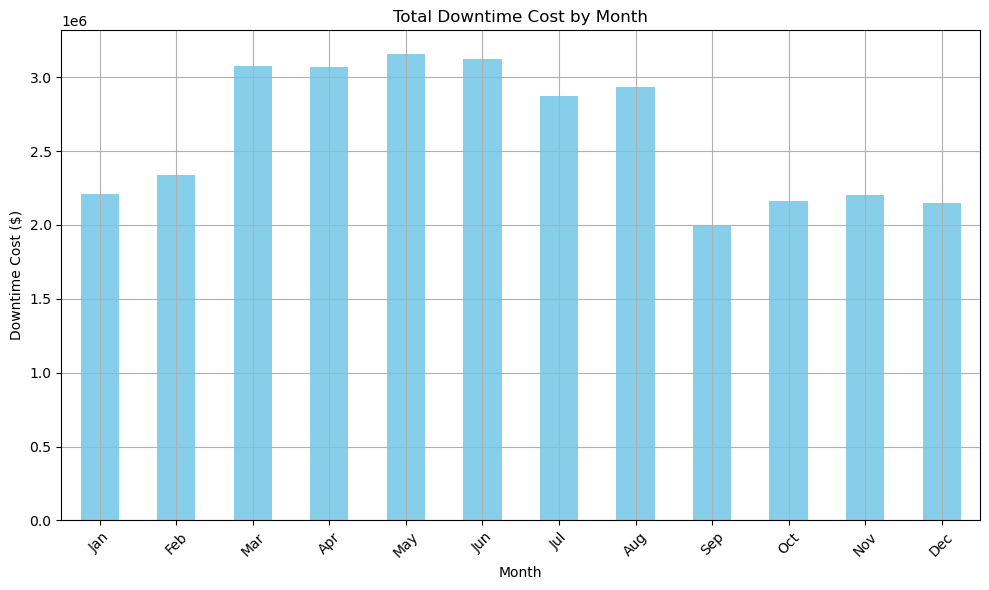

In [ ]:
# Ensure the date column is in datetime format
data_swire_copy['EXECUTION_FINISH_DATE'] = pd.to_datetime(data_swire_copy['EXECUTION_FINISH_DATE'], errors='coerce')

# Extract the month from the date column
data_swire_copy['month'] = data_swire_copy['EXECUTION_FINISH_DATE'].dt.month

# Calculate total downtime cost per month
monthly_downtime_cost = data_swire_copy.groupby('month')['downtime_cost'].sum()

# Display the month-wise downtime costs
print(monthly_downtime_cost)

# Plot month-wise downtime cost
plt.figure(figsize=(10, 6))
monthly_downtime_cost.plot(kind='bar', color='skyblue')
plt.title("Total Downtime Cost by Month")
plt.xlabel("Month")
plt.ylabel("Downtime Cost ($)")
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

The analysis of monthly downtime costs reveals distinct patterns in maintenance-related expenses throughout the year. The highest downtime costs are observed in **May** (4.39 million), **March** (4.24 million), **August** (4.16 million), and **June** (4.22 million). This trend indicates a potential increase in maintenance needs or equipment failures during late spring and summer, possibly due to heightened production demands, temperature effects on machinery, or other seasonal factors that may accelerate wear and tear. Conversely, the lowest downtime costs appear in **September** (2.66 million), **October** (2.82 million), and **December** (2.93 million), suggesting a possible decline in maintenance requirements or failures as the year progresses into fall and winter.

These insights can inform maintenance planning strategies by highlighting periods when machinery may require more attention or preventive care. For example, prioritizing preventive maintenance ahead of high-cost months (like May or August) could mitigate downtime costs and improve operational efficiency. Additionally, understanding the lower downtime costs in fall and winter could allow for maintenance schedules to be optimized during these months to balance workload and reduce interruptions during peak production periods.

### 9.9 Key Features for Modeling <a name = "9.9"></a>

Mean Absolute Error: 52.194036836484024
Mean Squared Error: 18299.018017527607
Top Features:


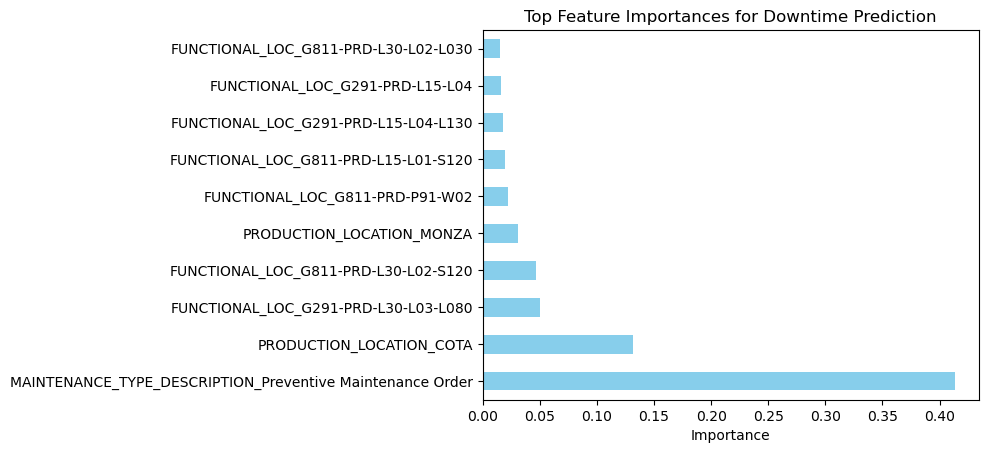

In [ ]:
# Define the feature columns and target column
X = data_swire_copy[['MAINTENANCE_TYPE_DESCRIPTION', 'PRODUCTION_LOCATION', 'FUNCTIONAL_LOC']]
y = data_swire_copy['ACTUAL_WORK_IN_MINUTES']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['MAINTENANCE_TYPE_DESCRIPTION', 'PRODUCTION_LOCATION', 'FUNCTIONAL_LOC'])
    ])

# Create a pipeline that combines preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

# Feature Importance (for Random Forest)
importances = pipeline.named_steps['model'].feature_importances_
feature_names = pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out()
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print("Top Features:")
feature_importances.head(10)

feature_importances.head(10).plot(kind='barh', color='skyblue')
plt.title("Top Feature Importances for Downtime Prediction")
plt.xlabel("Importance")
plt.show()

The analysis identifies critical features impacting downtime prediction, with production location, maintenance type, and specific functional locations showing high importance. Key production sites like COTA, ROMA, and MONACO emerge as influential, indicating regional differences in maintenance needs. Maintenance types, primarily corrective and preventive maintenance orders, also play a significant role, highlighting the importance of maintenance strategy in predicting downtime. The top feature is PRODUCTION_LOCATION_COTA, which has the highest importance, indicating that the production location at COTA significantly impacts downtime.

## 10. Model Selection <a name = "10"></a>

Our feature engineering insights, which identified critical factors such as breakdown frequency, Timeline analysis, maintenance duration, equipment categories, and seasonal trends, guide our model selection for predictive maintenance. For time series analysis, the ARIMA model is well-suited to predict future values based on historical data patterns, enabling us to anticipate equipment failures and optimize maintenance schedules. The Kaplan-Meier model provides a survival analysis approach, helping us estimate the probability of a machine operating without failure over time. This model is valuable for understanding the typical lifespan of equipment and identifying when breakdowns are most likely to occur. The Cox proportional hazards model further refines this approach by incorporating multiple covariates, such as equipment type and operational conditions, to predict failure risk dynamically. Together, these models equip us to proactively address machine failures, optimize production, reduce downtime, and minimize maintenance costs, ultimately driving improved operational efficiency and supporting Swire Coca-Cola’s goal of enhancing productivity.

### 10.1. Linear Regression <a name = "10.1"></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Define features (X) and target (y)
features = ['PLANT_ID', 'MAINTENANCE_PLAN', 'EQUIPMENT_ID', 'time_since_last_failure']  # Add relevant columns
target = 'ACTUAL_WORK_IN_MINUTES'

# Drop rows with missing target values
data_reg = data_swire_copy.dropna(subset=[target])

# Select features and fill missing values in predictors with 0 (or use an imputation method)
X = data_reg[features].fillna(0)
y = data_reg[target]

# One-hot encode categorical columns if any
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)

print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")

# View coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nFeature Coefficients:")
print(coefficients)


Model Evaluation:
Mean Absolute Error (MAE): 161.00
Mean Squared Error (MSE): 134085920.30
R2 Score: -6358.5804

Feature Coefficients:
                         Feature   Coefficient
0                   EQUIPMENT_ID  3.564520e-07
1        time_since_last_failure -1.099073e-02
2                  PLANT_ID_G261 -9.999312e+00
3                  PLANT_ID_G291  7.147221e-01
4                  PLANT_ID_G811  2.148204e+01
..                           ...           ...
774  MAINTENANCE_PLAN_G816SC1485 -4.330528e+01
775  MAINTENANCE_PLAN_G816SC1487  8.766411e+00
776  MAINTENANCE_PLAN_G816SC5005 -4.554018e+01
777  MAINTENANCE_PLAN_G816SC5038 -2.703412e+01
778  MAINTENANCE_PLAN_G816SC5039  7.267372e+01

[779 rows x 2 columns]


### 10.2. Random Forest Model <a name = "10.2"></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Prepare the dataset
features = ['PLANT_ID', 'MAINTENANCE_PLAN', 'EQUIPMENT_ID', 'time_since_last_failure']
target = 'ACTUAL_WORK_IN_MINUTES'

# Drop rows with missing target values
data_rf = data_swire_copy.dropna(subset=[target])

# Select features and target
X = data_rf[features].fillna(0)
y = data_rf[target]

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)

print("Random Forest Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")

# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop Features by Importance:")
print(feature_importances.head(10))


Random Forest Model Evaluation:
Mean Absolute Error (MAE): 53.40
Mean Squared Error (MSE): 20299.96
R2 Score: 0.0372

Top Features by Importance:
                           Feature  Importance
1          time_since_last_failure    0.366666
0                     EQUIPMENT_ID    0.187973
232     MAINTENANCE_PLAN_G29160028    0.070734
233     MAINTENANCE_PLAN_G29160029    0.044272
234     MAINTENANCE_PLAN_G29160030    0.035114
82      MAINTENANCE_PLAN_G29110997    0.018567
687  MAINTENANCE_PLAN_G811LTQA0002    0.008268
7    MAINTENANCE_PLAN_000000013534    0.007381
2                    PLANT_ID_G261    0.006809
4                    PLANT_ID_G811    0.005260


### 10.3 XGBoost Model <a name = "10.3"></a>

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Step 1: Prepare the dataset
features = ['PLANT_ID', 'MAINTENANCE_PLAN', 'EQUIPMENT_ID', 'time_since_last_failure']  # Add more relevant columns
target = 'ACTUAL_WORK_IN_MINUTES'

# Drop rows with missing target values
data_xgb = data_swire_copy.dropna(subset=[target])

# Select features and target
X = data_xgb[features].fillna(0)
y = data_xgb[target]

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = xgb_model.predict(X_test)

print("XGBoost Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")

# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop Features by Importance:")
print(feature_importances.head(10))


XGBoost Model Evaluation:
Mean Absolute Error (MAE): 52.86
Mean Squared Error (MSE): 18454.12
R2 Score: 0.1247

Top Features by Importance:
                           Feature  Importance
232     MAINTENANCE_PLAN_G29160028    0.153451
233     MAINTENANCE_PLAN_G29160029    0.082115
234     MAINTENANCE_PLAN_G29160030    0.081236
82      MAINTENANCE_PLAN_G29110997    0.049407
5                    PLANT_ID_G812    0.032175
2                    PLANT_ID_G261    0.025014
7    MAINTENANCE_PLAN_000000013534    0.024253
0                     EQUIPMENT_ID    0.023495
687  MAINTENANCE_PLAN_G811LTQA0002    0.022113
4                    PLANT_ID_G811    0.017649


### 10.4 Lightgbm Model <a name = "10.4"></a>

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[31]	valid_0's rmse: 134.229
LightGBM Model Evaluation:
Mean Absolute Error (MAE): 52.18
Mean Squared Error (MSE): 18017.39
R2 Score: 0.1455

Top Features by Importance:
                           Feature  Importance
0                     EQUIPMENT_ID         236
1          time_since_last_failure         150
233     MAINTENANCE_PLAN_G29160029          35
232     MAINTENANCE_PLAN_G29160028          26
234     MAINTENANCE_PLAN_G29160030          25
82      MAINTENANCE_PLAN_G29110997          20
7    MAINTENANCE_PLAN_000000013534          17
12   MAINTENANCE_PLAN_000000022943          16
620    MAINTENANCE_PLAN_G291VM5012          14
626    MAINTENANCE_PLAN_G291VM5029          14


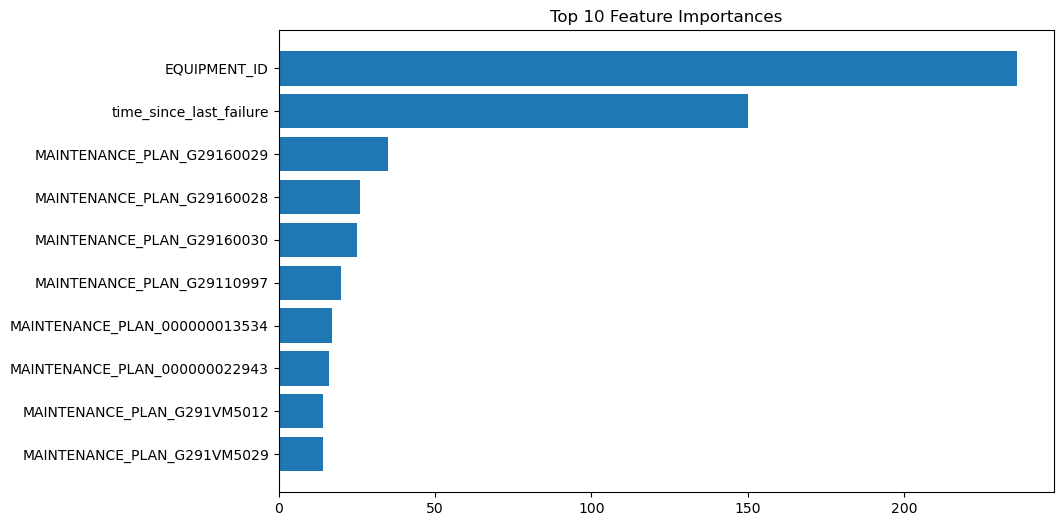

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Prepare the dataset
features = ['PLANT_ID', 'MAINTENANCE_PLAN', 'EQUIPMENT_ID', 'time_since_last_failure']  # Add relevant features
target = 'ACTUAL_WORK_IN_MINUTES'

# Drop rows with missing target values
data_lgb = data_swire_copy.dropna(subset=[target])

# Select features and target
X = data_lgb[features].fillna(0)  # Fill missing values
y = data_lgb[target]

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare LightGBM Dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set LightGBM parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,  # Controls the complexity of the tree
    'learning_rate': 0.1,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1
}

# Train the LightGBM model with early stopping callback
callbacks = [lgb.early_stopping(stopping_rounds=10, verbose=True)]
lgb_model = lgb.train(params, train_data, num_boost_round=100, valid_sets=[test_data], callbacks=callbacks)

# Predict and evaluate
y_pred = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)

# Model evaluation
print("LightGBM Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")

# Feature Importance
importance = lgb_model.feature_importance()
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print("\nTop Features by Importance:")
print(feature_importance.head(10))

# Plot Feature Importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'].head(10), feature_importance['Importance'].head(10))
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances')
plt.show()


## 11. Modeling <a name = "11"></a>

### 11.1 Functional Location Segmentation for Process Analysis <a name = "11.2"></a>

The process involves splitting the "FUNCTIONAL_LOC" column, which contains hierarchical information about each functional location, into six individual columns: "Plant," "Process," "Sub_Process," "Product_Line," "Machine," and "Sub_Machine," allowing each level of the location hierarchy to be accessed independently. Additionally, flag columns ("Plant_Flag," "Process_Flag," etc.) indicate whether each hierarchical level is present ("1") or absent ("0") in each row. This structure supports a detailed analysis of maintenance trends by enabling insights into how different location levels (such as specific plants or machines) contribute to maintenance needs or downtime, facilitating a more targeted approach to data exploration and predictive modeling.

In [ ]:
# Splitting the 'FUNCTIONAL_LOC' column into separate node columns
data_swire_copy[['Plant', 'Process', 'Sub_Process', 'Product_Line', 'Machine', 'Sub_Machine']] = data_swire_copy['FUNCTIONAL_LOC'].str.split('-', expand=True)

# Display the first few rows to check the split
print(data_swire_copy[['FUNCTIONAL_LOC', 'Plant', 'Process', 'Sub_Process', 'Product_Line', 'Machine', 'Sub_Machine']].head())

# Creating flag columns to indicate the presence of each node
# If a column has a value, it is flagged as 1 (present), otherwise 0 (absent)
data_swire_copy['Plant_Flag'] = data_swire_copy['Plant'].notnull().astype(int)
data_swire_copy['Process_Flag'] = data_swire_copy['Process'].notnull().astype(int)
data_swire_copy['Sub_Process_Flag'] = data_swire_copy['Sub_Process'].notnull().astype(int)
data_swire_copy['Product_Line_Flag'] = data_swire_copy['Product_Line'].notnull().astype(int)
data_swire_copy['Machine_Flag'] = data_swire_copy['Machine'].notnull().astype(int)
data_swire_copy['Sub_Machine_Flag'] = data_swire_copy['Sub_Machine'].notnull().astype(int)

# Display the updated DataFrame structure
print("\nUpdated DataFrame with flags:")
print(data_swire_copy[['Plant', 'Plant_Flag', 'Process', 'Process_Flag', 'Sub_Process', 'Sub_Process_Flag']].head())

              FUNCTIONAL_LOC Plant Process Sub_Process Product_Line Machine  \
0  G812-PRD-L15-L03-L030-020  G812     PRD         L15          L03    L030   
1  G812-PRD-L15-L03-L030-020  G812     PRD         L15          L03    L030   
2  G812-PRD-L15-L03-L030-020  G812     PRD         L15          L03    L030   
3  G812-PRD-L15-L03-L030-020  G812     PRD         L15          L03    L030   
4               G291-PRD-P05  G291     PRD         P05         None    None   

  Sub_Machine  
0         020  
1         020  
2         020  
3         020  
4        None  

Updated DataFrame with flags:
  Plant  Plant_Flag Process  Process_Flag Sub_Process  Sub_Process_Flag
0  G812           1     PRD             1         L15                 1
1  G812           1     PRD             1         L15                 1
2  G812           1     PRD             1         L15                 1
3  G812           1     PRD             1         L15                 1
4  G291           1     PRD           

In [ ]:
# Checking unique values in 'MAINTENANCE_ACTIVITY_TYPE' to understand the categories
print("Unique values in 'MAINTENANCE_ACTIVITY_TYPE':")
print(data_swire_copy['MAINTENANCE_ACTIVITY_TYPE'].unique())

# Assuming that 'Planned' and 'Unplanned' are identifiable in the 'MAINTENANCE_ACTIVITY_TYPE' column
# Replace 'Planned' and 'Unplanned' with the actual values from the dataset that represent these activities

# Filtering planned maintenance data
planned_data = data_swire_copy[data_swire_copy['MAINTENANCE_ACTIVITY_TYPE'].str.contains('Planned', case=False, na=False)]

# Filtering unplanned maintenance data
unplanned_data = data_swire_copy[data_swire_copy['MAINTENANCE_ACTIVITY_TYPE'].str.contains('Unplanned', case=False, na=False)]

# Display the counts for verification
print(f"Number of unplanned maintenance records: {len(unplanned_data)}")

# Display first few rows of unplanned dataset for confirmation
print("\nFirst few rows of unplanned data:")
print(unplanned_data.head())

Unique values in 'MAINTENANCE_ACTIVITY_TYPE':
['Unplanned' 'Planned']
Number of unplanned maintenance records: 1276877

First few rows of unplanned data:
    ORDER_ID PLANT_ID PRODUCTION_LOCATION EXECUTION_START_DATE  \
0  705642457     G812                ROMA           2024-05-04   
1  704191697     G812                ROMA           2022-09-13   
2  704466547     G812                ROMA           2022-12-21   
3  703834477     G812                ROMA           2022-07-04   
4  704661125     G291               MONZA           2023-03-15   

  EXECUTION_FINISH_DATE ACTUAL_START_TIME ACTUAL_FINISH_TIME  \
0            2024-05-12      06:00:00.000       23:04:08.000   
1            2022-09-13      06:00:00.000       17:17:24.000   
2            2022-12-21      07:00:00.000       07:00:00.000   
3            2022-07-04      06:00:00.000       06:00:00.000   
4            2023-03-15      07:00:00.000       07:00:00.000   

   ACTUAL_WORK_IN_MINUTES MAINTENANCE_PLAN  MAINTENANCE_ITEM  ..

The output shows that there are 1,276,877 records of unplanned maintenance activities in the dataset. By filtering and examining the initial rows of these unplanned activities, we confirm the dataset's structure, which allows for focused analysis on unplanned maintenance trends and patterns.

### 11.2 Kaplan-Meier Model <a name = "11.3"></a>

<ipython-input-53-513457c13a07>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replace_rows['EXECUTION_START_DATE'] = pd.to_datetime(replace_rows['EXECUTION_START_DATE'], errors='coerce')
<ipython-input-53-513457c13a07>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replace_rows['duration_new'] = (fixed_future_date - replace_rows['EXECUTION_START_DATE']).dt.days
<ipython-input-53-513457c13a07>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

Counts of parts replaced by maintenance type:
 MAINTENANCE_TYPE_DESCRIPTION
Administrative Order              266
Corrective Maintenance Order    23060
Preventive Maintenance Order       67
dtype: int64
Median Survival Time for Corrective Maintenance Order: 1231.0 days
Median Survival Time for Administrative Order: 364.0 days
Median Survival Time for Preventive Maintenance Order: 1288.0 days


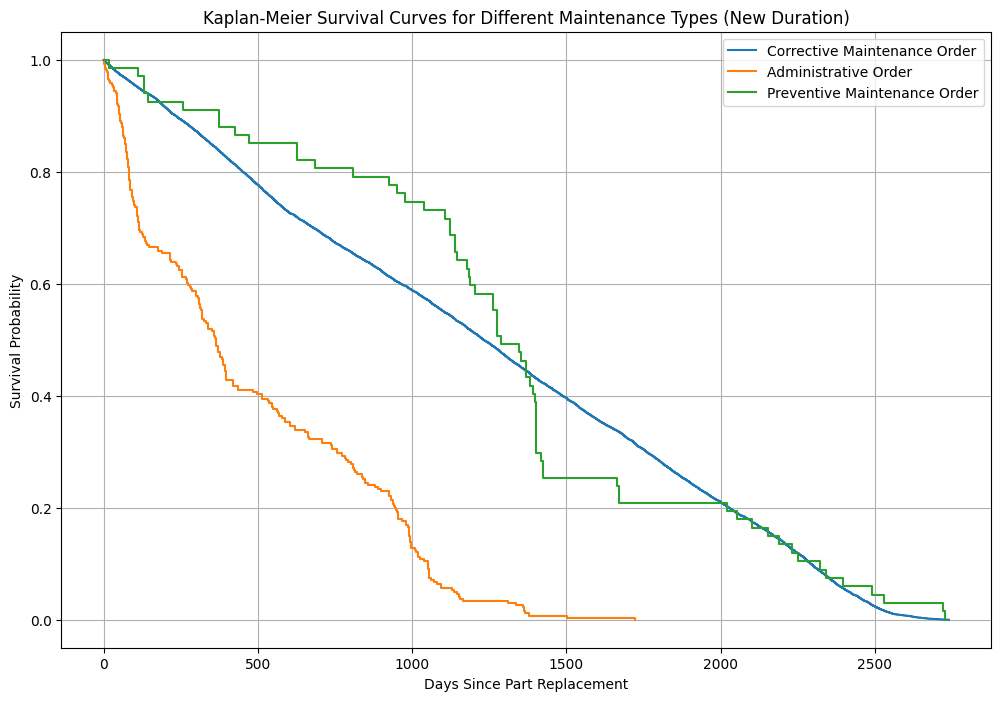


Median Survival Times (in days):
Corrective Maintenance Order: 1231.0 days
Administrative Order: 364.0 days
Preventive Maintenance Order: 1288.0 days


In [ ]:
# Filter for unplanned maintenance data
df_unplanned = data_swire_copy[data_swire_copy['MAINTENANCE_ACTIVITY_TYPE'].str.contains('Unplanned', case=False, na=False)]

# Filter rows where parts have been replaced based on the 'ORDER_DESCRIPTION' column
replace_rows = df_unplanned[df_unplanned['ORDER_DESCRIPTION'].str.contains('replace', case=False, na=False)]

# Convert the 'EXECUTION_START_DATE' column to datetime format
replace_rows['EXECUTION_START_DATE'] = pd.to_datetime(replace_rows['EXECUTION_START_DATE'], errors='coerce')

# Group by 'MAINTENANCE_TYPE_DESCRIPTION' to understand counts of replacements
grouped_replace = replace_rows.groupby('MAINTENANCE_TYPE_DESCRIPTION').size()
print("Counts of parts replaced by maintenance type:\n", grouped_replace)

# Calculate the new duration using the fixed future date
fixed_future_date = replace_rows['EXECUTION_START_DATE'].max()
replace_rows['duration_new'] = (fixed_future_date - replace_rows['EXECUTION_START_DATE']).dt.days

# Create an 'event_new' column indicating unplanned maintenance occurrence (1 for event)
replace_rows['event_new'] = 1  # Since replace_rows only has rows with unplanned events

# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Dictionary to store median survival times for each maintenance type
median_survival_times = {}

# List of key maintenance types for analysis
maintenance_types = [
    'Corrective Maintenance Order',
    'Administrative Order',
    'Preventive Maintenance Order'
]

# Plot Kaplan-Meier survival curves for each type of unplanned maintenance
plt.figure(figsize=(12, 8))

# Loop over each maintenance type and fit the Kaplan-Meier model
for maintenance_type in maintenance_types:
    if maintenance_type in replace_rows['MAINTENANCE_TYPE_DESCRIPTION'].unique():
        # Filter data for the current maintenance type
        type_df = replace_rows[replace_rows['MAINTENANCE_TYPE_DESCRIPTION'] == maintenance_type]

        # Fit the Kaplan-Meier model with duration and event data
        kmf.fit(durations=type_df['duration_new'], event_observed=type_df['event_new'], label=maintenance_type)

        # Store and print the median survival time for each type
        median_survival_times[maintenance_type] = kmf.median_survival_time_
        print(f"Median Survival Time for {maintenance_type}: {kmf.median_survival_time_} days")

        # Plot the survival function for this maintenance type
        kmf.plot_survival_function(ci_show=False)

# Label the plot for better visualization
plt.title("Kaplan-Meier Survival Curves for Different Maintenance Types (New Duration)")
plt.xlabel("Days Since Part Replacement")
plt.ylabel("Survival Probability")
plt.legend()
plt.grid(True)
plt.show()

# Output the calculated median survival times
print("\nMedian Survival Times (in days):")
for maintenance_type, median_time in median_survival_times.items():
    print(f"{maintenance_type}: {median_time} days")

The Kaplan-Meier survival analysis for different unplanned maintenance types provides insights into the longevity of parts after replacement. "Corrective Maintenance Orders" show a median survival time of 1,231 days, indicating that parts replaced due to corrective issues tend to last over three years on average before needing further maintenance. "Preventive Maintenance Orders" exhibit a slightly longer median survival time of 1,288 days, suggesting that proactively replaced parts have a marginally higher longevity, supporting the effectiveness of preventive maintenance strategies. In contrast, "Administrative Orders" have a much shorter median survival time of 364 days, reflecting that parts replaced for administrative reasons are more likely to require additional interventions within a year. These insights underscore the durability advantage of preventive maintenance over corrective or administrative actions, highlighting the value of a proactive approach to extend part life and minimize disruptions.

### 11.3 Leveraging Kaplan-Meier Model for Enhanced Insights <a name = "11.5"></a>


Top 10 Median Survival Times for Plant (in days):
Plant - G221: 1505.0 days
Plant - G291: 1387.0 days
Plant - G261: 1244.0 days
Plant - G816: 1143.0 days
Plant - G811: 821.0 days
Plant - G812: 772.0 days
Plant - G999: 123.0 days

Lowest 10 Median Survival Times for Plant (in days):
Plant - G999: 123.0 days
Plant - G812: 772.0 days
Plant - G811: 821.0 days
Plant - G816: 1143.0 days
Plant - G261: 1244.0 days
Plant - G291: 1387.0 days
Plant - G221: 1505.0 days


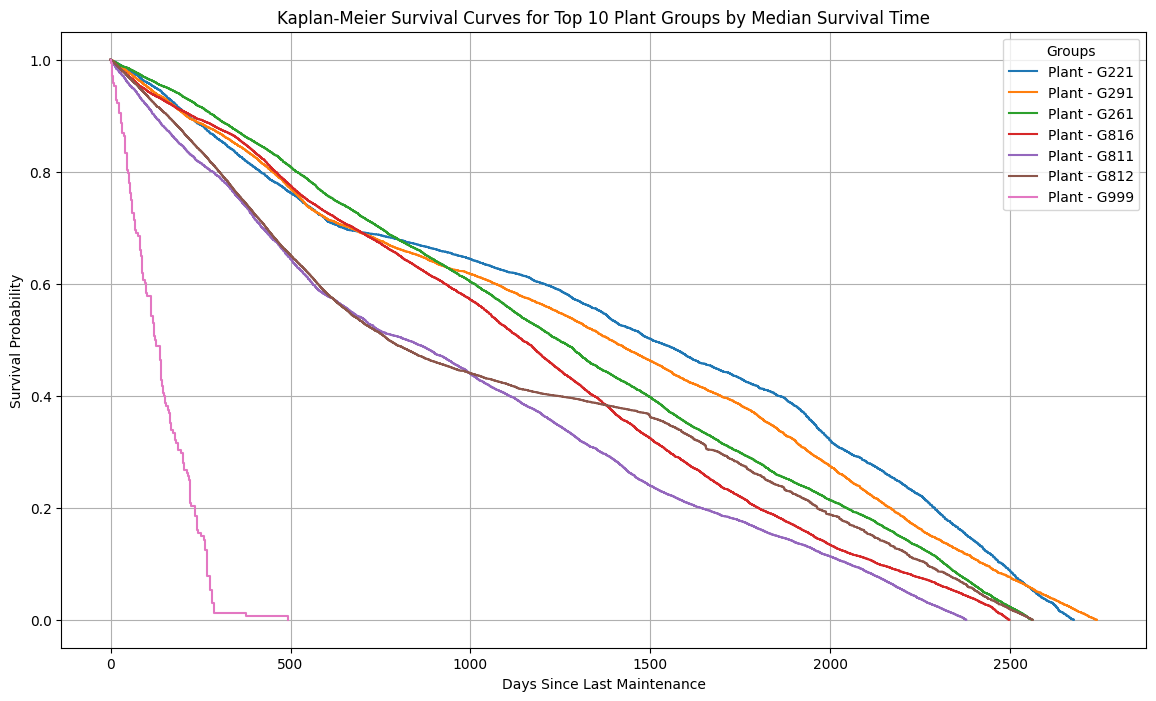

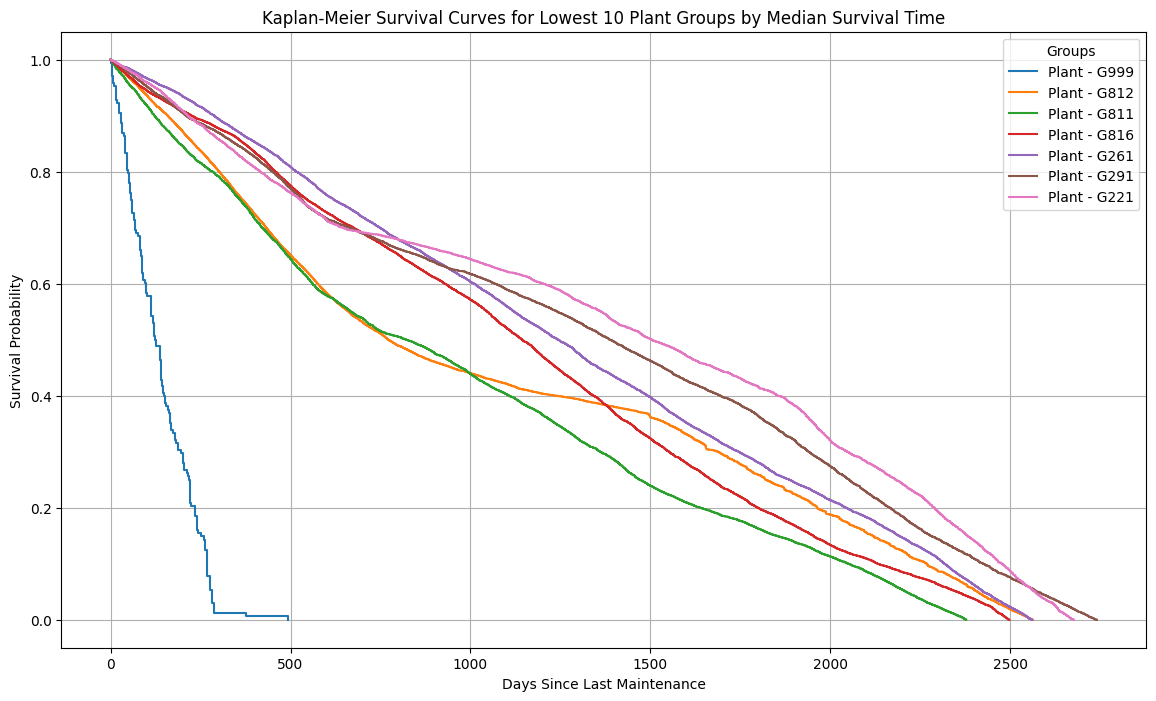


Top 10 Median Survival Times for Process (in days):
Process - CLR: 1418.0 days
Process - FLT: 1376.0 days
Process - PRD: 1198.0 days
Process - SLC: 123.0 days

Lowest 10 Median Survival Times for Process (in days):
Process - SLC: 123.0 days
Process - PRD: 1198.0 days
Process - FLT: 1376.0 days
Process - CLR: 1418.0 days


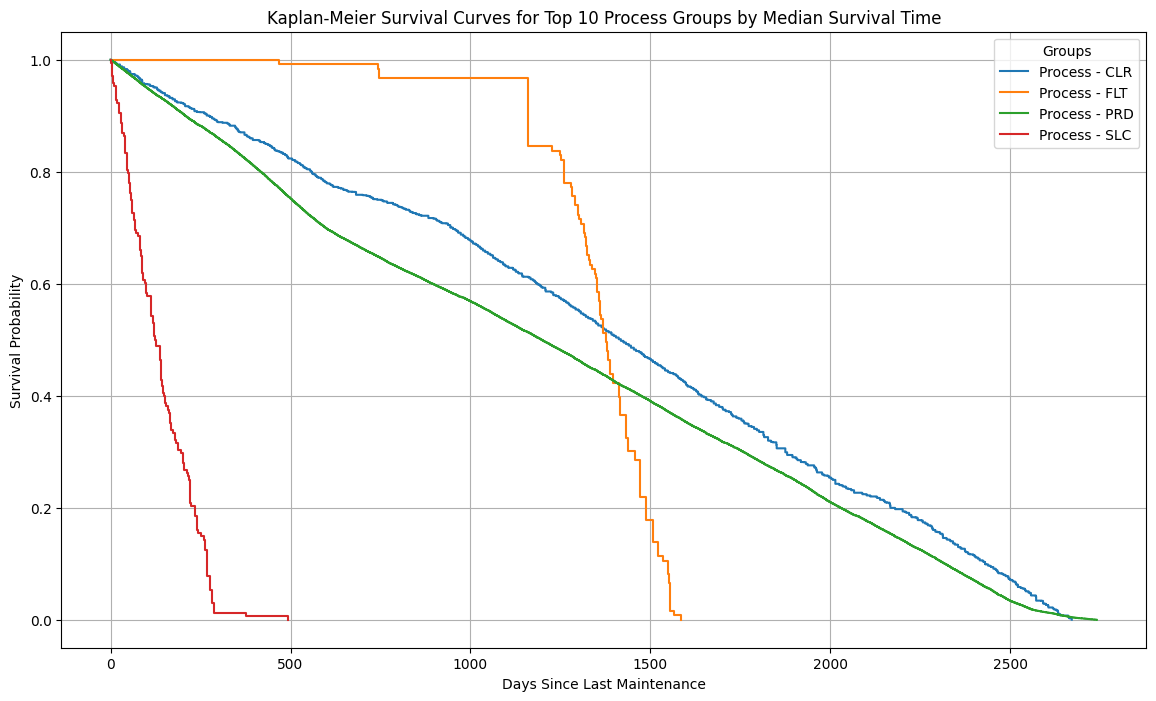

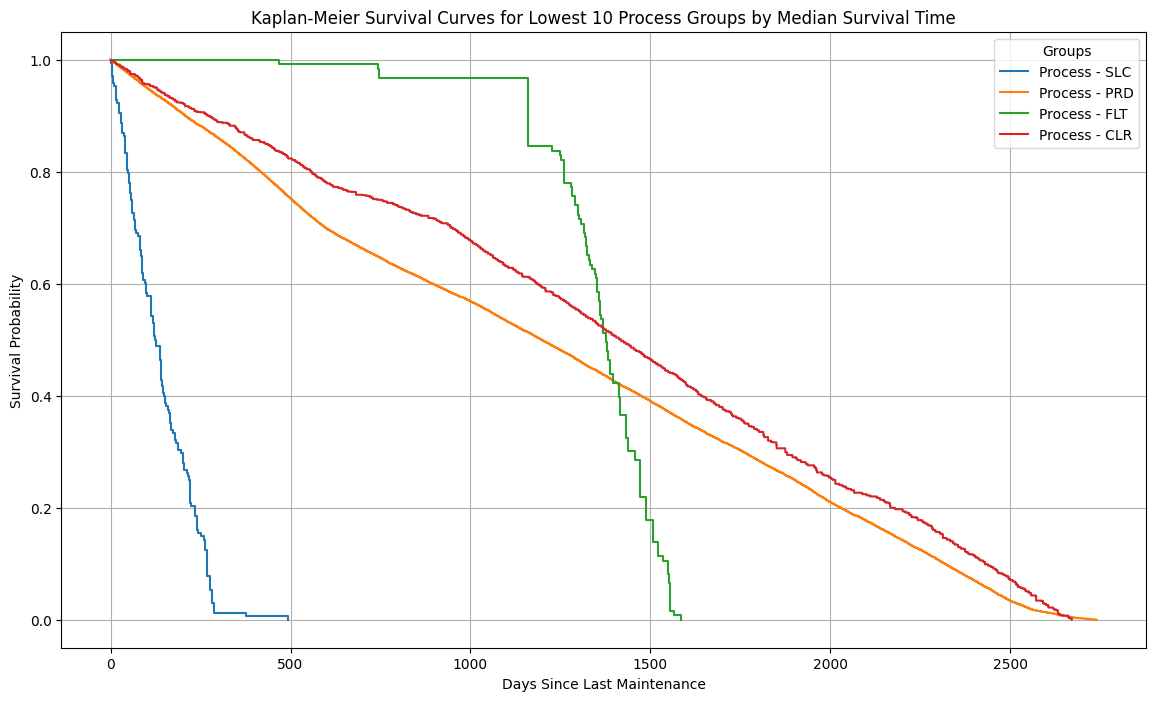


Top 10 Median Survival Times for Sub_Process (in days):
Sub_Process - P30: 2176.0 days
Sub_Process - L35: 1590.0 days
Sub_Process - A50: 1575.0 days
Sub_Process - P05: 1483.0 days
Sub_Process - A85: 1418.0 days
Sub_Process - F10: 1376.0 days
Sub_Process - P90: 1362.0 days
Sub_Process - A99: 1362.0 days
Sub_Process - P55: 1354.0 days
Sub_Process - L30: 1304.0 days

Lowest 10 Median Survival Times for Sub_Process (in days):
Sub_Process - P76: 143.0 days
Sub_Process - P95: 204.0 days
Sub_Process - B30: 230.0 days
Sub_Process - A40: 257.0 days
Sub_Process - A05: 267.0 days
Sub_Process - P50: 294.0 days
Sub_Process - A55: 339.0 days
Sub_Process - P91: 342.0 days
Sub_Process - P77: 373.0 days
Sub_Process - A28: 427.0 days


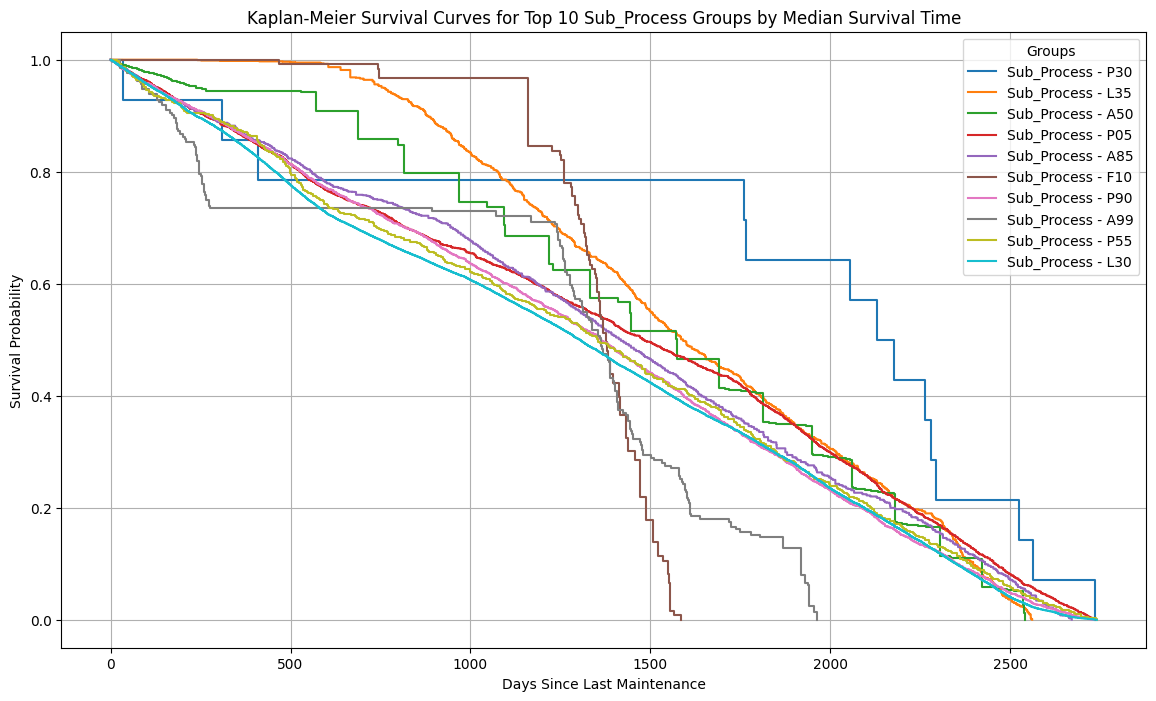

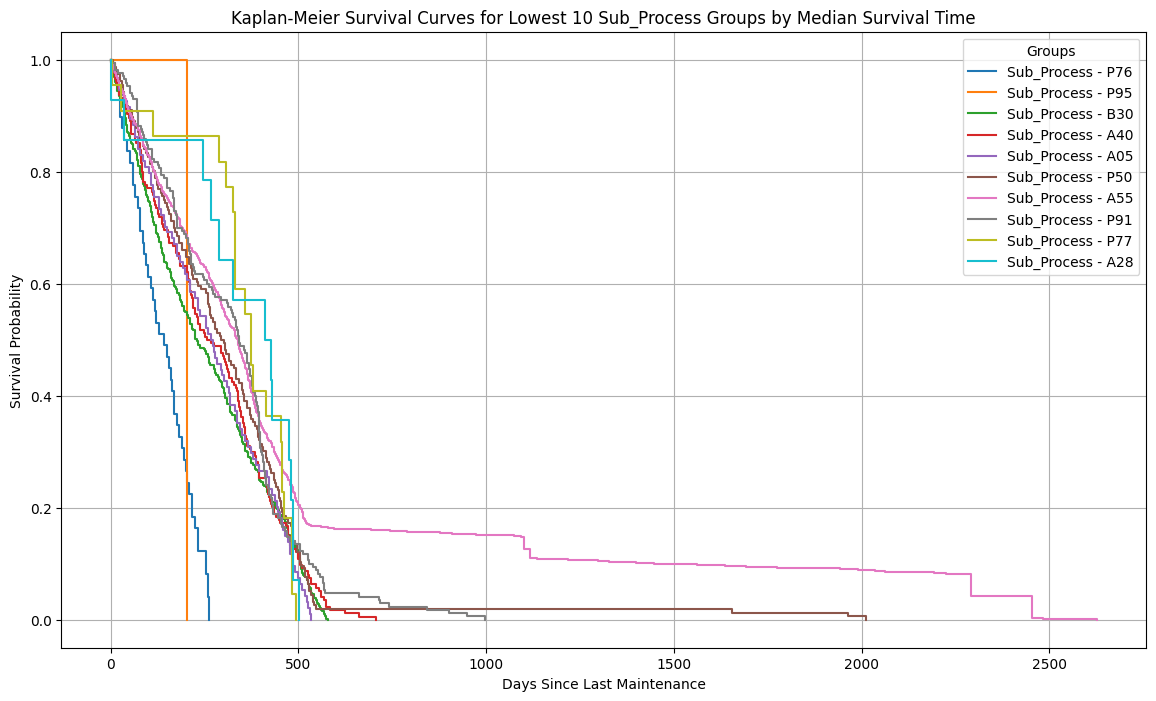


Top 10 Median Survival Times for Product_Line (in days):
Product_Line - L08: 1637.0 days
Product_Line - 006: 1585.0 days
Product_Line - I06: 1575.0 days
Product_Line - E06: 1412.0 days
Product_Line - 002: 1376.0 days
Product_Line - L04: 1329.0 days
Product_Line - L01: 1300.0 days
Product_Line - L02: 1293.0 days
Product_Line - S02: 1277.0 days
Product_Line - L09: 1256.0 days

Lowest 10 Median Survival Times for Product_Line (in days):
Product_Line - L10: 21.0 days
Product_Line - S04: 42.0 days
Product_Line - W15: 61.0 days
Product_Line - H00: 120.0 days
Product_Line - E01: 121.0 days
Product_Line - I08: 123.0 days
Product_Line - 020: 123.0 days
Product_Line - W01: 130.0 days
Product_Line - E03: 141.0 days
Product_Line - W09: 165.0 days


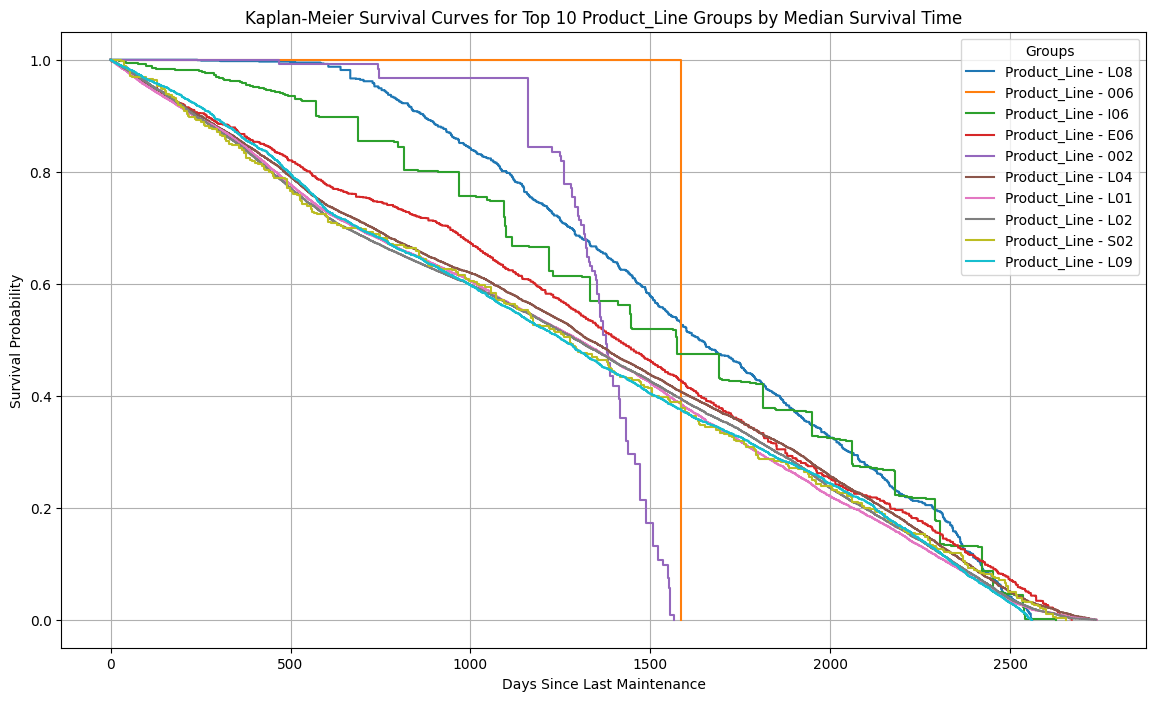

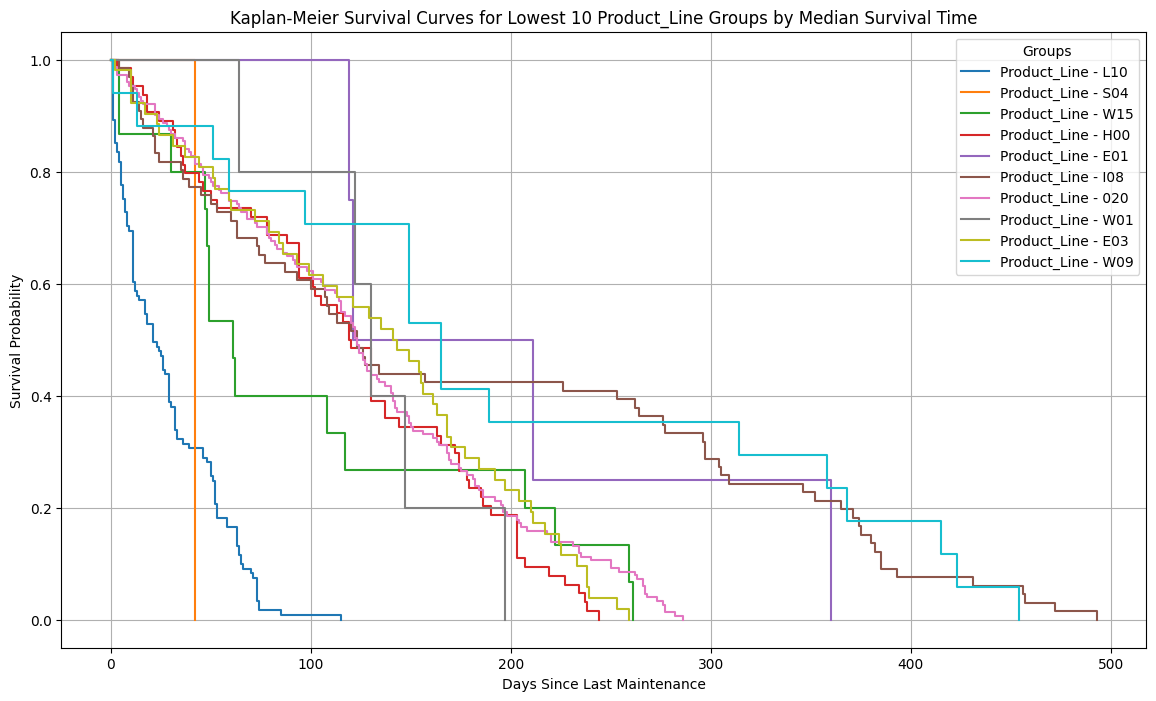


Top 10 Median Survival Times for Machine (in days):
Machine - S250: 2176.0 days
Machine - S280: 1727.0 days
Machine - S090: 1695.0 days
Machine - L160: 1681.0 days
Machine - 0007: 1638.0 days
Machine - L010: 1616.0 days
Machine - L170: 1592.0 days
Machine - L070: 1576.0 days
Machine - S080: 1552.0 days
Machine - L100: 1525.0 days

Lowest 10 Median Survival Times for Machine (in days):
Machine - S005: 4.0 days
Machine - C030: 5.0 days
Machine - C040: 43.0 days
Machine - S002: 45.0 days
Machine - L230: 59.0 days
Machine - S004: 75.0 days
Machine - S000: 89.0 days
Machine - S030: 97.0 days
Machine - L220: 108.0 days
Machine - S001: 117.0 days


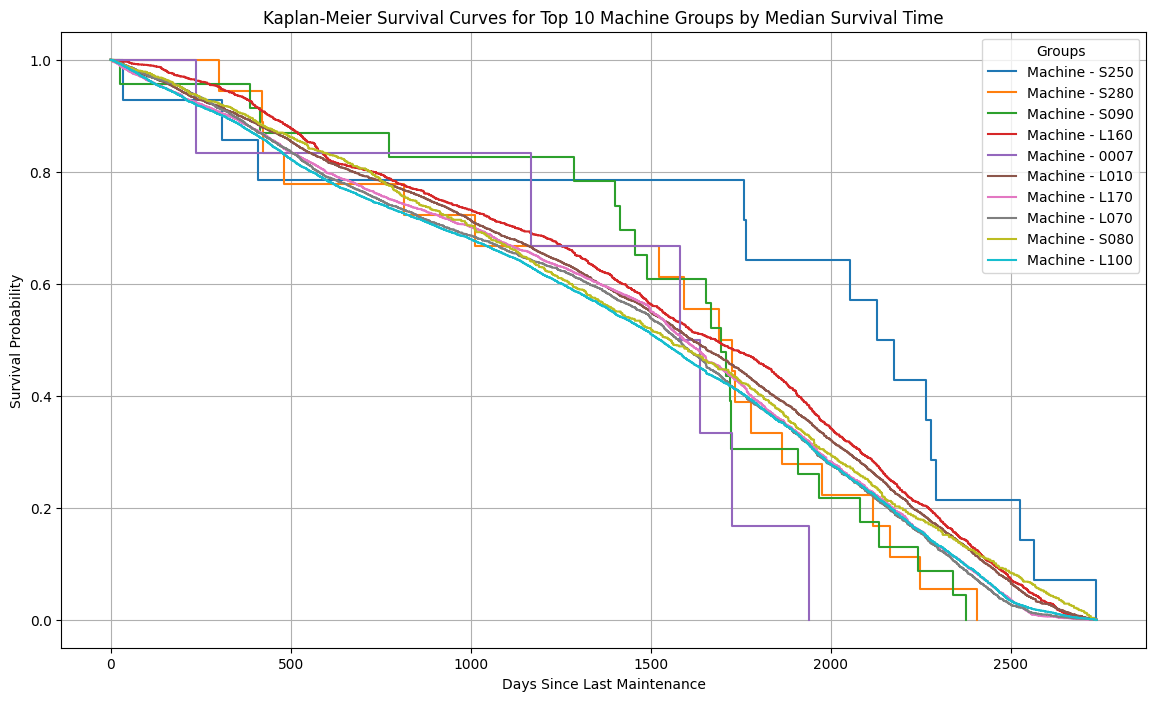

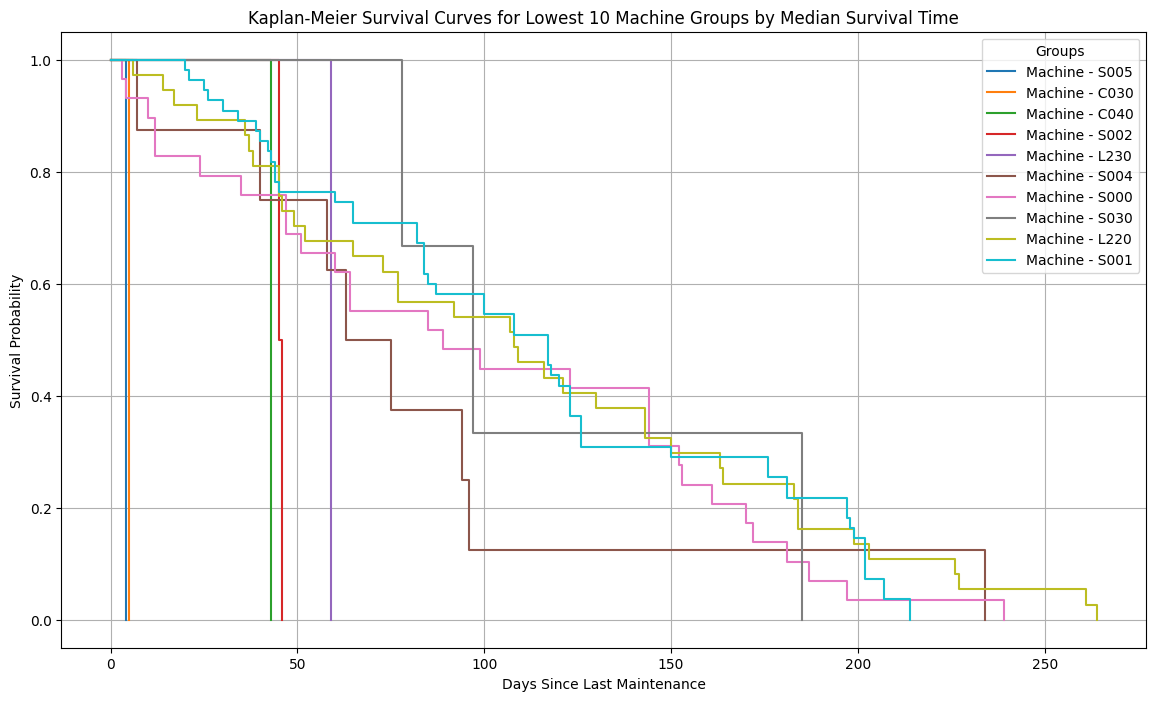


Top 10 Median Survival Times for Sub_Machine (in days):
Sub_Machine - WEST: 1630.0 days
Sub_Machine - L010: 1234.0 days
Sub_Machine - 0020: 1196.0 days
Sub_Machine - 0040: 1169.0 days
Sub_Machine - 0035: 1123.0 days
Sub_Machine - 0030: 1001.0 days
Sub_Machine - 0050: 924.0 days
Sub_Machine - 0010: 857.0 days
Sub_Machine - 0060: 830.0 days
Sub_Machine - L040: 745.0 days

Lowest 10 Median Survival Times for Sub_Machine (in days):
Sub_Machine - 050: 34.0 days
Sub_Machine - INS: 129.0 days
Sub_Machine - ACMI: 169.0 days
Sub_Machine - 0025: 170.0 days
Sub_Machine - 0200: 174.0 days
Sub_Machine - MEAD: 178.0 days
Sub_Machine - OUT: 304.0 days
Sub_Machine - 010: 360.0 days
Sub_Machine - 0022: 371.0 days
Sub_Machine - 040: 402.0 days


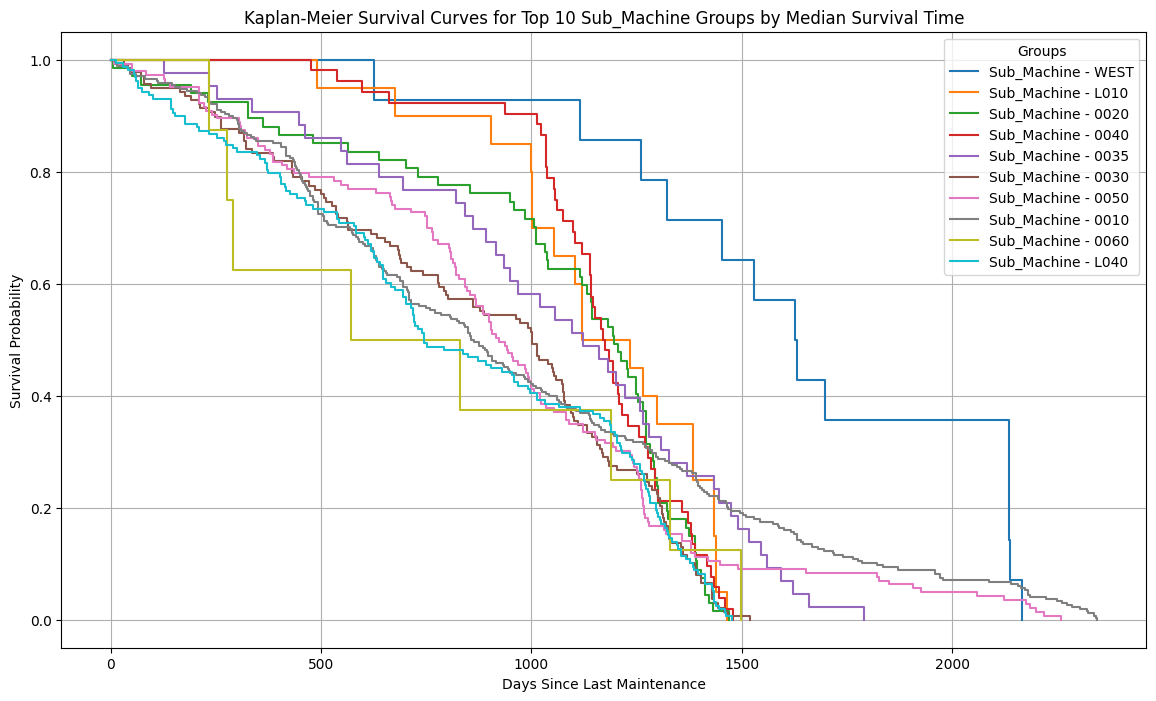

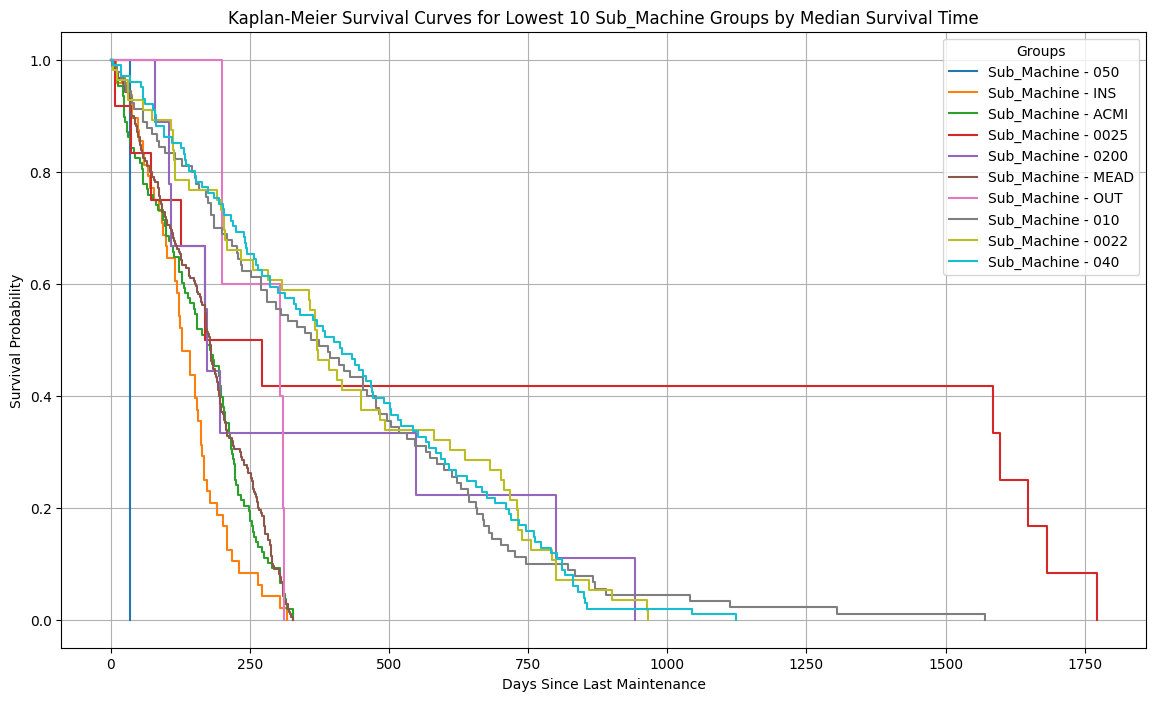

In [ ]:
# Fixed future date for censoring purposes
fixed_future_date = pd.to_datetime("2024-08-30")

# Calculate the duration to the fixed future date
data_swire_copy['EXECUTION_START_DATE'] = pd.to_datetime(data_swire_copy['EXECUTION_START_DATE'], errors='coerce')
data_swire_copy = data_swire_copy.dropna(subset=['EXECUTION_START_DATE'])  # Drop rows with NaT in EXECUTION_START_DATE
data_swire_copy['duration_new'] = (fixed_future_date - data_swire_copy['EXECUTION_START_DATE']).dt.days
data_swire_copy['event_new'] = 1  # Assuming all rows represent events

# Dictionary to store median survival times for each level
median_survival_times_by_level = {}

# List of hierarchical columns for analysis
hierarchical_levels = ['Plant', 'Process', 'Sub_Process', 'Product_Line', 'Machine', 'Sub_Machine']

# Loop through each level to calculate Kaplan-Meier curves and store median survival times
for level in hierarchical_levels:
    kmf = KaplanMeierFitter()
    median_survival_times_by_level[level] = {}

    for group in data_swire_copy[level].dropna().unique():  # Drop NaN and iterate over unique groups
        group_df = data_swire_copy[data_swire_copy[level] == group]

        # Fit Kaplan-Meier model for each group
        kmf.fit(durations=group_df['duration_new'], event_observed=group_df['event_new'], label=str(group))

        # Store median survival time for each group in the current level
        median_survival_times_by_level[level][group] = kmf.median_survival_time_

# Display top 10 and lowest 10 median survival times for each level
for level in hierarchical_levels:
    print(f"\nTop 10 Median Survival Times for {level} (in days):")
    top_10 = sorted(median_survival_times_by_level[level].items(), key=lambda x: x[1], reverse=True)[:10]
    for group, median_time in top_10:
        print(f"{level} - {group}: {median_time} days")

    print(f"\nLowest 10 Median Survival Times for {level} (in days):")
    low_10 = sorted(median_survival_times_by_level[level].items(), key=lambda x: x[1])[:10]
    for group, median_time in low_10:
        print(f"{level} - {group}: {median_time} days")

    # Plot the survival curves for the top 10 and lowest 10 groups
    plt.figure(figsize=(14, 8))
    kmf = KaplanMeierFitter()

    # Plot the top 10 groups
    for group, _ in top_10:
        group_df = data_swire_copy[data_swire_copy[level] == group]
        kmf.fit(durations=group_df['duration_new'], event_observed=group_df['event_new'], label=f"{level} - {group}")
        kmf.plot_survival_function(ci_show=False)

    plt.title(f"Kaplan-Meier Survival Curves for Top 10 {level} Groups by Median Survival Time")
    plt.xlabel("Days Since Last Maintenance")
    plt.ylabel("Survival Probability")
    plt.legend(title='Groups')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(14, 8))

    # Plot the lowest 10 groups
    for group, _ in low_10:
        group_df = data_swire_copy[data_swire_copy[level] == group]
        kmf.fit(durations=group_df['duration_new'], event_observed=group_df['event_new'], label=f"{level} - {group}")
        kmf.plot_survival_function(ci_show=False)

    plt.title(f"Kaplan-Meier Survival Curves for Lowest 10 {level} Groups by Median Survival Time")
    plt.xlabel("Days Since Last Maintenance")
    plt.ylabel("Survival Probability")
    plt.legend(title='Groups')
    plt.grid(True)
    plt.show()


The Kaplan-Meier survival analysis provides insights into the median survival times for various maintenance hierarchy levels in terms of days since the last maintenance. For "Plant" groups, the median survival times range from 123 days for "Plant - G999" to 1505 days for "Plant - G221," indicating substantial variability in survival across plants. In the "Process" level, "Process - CLR" has the highest median survival of 1418 days, while "Process - SLC" has the lowest at 123 days, suggesting certain processes may require more frequent maintenance than others.

The "Sub_Process" level shows median survival times from 143 days for "Sub_Process - P76" to 2176 days for "Sub_Process - P30," illustrating variability in maintenance needs across sub-processes. Similarly, for "Product_Line," median survival times vary widely, with "Product_Line - L08" showing the longest survival at 1637 days and "Product_Line - L10" the shortest at just 21 days. At the "Machine" level, "Machine - S250" has the longest survival time of 2176 days, contrasting sharply with "Machine - S005" at just 4 days. Finally, "Sub_Machine" median survival times range from 34 days for "Sub_Machine - 050" to 1630 days for "Sub_Machine - WEST." These findings highlight that specific plants, processes, product lines, and machines differ significantly in maintenance durability, suggesting targeted maintenance strategies may optimize overall system longevity.

* **Seasonal Maintenance Planning**: By strategically scheduling preventive maintenance during the less demanding Winter and Fall seasons, Swire Coca-Cola can keep its equipment in prime condition before the high-demand Spring and Summer months. This proactive approach prepares machines for peak operation periods, reducing the likelihood of unexpected breakdowns when production is critical.
  
* **Focus on High-Cost Nodes**: Prioritizing high-cost nodes like “Monza Production” and “COTA Production” can bring immediate value by addressing areas with the greatest impact on productivity. By allocating extra maintenance resources to these key areas and implementing rapid-response maintenance solutions, Swire Coca-Cola can significantly reduce repair times and downtime costs where they matter most. This targeted approach ensures that critical production lines remain operational, minimizing disruptions in the most essential areas of the plant.
  
* **Inventory of Critical Spare Parts**: Keeping an inventory of essential spare parts for high-wear equipment, particularly in critical areas like "FILLER," “PACKER,” and “CONVEYOR,” is vital for maintaining continuous production. By ensuring that replacement parts are readily available, Swire Coca-Cola can significantly reduce downtime associated with equipment failures, as repairs can be conducted without delay. Having these critical parts on hand ultimately reinforces the efficiency of maintenance activities and supports uninterrupted productivity in essential production nodes. This proactive approach speeds up recovery times and adds resilience to operations, preventing prolonged disruptions in the production flow.

* **Maintenance Duration Reduction**: Streamlining repair processes with pre-assembled maintenance kits and dedicated maintenance staff can significantly reduce repair times, especially in high-cost nodes. By reducing the duration of maintenance activities, Swire Coca-Cola can lessen the financial impact of downtime, allowing for a quicker return to full operational capacity and minimizing disruptions in production. This targeted approach to efficiency reduces costs and boosts overall productivity in critical areas.

* **Emphasizing Preventive Over Corrective Maintenance**: Shifting focus towards preventive maintenance can significantly enhance equipment longevity and reduce unexpected breakdowns. This proactive approach has proven more effective in extending equipment life than reactive, corrective maintenance. By incorporating preventive practices, Swire Coca-Cola can maintain a stable production flow, decrease repair frequency, and lower operational disruptions.

* **Monthly and Seasonal Downtime Cost Management**: To optimize cost and production efficiency, scheduling preventive maintenance in lower-cost months like September and October is essential. This strategy avoids high-demand, high-cost months such as June,July,May,August where downtimes could result in amplified financial losses. Aligning maintenance schedules with seasonal production demands allows Swire Coca-Cola to mitigate downtime impacts during peak operational periods.

By implementing these targeted maintenance strategies, Swire Coca-Cola can significantly reduce unplanned downtimes, saving up to 10.7 million cases annually in maintenance-related losses. With downtime impacting 5.6% of the total production capacity, these improvements will help Swire Coca-Cola achieve closer to 100% output. This structured approach enhances productivity and optimizes maintenance spending, ensuring more consistent operational uptime and increased production efficiency. Ultimately, these changes will lead to reduced costs, improved profitability, and a stronger competitive position in the market.



## 12. Individual Contributions <a name = "14"></a>

<html>
<head>
</head>
<body>
    <table border="1">
        <tr style="background-color: #4CAF50; color: white;">
            <th>Name</th>
            <th style="text-align: center;">Contribution's</th>
        </tr>
        <tr>
            <td>Adarsh</td>
            <td style ="text-align: left;"> <ul>
        <li>Explored data columns and created insightful visualizations.</li>
        <li>Explored through different modeling techniques suitable for our business case.</li>
        <li>Performed various feature importance techniques and articulated the modeling process.</li>
        <li> Analyzed the patterns and provided insights about the time between failures.</li>
         <li>Provided interpretation of plots and insights from the results.</li>
        <li>Performed document proofreading, ensuring accuracy and clarity throughout the document.</li>
      </ul></td>
        </tr>
    </table>
</body>
</html>

<center><a href="#Table-of-contents:">Navigate to top</a>